<center><h1> West Midlands' Carbon Footprint </h1></center>

### Understanding the Data 

<!-- <ul> -->
<!--  <li><h2> Understanding the Data</h2></li> -->
<!--  <li>Handling Missing Values</li> -->
<!--  <li>Remove Duplicates</li> -->
<!--  <li>Standardize Formats</li> -->
<!--  <li>Handle Outliers</li> -->
<!--  <li>Validate and correct data</li>  -->
<!--  <li>Document Changes</li> -->
<!--  <li>Test and iterate</li> -->
<!--  <li>Maintain data provence</li>   -->     
<!-- </ul> -->


<P><b>Internet Repositories:</b></P>

<!-- <P><a href="https://www.gov.uk/government/statistics/uks-carbon-footprint">https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
</a></P> -->  

Data: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx

From exploration of the '1_1' sheet

 Shape of the Data: The dataset contains 7106 rows and 50 columns.
 Summary of the Data: 
   The dataset provides details for <b>12 unique regions</b>.
   There are data for 17 unique years, spanning from 2005 to 2021.
   Variables such as 'Industry Electricity', 'Industry Gas', and 'Industry Total' 





<h2>Process Flow</h2>

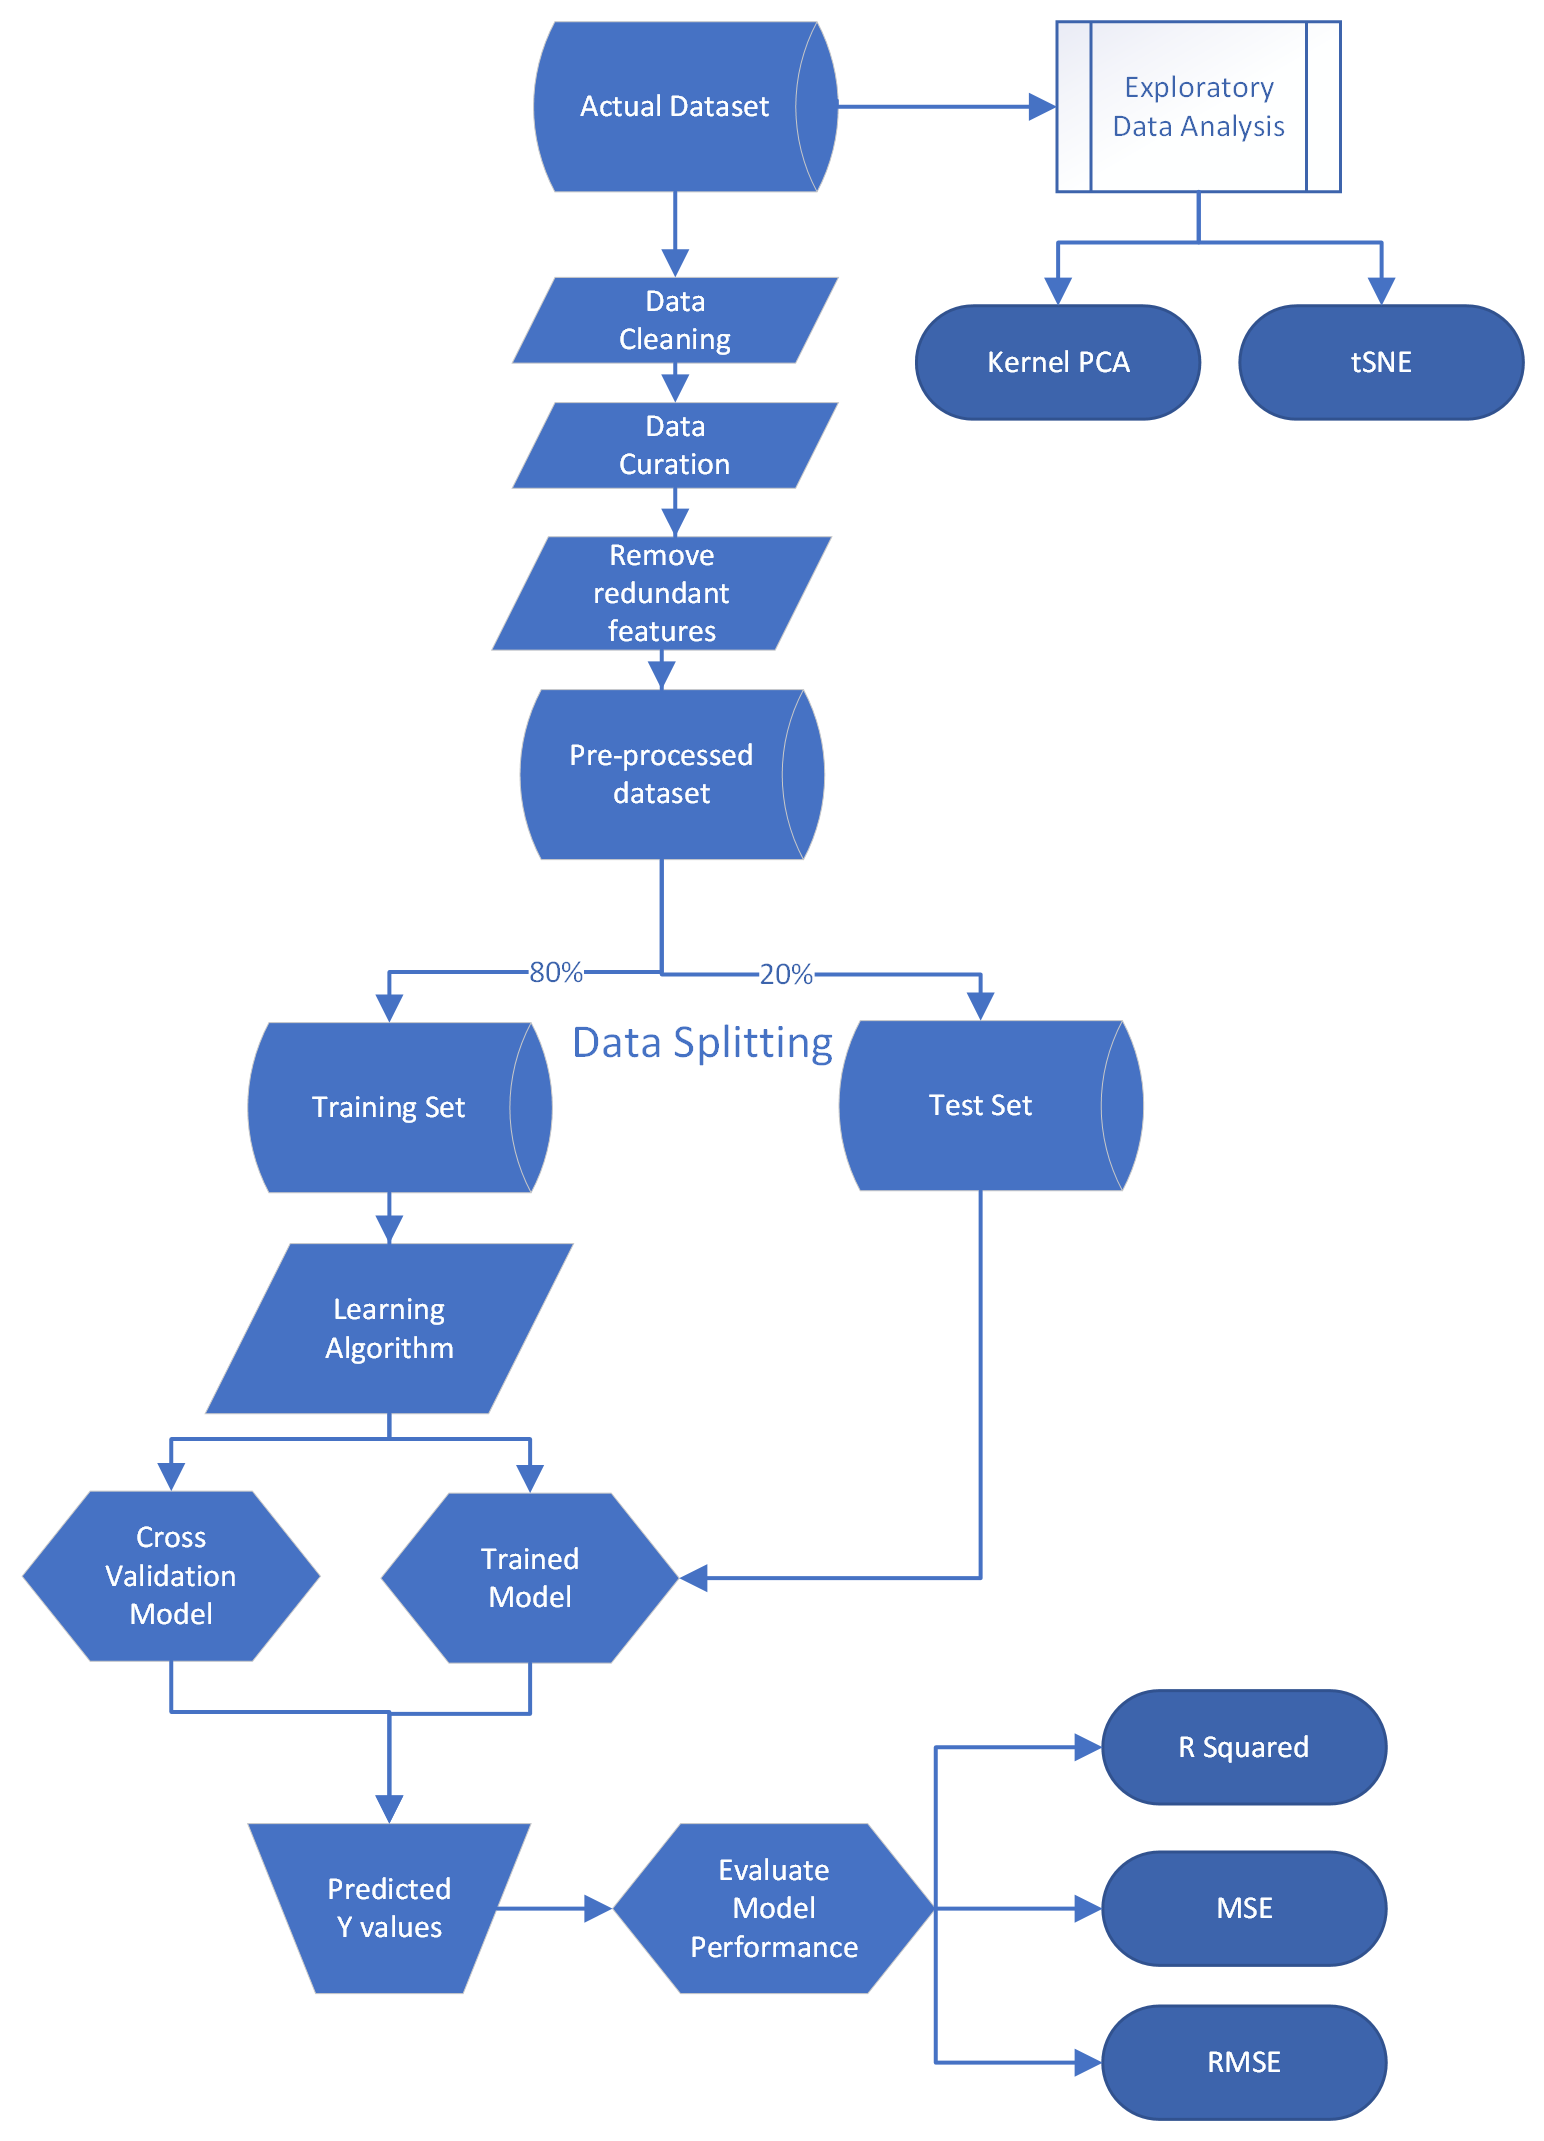

<h2>ARIMA(AutoRegressive Integrated Moving Average) Model Output Analysis</h2>

<ol>
	<li><strong>Dep. Variable: Emissions</strong>: The dependent variable (the variable being predicted) is 'Emissions'.</li>
	<li><strong>No. Observations: 60</strong>: There are 60 data points or observations in the time series.</li>
	<li><strong>Model: ARIMA(1, 1, 1)</strong>: The ARIMA model used has parameters (p=1, d=1, q=1).
		<ul>
			<li><strong>p (AR term):</strong> 1 indicates one lag is used in the autoregressive part.</li>
			<li><strong>d (Differencing):</strong> 1 signifies that the data has been first-differenced once to make it stationary.</li>
			<li><strong>q (MA term):</strong> 1 indicates the moving average part is based on one lagged forecast error.</li>
		</ul>
	</li>
	<li><strong>Log Likelihood: -321.549</strong>: This is the log likelihood of the model, a measure of the model's goodness of fit.</li>
	<li><strong>AIC: 649.099</strong>: The Akaike Information Criterion, a measure of the model’s quality. Lower AIC values suggest a better model.</li>
	<li><strong>BIC: 655.331</strong>: The Bayesian Information Criterion, another measure of model fit. Like AIC, lower is better.</li>
	<li><strong>HQIC: 651.532</strong>: Hannan-Quinn Information Criterion, another criterion for model selection.</li>
	<li><strong>coef (Coefficients):</strong>
		<ul>
			<li><strong>ar.L1 (0.1138)</strong>: The coefficient for the AR part of the model, suggesting a mild positive relationship.</li>
			<li><strong>ma.L1 (-0.8330)</strong>: The coefficient for the MA part, indicating a strong negative relationship.</li>
		</ul>
	</li>
	<li><strong>P>|z|</strong>: P-values for the AR and MA coefficients. Values less than 0.05 typically suggest statistical significance. Here, the MA part is significant.</li>
	<li><strong>[0.025 0.975]</strong>: The 95% confidence interval for the coefficients.</li>
	<li><strong>sigma2 (3122.7480)</strong>: The variance of the residuals.</li>
	<li><strong>Diagnostics:</strong>
		<ul>
			<li><strong>Ljung-Box Test</strong>: A test for autocorrelation in residuals. A high p-value (here, 0.83) suggests no autocorrelation, which is good.</li>
			<li><strong>Jarque-Bera Test</strong>: A test for normality of residuals. A low p-value (here, 0.04) suggests non-normality, which could be a concern.</li>
			<li><strong>Heteroskedasticity Test</strong>: A test for constant variance of residuals. A low p-value (here, 0.10) suggests potential heteroskedasticity.</li>
		</ul>
	</li>
	<li><strong>Skew and Kurtosis</strong>: Measures of the shape of the residual distribution. The skewness is close to 0 (ideal), but the kurtosis is quite low, indicating a flat distribution.</li>
</ol>
<p>Overall, this ARIMA model seems to fit the data reasonably well, especially given the significant MA coefficient and the lack of autocorrelation in the residuals. However, the potential non-normality and heteroskedasticity in the residuals, as indicated by the Jarque-Bera and Heteroskedasticity tests, might be areas to explore for improving the model.</p>


In [5]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Get the names of the sheets in the Excel file
# url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
# data_1_1 = pd.read_excel(url, sheet_name='1_1')

sheet_names = pd.ExcelFile("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx").sheet_names
sheet_names


['Cover',
 'Contents',
 '1_1',
 '1_2',
 '1_3',
 '1_4',
 '2_1',
 '3_1',
 '3_2',
 '4_1',
 '4_1_Notes',
 '4_2',
 '4_3',
 '4_4',
 '4_5',
 '5_1']

In [6]:
# Load the first few rows from the '1_1' sheet to explore its contents

#url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
#data_1_1 = pd.read_excel(url, sheet_name='1_1')

data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')
data_1_1.head()


Table 1.1: Local Authority territorial greenhouse gas emissions estimates 2005-2021 (kt CO2e) - Full dataset  \
0  This worksheet contains one table. The table c...                                                             
1  Freeze panes are active on this sheet. To turn...                                                             
2  Filters are active in cells A5 to AX5 and may ...                                                             
3                                     Region/Country                                                             
4                                         North East                                                             

              Unnamed: 1       Unnamed: 2            Unnamed: 3  \
0                    NaN              NaN                   NaN   
1                    NaN              NaN                   NaN   
2                    NaN              NaN                   NaN   
3  Second Tier Authority  Local Authority  Local Authority Code   
4             Darlington       Darlington             E06000005   

      Unnamed: 4            Unnamed: 5     Unnamed: 6  \
0            NaN                   NaN            NaN   
1            NaN                   NaN            NaN   
2            NaN                   NaN            NaN   
3  Calendar Year  Industry Electricity  Industry Gas    
4           2005              51.87311     114.701874   

                       Unnamed: 7        Unnamed: 8      Unnamed: 9  ...  \
0                             NaN               NaN             NaN  ...   
1                             NaN               NaN             NaN  ...   
2                             NaN               NaN             NaN  ...   
3  Large Industrial Installations  Industry 'Other'  Industry Total  ...   
4                        0.045681         43.073543      209.694209  ...   

         Unnamed: 40        Unnamed: 41 Unnamed: 42               Unnamed: 43  \
0                NaN                NaN         NaN                       NaN   
1                NaN                NaN         NaN                       NaN   
2                NaN                NaN         NaN                       NaN   
3  Agriculture Soils  Agriculture Total    Landfill  Waste Management 'Other'   
4          12.699185            63.7069   34.256022                  5.613394   

              Unnamed: 44  Unnamed: 45                            Unnamed: 46  \
0                     NaN          NaN                                    NaN   
1                     NaN          NaN                                    NaN   
2                     NaN          NaN                                    NaN   
3  Waste Management Total  Grand Total  Population ('000s, mid-year estimate)   
4               39.869415   968.661604                                100.287   

                    Unnamed: 47 Unnamed: 48                  Unnamed: 49  
0                           NaN         NaN                          NaN  
1                           NaN         NaN                          NaN  
2                           NaN         NaN                          NaN  
3  Per Capita Emissions (tCO2e)  Area (km2)  Emissions per km2 (kt CO2e)  
4                      9.658895    197.4758                     4.905217  

[5 rows x 50 columns]

In [7]:
# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]



In [8]:
data_1_1_actual

3     Region/Country Second Tier Authority Local Authority  \
4         North East            Darlington      Darlington   
5         North East            Darlington      Darlington   
6         North East            Darlington      Darlington   
7         North East            Darlington      Darlington   
8         North East            Darlington      Darlington   
...              ...                   ...             ...   
7105  National Total        National Total  National Total   
7106  National Total        National Total  National Total   
7107  National Total        National Total  National Total   
7108  National Total        National Total  National Total   
7109  National Total        National Total  National Total   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
4               E06000005          2005             51.87311    114.701874   
5               E06000005          2006            55.398988     97.614091   
6               E06000005          2007            52.249398     95.167732   
7               E06000005          2008            51.651166     95.266031   
8               E06000005          2009            45.607413     82.045964   
...                   ...           ...                  ...           ...   
7105                  NaN          2017         18256.184881  15602.265158   
7106                  NaN          2018         20997.236163  19161.407779   
7107                  NaN          2019         18512.578663  18433.106892   
7108                  NaN          2020         15164.001049  17463.024978   
7109                  NaN          2021         17109.121337  20037.052043   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
4                          0.045681        43.073543     209.694209  ...   
5                          0.065836        42.086928     195.165842  ...   
6                          0.074503         43.79521     191.286843  ...   
7                          0.055964        35.982972     182.956132  ...   
8                          1.061014        26.863721     155.578112  ...   
...                             ...              ...            ...  ...   
7105                   33619.941766     17990.618473   85469.010278  ...   
7106                   32309.811618     17713.459471   90181.915031  ...   
7107                     31951.4012     17364.788398   86261.875153  ...   
7108                   30135.710515      17584.10729   80346.843833  ...   
7109                   29267.622916     17927.304689   84341.100985  ...   

3    Agriculture Soils Agriculture Total      Landfill  \
4            12.699185           63.7069     34.256022   
5            11.659759         59.927177     31.802024   
6            12.166507         59.716732     37.048534   
7             12.55795         59.566044      7.662955   
8            11.405542         57.689627     16.001037   
...                ...               ...           ...   
7105       9689.245642      51301.203756  15821.005923   
7106       9573.565596      51380.522611  15911.984565   
7107       9770.415392      50706.546836  15684.547926   
7108       8890.946812      49220.899615  14304.397217   
7109       9247.865828      50711.980197  13618.050957   

3    Waste Management 'Other' Waste Management Total    Grand Total  \
4                    5.613394              39.869415     968.661604   
5                     6.57408              38.376104     943.627506   
6                     6.81813              43.866664     925.275164   
7                    6.771385               14.43434     876.045542   
8                    6.053694              22.054731     805.592471   
...                       ...                    ...            ...   
7105              5131.240623           20952.246546  437824.383087   
7106              5088.278772           21000.263337  430745.509283   
7107              5035.738233           20720.286159  416856.663324  

In [9]:
# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)  
data_1_1_actual

3     Region/Country Second Tier Authority Local Authority  \
0         North East            Darlington      Darlington   
1         North East            Darlington      Darlington   
2         North East            Darlington      Darlington   
3         North East            Darlington      Darlington   
4         North East            Darlington      Darlington   
...              ...                   ...             ...   
7101  National Total        National Total  National Total   
7102  National Total        National Total  National Total   
7103  National Total        National Total  National Total   
7104  National Total        National Total  National Total   
7105  National Total        National Total  National Total   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
0               E06000005          2005             51.87311    114.701874   
1               E06000005          2006            55.398988     97.614091   
2               E06000005          2007            52.249398     95.167732   
3               E06000005          2008            51.651166     95.266031   
4               E06000005          2009            45.607413     82.045964   
...                   ...           ...                  ...           ...   
7101                  NaN          2017         18256.184881  15602.265158   
7102                  NaN          2018         20997.236163  19161.407779   
7103                  NaN          2019         18512.578663  18433.106892   
7104                  NaN          2020         15164.001049  17463.024978   
7105                  NaN          2021         17109.121337  20037.052043   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
0                          0.045681        43.073543     209.694209  ...   
1                          0.065836        42.086928     195.165842  ...   
2                          0.074503         43.79521     191.286843  ...   
3                          0.055964        35.982972     182.956132  ...   
4                          1.061014        26.863721     155.578112  ...   
...                             ...              ...            ...  ...   
7101                   33619.941766     17990.618473   85469.010278  ...   
7102                   32309.811618     17713.459471   90181.915031  ...   
7103                     31951.4012     17364.788398   86261.875153  ...   
7104                   30135.710515      17584.10729   80346.843833  ...   
7105                   29267.622916     17927.304689   84341.100985  ...   

3    Agriculture Soils Agriculture Total      Landfill  \
0            12.699185           63.7069     34.256022   
1            11.659759         59.927177     31.802024   
2            12.166507         59.716732     37.048534   
3             12.55795         59.566044      7.662955   
4            11.405542         57.689627     16.001037   
...                ...               ...           ...   
7101       9689.245642      51301.203756  15821.005923   
7102       9573.565596      51380.522611  15911.984565   
7103       9770.415392      50706.546836  15684.547926   
7104       8890.946812      49220.899615  14304.397217   
7105       9247.865828      50711.980197  13618.050957   

3    Waste Management 'Other' Waste Management Total    Grand Total  \
0                    5.613394              39.869415     968.661604   
1                     6.57408              38.376104     943.627506   
2                     6.81813              43.866664     925.275164   
3                    6.771385               14.43434     876.045542   
4                    6.053694              22.054731     805.592471   
...                       ...                    ...            ...   
7101              5131.240623           20952.246546  437824.383087   
7102              5088.278772           21000.263337  430745.509283   
7103              5035.738233           20720.286159  416856.663324  

In [138]:
data_1_1_actual

3     Region/Country Second Tier Authority Local Authority  \
4         North East            Darlington      Darlington   
5         North East            Darlington      Darlington   
6         North East            Darlington      Darlington   
7         North East            Darlington      Darlington   
8         North East            Darlington      Darlington   
...              ...                   ...             ...   
7105  National Total        National Total  National Total   
7106  National Total        National Total  National Total   
7107  National Total        National Total  National Total   
7108  National Total        National Total  National Total   
7109  National Total        National Total  National Total   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
4               E06000005          2005             51.87311    114.701874   
5               E06000005          2006            55.398988     97.614091   
6               E06000005          2007            52.249398     95.167732   
7               E06000005          2008            51.651166     95.266031   
8               E06000005          2009            45.607413     82.045964   
...                   ...           ...                  ...           ...   
7105                  NaN          2017         18256.184881  15602.265158   
7106                  NaN          2018         20997.236163  19161.407779   
7107                  NaN          2019         18512.578663  18433.106892   
7108                  NaN          2020         15164.001049  17463.024978   
7109                  NaN          2021         17109.121337  20037.052043   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
4                          0.045681        43.073543     209.694209  ...   
5                          0.065836        42.086928     195.165842  ...   
6                          0.074503         43.79521     191.286843  ...   
7                          0.055964        35.982972     182.956132  ...   
8                          1.061014        26.863721     155.578112  ...   
...                             ...              ...            ...  ...   
7105                   33619.941766     17990.618473   85469.010278  ...   
7106                   32309.811618     17713.459471   90181.915031  ...   
7107                     31951.4012     17364.788398   86261.875153  ...   
7108                   30135.710515      17584.10729   80346.843833  ...   
7109                   29267.622916     17927.304689   84341.100985  ...   

3    Agriculture Soils Agriculture Total      Landfill  \
4            12.699185           63.7069     34.256022   
5            11.659759         59.927177     31.802024   
6            12.166507         59.716732     37.048534   
7             12.55795         59.566044      7.662955   
8            11.405542         57.689627     16.001037   
...                ...               ...           ...   
7105       9689.245642      51301.203756  15821.005923   
7106       9573.565596      51380.522611  15911.984565   
7107       9770.415392      50706.546836  15684.547926   
7108       8890.946812      49220.899615  14304.397217   
7109       9247.865828      50711.980197  13618.050957   

3    Waste Management 'Other' Waste Management Total    Grand Total  \
4                    5.613394              39.869415     968.661604   
5                     6.57408              38.376104     943.627506   
6                     6.81813              43.866664     925.275164   
7                    6.771385               14.43434     876.045542   
8                    6.053694              22.054731     805.592471   
...                       ...                    ...            ...   
7105              5131.240623           20952.246546  437824.383087   
7106              5088.278772           21000.263337  430745.509283   
7107              5035.738233           20720.286159  416856.663324  

In [10]:
# Display the shape of the data
data_shape = data_1_1_actual.shape

data_shape


(7106, 50)

In [11]:
# Get a summary of the data
data_summary = data_1_1_actual.describe()

data_summary

3      Region/Country Second Tier Authority Local Authority  \
count            7106                  7106            7106   
unique             27                   194             418   
top        South East              Scotland      Darlington   
freq             1190                   544              17   

3      Local Authority Code  Calendar Year  Industry Electricity  \
count                  6358           7106            7106.00000   
unique                  374             17            7106.00000   
top               E06000005           2005              51.87311   
freq                     17            418               1.00000   

3       Industry Gas   Large Industrial Installations  Industry 'Other'  \
count            7106                            7106              7106   
unique           7002                            6118              7073   
top                 0                               0                 0   
freq              105                             925                34   

3       Industry Total  ...  Agriculture Soils  Agriculture Total  Landfill  \
count      7106.000000  ...               7106               7106      7106   
unique     7106.000000  ...               7073               7073      7090   
top         209.694209  ...                  0                  0         0   
freq          1.000000  ...                 34                 34        17   

3       Waste Management 'Other'  Waste Management Total  Grand Total  \
count                       7106                    7106  7106.000000   
unique                      7073                    7090  7106.000000   
top                            0                       0   968.661604   
freq                          34                      17     1.000000   

3       Population ('000s, mid-year estimate)  Per Capita Emissions (tCO2e)  \
count                                    7106                          7106   
unique                                   7050                          7073   
top                                         0                             0   
freq                                       34                            34   

3       Area (km2)  Emissions per km2 (kt CO2e)  
count         7106                         7106  
unique         417                         7073  
top              0                            0  
freq            34                           34  

[4 rows x 50 columns]

In [10]:
# Get a view of the datatypes

data_types = data_1_1_actual.dtypes
data_types

3
Region/Country                            object
Second Tier Authority                     object
Local Authority                           object
Local Authority Code                      object
Calendar Year                             object
Industry Electricity                      object
Industry Gas                              object
Large Industrial Installations            object
Industry 'Other'                          object
Industry Total                            object
Commercial Electricity                    object
Commercial Gas                            object
Commercial 'Other'                        object
Commercial Total                          object
Public Sector Electricity                 object
Public Sector Gas                         object
Public Sector 'Other'                     object
Public Sector Total                       object
Domestic Electricity                      object
Domestic Gas                              object
Domestic 'Other'  

In [12]:
# Check for missing values
missing_values = data_1_1_actual.isnull().sum()

missing_values

3
Region/Country                              0
Second Tier Authority                       0
Local Authority                             0
Local Authority Code                      748
Calendar Year                               0
Industry Electricity                        0
Industry Gas                                0
Large Industrial Installations              0
Industry 'Other'                            0
Industry Total                              0
Commercial Electricity                      0
Commercial Gas                              0
Commercial 'Other'                          0
Commercial Total                            0
Public Sector Electricity                   0
Public Sector Gas                           0
Public Sector 'Other'                       0
Public Sector Total                         0
Domestic Electricity                        0
Domestic Gas                                0
Domestic 'Other'                            0
Domestic Total                  

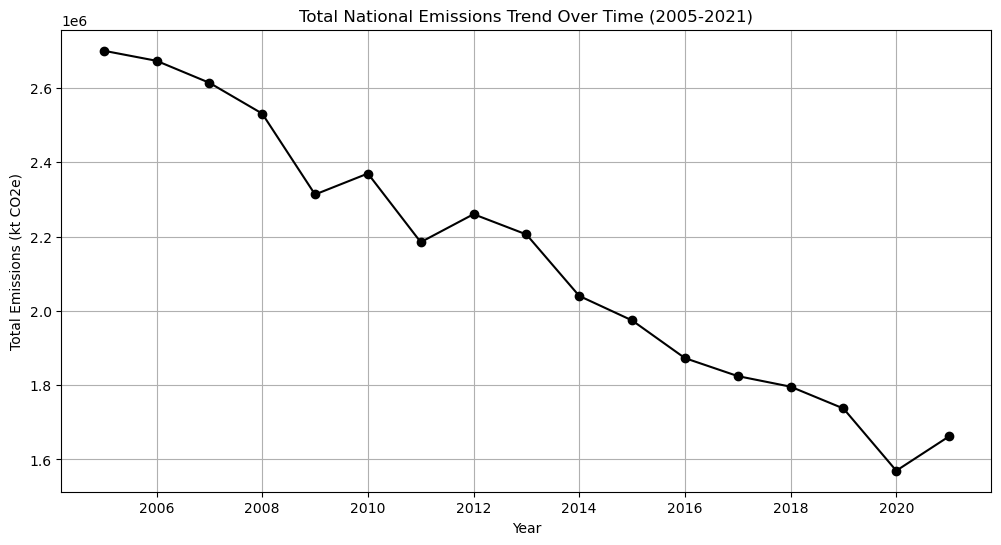

In [13]:
import matplotlib.pyplot as plt

# Group by 'Calendar Year' and sum the 'Grand Total' column to get total emissions for each year
yearly_emissions = data_1_1_actual.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the trend over time
plt.figure(figsize=(12, 6))
yearly_emissions.plot(marker='o', linestyle='-', color='black')
plt.title('Total National Emissions Trend Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()


In [14]:
# Convert the 'Grand Total' column to a numeric type
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Group by 'Local Authority Region/Country' and sum the 'Grand Total' column to get total emissions for each region again
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
regional_emissions = data_1_1_actual.groupby('Region/Country')['Grand Total'].sum()

# Sort the regional emissions in descending order and get the name of the first region
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
highest_emission_region = regional_emissions.sort_values(ascending=False).index[0]
highest_emission_value = regional_emissions.sort_values(ascending=False).iloc[0]

# Sort the regional emissions in ascending order and get the name of the first region
lowest_emission_region = regional_emissions.sort_values(ascending=True).index[0]
lowest_emission_value = regional_emissions.sort_values(ascending=True).iloc[0]

# Results
highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value

('National Total', 8763483.862937795, 'Unallocated', 70997.7272303627)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [15]:
regional_emissions

Region/Country
East Midlands                     1.246579e+06
East Midlands Total               6.759135e+05
East of England                   1.518514e+06
East of England Total             7.986982e+05
England Total                     6.830838e+06
London                            7.105470e+05
London Total                      7.105470e+05
National Total                    8.763484e+06
North East                        4.513099e+05
North East Total                  4.513099e+05
North West                        1.419484e+06
North West Total                  9.620017e+05
Northern Ireland                  3.910081e+05
Northern Ireland Total            3.910081e+05
Scotland                          8.602071e+05
Scotland Total                    8.602071e+05
South East                        1.713013e+06
South East Total                  1.001996e+06
South West                        1.073928e+06
South West Total                  6.987242e+05
Unallocated                       7.099773e+0

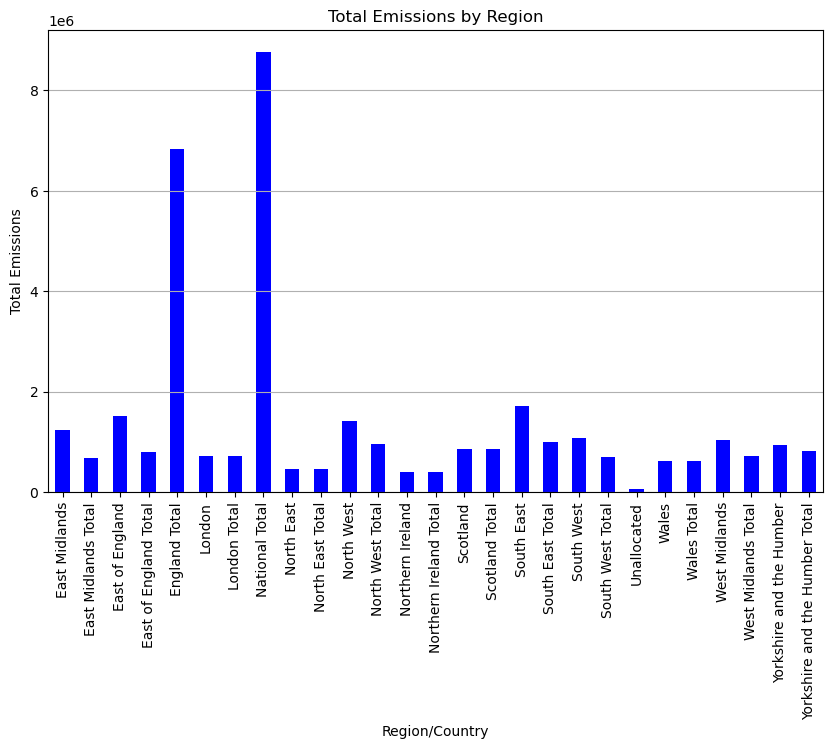

In [16]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [16]:
# Drop 'National Total','England Total' and 'Unallocated' from the Series
regional_emissions = regional_emissions.drop(labels=['National Total','England Total', 'Unallocated'])

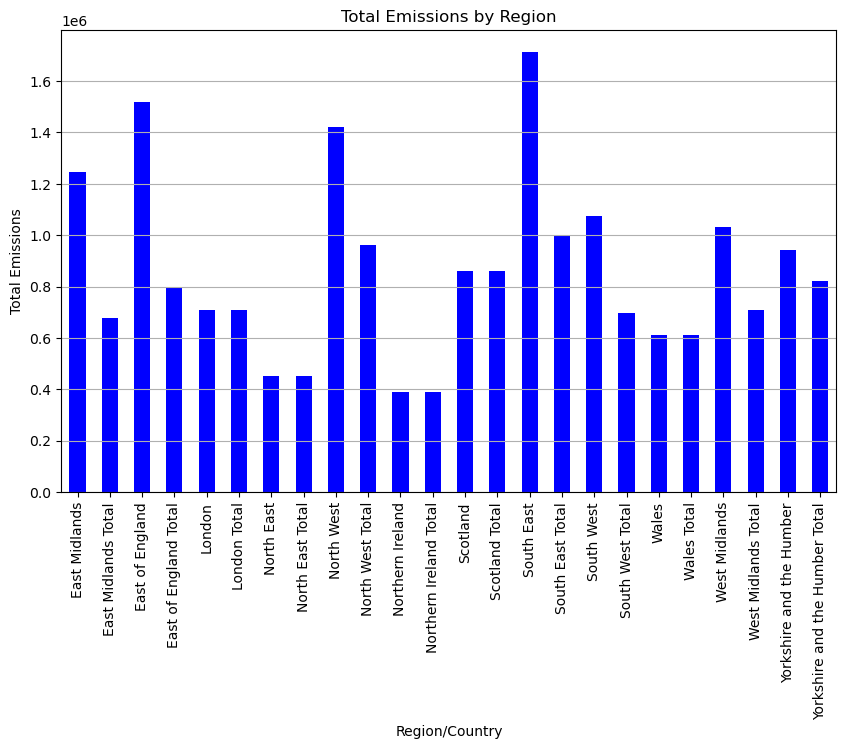

In [18]:
plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [19]:
# Drop 'National Total' and 'Unallocated' from the Series
#regional_emissions = regional_emissions.drop(labels=['National Total','England Total', 'Unallocated'])
#drop labels that end with total


In [20]:

# Convert 'Grand Total' to numeric, coercing errors to NaN
#data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Exclude rows where 'Region/Country' ends with 'total' 
#data_1_1_filtered = data_1_1_actual[
#    ~data_1_1_actual['Region/Country'].str.lower().str.endswith('total')
#]

# Group by 'Region/Country' and sum 'Grand Total' for remaining regions
#regional_emissions = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

# Drop 'Unallocated' from the Series
#regional_emissions = regional_emissions.drop(labels=['Unallocated'])

# Identify the highest and lowest emission regions
#highest_emission_region = regional_emissions.idxmax()
#lowest_emission_region = regional_emissions.idxmin()

# Get the highest and lowest emission values
#highest_emission_value = regional_emissions[highest_emission_region]
#lowest_emission_value = regional_emissions[lowest_emission_region]

# Results
#highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value


In [17]:
# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter out rows where 'Region/Country' ends with 'Total' or is 'Unallocated'
data_1_1_filtered = data_1_1_actual[
    ~data_1_1_actual['Region/Country'].str.endswith('Total') &
    ~data_1_1_actual['Region/Country'].str.contains('Unallocated', case=False)
]

# Group by 'Region/Country' and sum the 'Grand Total' column
regional_emissions = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

# Identify the regions with the highest and lowest cumulative emissions
highest_emission_region = regional_emissions.idxmax()
lowest_emission_region = regional_emissions.idxmin()

# Get the corresponding values for the highest and lowest emissions
highest_emission_value = regional_emissions[highest_emission_region]
lowest_emission_value = regional_emissions[lowest_emission_region]

# Output the results
(highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value)


('South East', 1713012.733123874, 'Northern Ireland', 391008.14327239833)

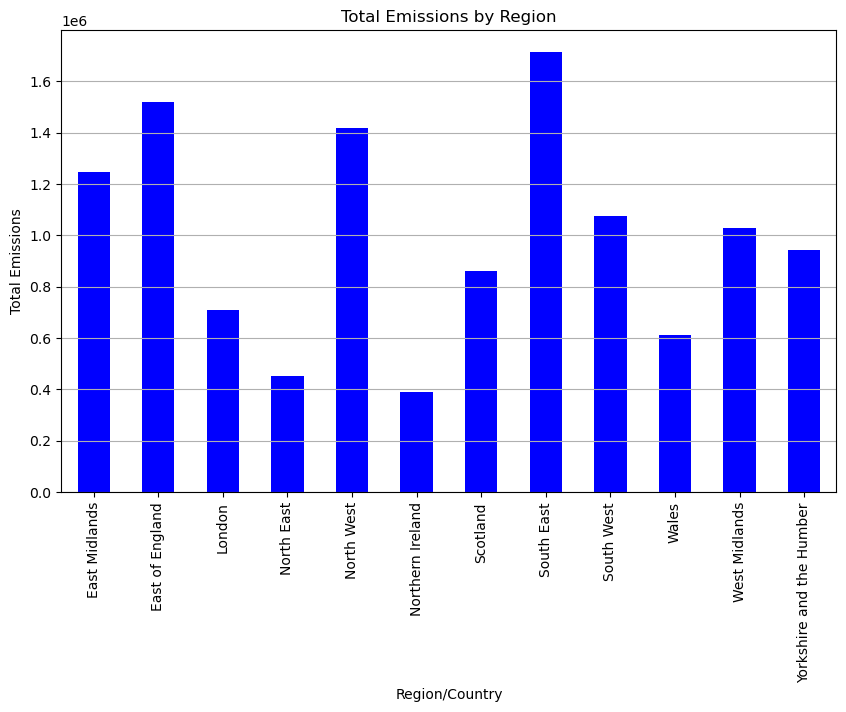

In [22]:
import matplotlib.pyplot as plt

# regional_emissions
# regional_emissions = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


In [18]:
regional_emissions

Region/Country
East Midlands               1.246579e+06
East of England             1.518514e+06
London                      7.105470e+05
North East                  4.513099e+05
North West                  1.419484e+06
Northern Ireland            3.910081e+05
Scotland                    8.602071e+05
South East                  1.713013e+06
South West                  1.073928e+06
Wales                       6.104329e+05
West Midlands               1.030287e+06
Yorkshire and the Humber    9.443414e+05
Name: Grand Total, dtype: float64

In [17]:
#import matplotlib.pyplot as plt
#import pandas as pd

#regions = ['East Midlands', 'East of England', 'London', 'North East', 'North West', 
#           'Northern Ireland', 'Scotland', 'South East', 'South West', 'Wales', 
#           'West Midlands', 'Yorkshire and the Humber']
#emissions = [1.246579e+06, 1.518514e+06, 7.105470e+05, 4.513099e+05, 1.419484e+06, 
#             3.910081e+05, 8.602071e+05, 1.713013e+06, 1.073928e+06, 6.104329e+05, 
#             1.030287e+06, 9.443414e+05]

#emissions_series = pd.Series(emissions, index=regions)

# Define colors, with red for 'West Midlands' and blue for others
#colors = ['red' if region == 'West Midlands' else 'blue' for region in regions]

# Create the bar plot
#plt.figure(figsize=(10, 6))
#emissions_series.plot(kind='bar', color=colors)
#plt.title('Total Emissions by Region')
#plt.xlabel('Region/Country')
#plt.ylabel('Grand Total Emissions')
#plt.xticks(rotation=90)
#plt.tight_layout()  
#plt.grid(axis='y')
# plt.savefig('emissions_by_region.png')

# Display the plot
#plt.show()


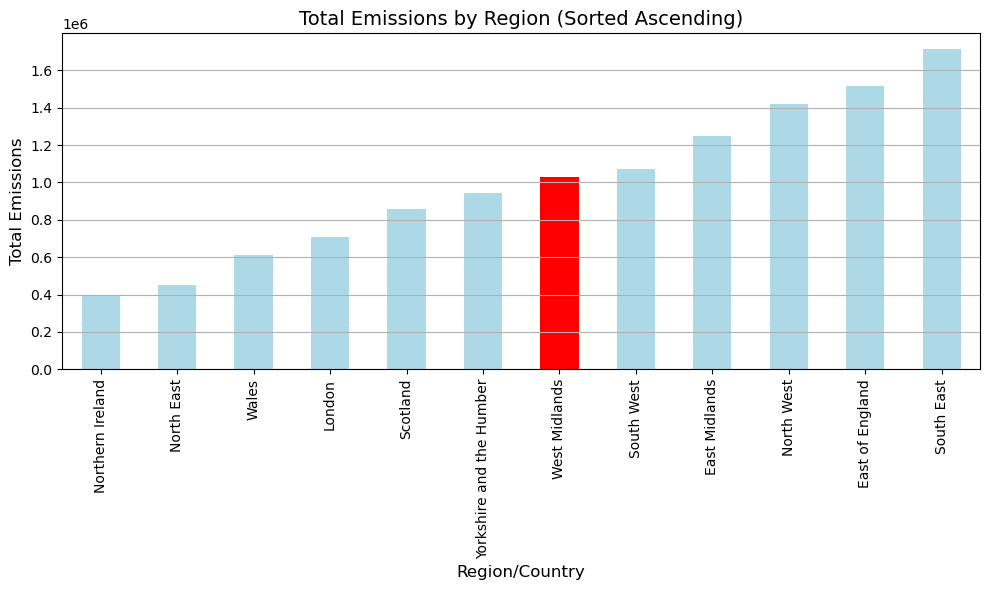

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the series in ascending order for the plot
sorted_emissions = regional_emissions.sort_values()

# Define the colors for the bars, 'red' for 'West Midlands Total', 'skyblue' for the rest
colors = ['red' if region == 'West Midlands' else 'lightblue' for region in sorted_emissions.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
sorted_emissions.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Total Emissions by Region (Sorted Ascending)', fontsize=14)
plt.xlabel('Region/Country', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y')

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [20]:
sorted_emissions

Region/Country
Northern Ireland            3.910081e+05
North East                  4.513099e+05
Wales                       6.104329e+05
London                      7.105470e+05
Scotland                    8.602071e+05
Yorkshire and the Humber    9.443414e+05
West Midlands               1.030287e+06
South West                  1.073928e+06
East Midlands               1.246579e+06
North West                  1.419484e+06
East of England             1.518514e+06
South East                  1.713013e+06
Name: Grand Total, dtype: float64

In [149]:
# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Group by 'Region/Country' and sum the 'Grand Total' column
regional_emissions_total = data_1_1_actual.groupby('Region/Country')['Grand Total'].sum()

# Drop 'National Total' and 'Unallocated' from the Series
regional_emissions_total = regional_emissions_total.drop(labels=['National Total', 'Unallocated'])

# Identify the regions with the highest and lowest cumulative emissions
highest_emission_region = regional_emissions_total.idxmax()
lowest_emission_region = regional_emissions_total.idxmin()

# Get the corresponding values for the highest and lowest emissions
highest_emission_value = regional_emissions_total[highest_emission_region]
lowest_emission_value = regional_emissions_total[lowest_emission_region]

# Output the results
(highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value)


('England Total', 6830837.969058414, 'Northern Ireland', 391008.14327239833)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html

In [150]:
# Keep only rows where 'Region/Country' ends with 'total' (case insensitive)
#data_1_1_filtered = data_1_1_actual[
#    data_1_1_actual['Region/Country'].str.lower().str.endswith('total')
#]


In [151]:

# Convert 'Grand Total' to numeric, coercing errors to NaN
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Keep only rows where 'Region/Country' ends with 'total' 
data_1_1_filtered = data_1_1_actual[
    data_1_1_actual['Region/Country'].str.lower().str.endswith('total')
]


# Group by 'Region/Country' and sum 'Grand Total' for remaining regions
regional_emissions_total = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

# Drop 'Unallocated' from the Series
#regional_emissions_total = regional_emissions_total.drop(labels=['Unallocated'])

# Drop 'National Total' from the Series
regional_emissions_total = regional_emissions_total.drop(labels=['National Total'])

# Drop 'England Total' from the Series
regional_emissions_total = regional_emissions_total.drop(labels=['England Total'])

# Identify the highest and lowest emission regions
highest_emission_region = regional_emissions_total.idxmax()
lowest_emission_region = regional_emissions_total.idxmin()

# Get the highest and lowest emission values
highest_emission_value = regional_emissions_total[highest_emission_region]
lowest_emission_value = regional_emissions_total[lowest_emission_region]

# Results
highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value

('South East Total',
 1001996.0574329,
 'Northern Ireland Total',
 391008.14327239833)

In [152]:
# Sort the regional emissions in descending order and get the name of the first region
highest_emission_region = regional_emissions.sort_values(ascending=False).index[0]
highest_emission_value = regional_emissions.sort_values(ascending=False).iloc[0]

# Sort the regional emissions in ascending order and get the name of the first region
lowest_emission_region = regional_emissions.sort_values(ascending=True).index[0]
lowest_emission_value = regional_emissions.sort_values(ascending=True).iloc[0]

# Results
highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value

('South East', 1713012.733123874, 'Northern Ireland', 391008.14327239833)

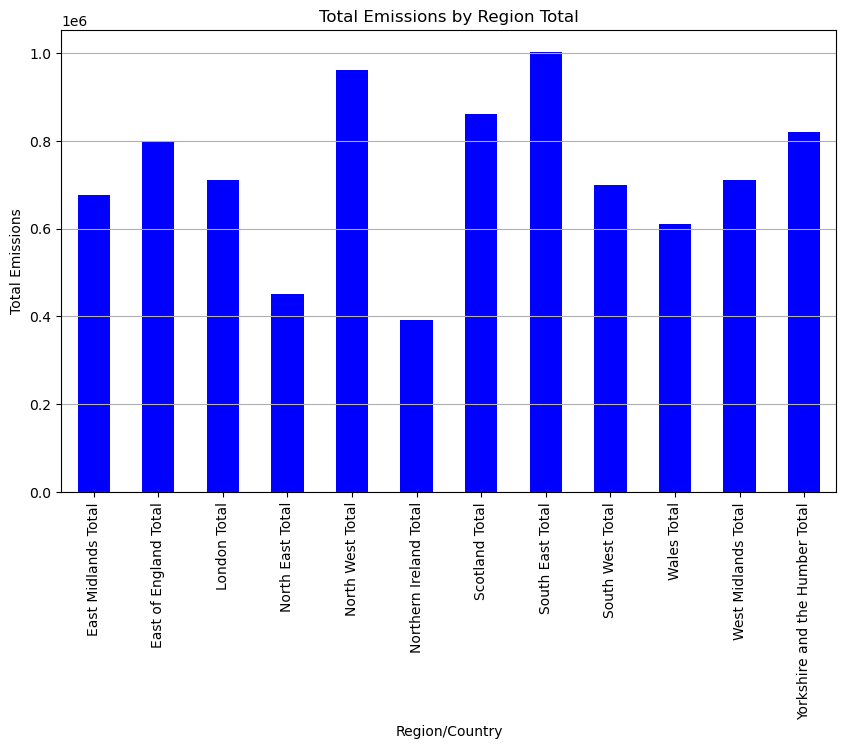

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
regional_emissions_total.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region Total')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


In [153]:
regional_emissions_total

Region/Country
East Midlands Total               6.759135e+05
East of England Total             7.986982e+05
London Total                      7.105470e+05
North East Total                  4.513099e+05
North West Total                  9.620017e+05
Northern Ireland Total            3.910081e+05
Scotland Total                    8.602071e+05
South East Total                  1.001996e+06
South West Total                  6.987242e+05
Wales Total                       6.104329e+05
West Midlands Total               7.107770e+05
Yorkshire and the Humber Total    8.208705e+05
Name: Grand Total, dtype: float64

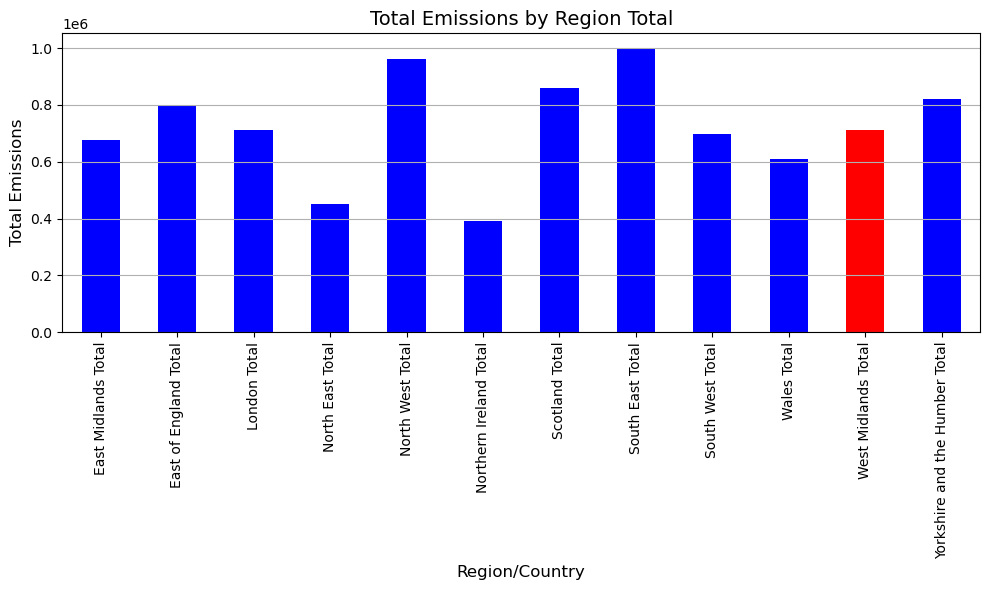

In [24]:

# Convert the dictionary to a pandas Series
emissions_series = pd.Series(regional_emissions_total)

# Define the colors for the bars, 'red' for 'West Midlands Total', 'skyblue' for the rest
colors = ['red' if region == 'West Midlands Total' else 'blue' for region in emissions_series.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
emissions_series.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Total Emissions by Region Total', fontsize=14)
plt.xlabel('Region/Country', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y')
# plt.savefig('emissions_by_region_total.png')

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()



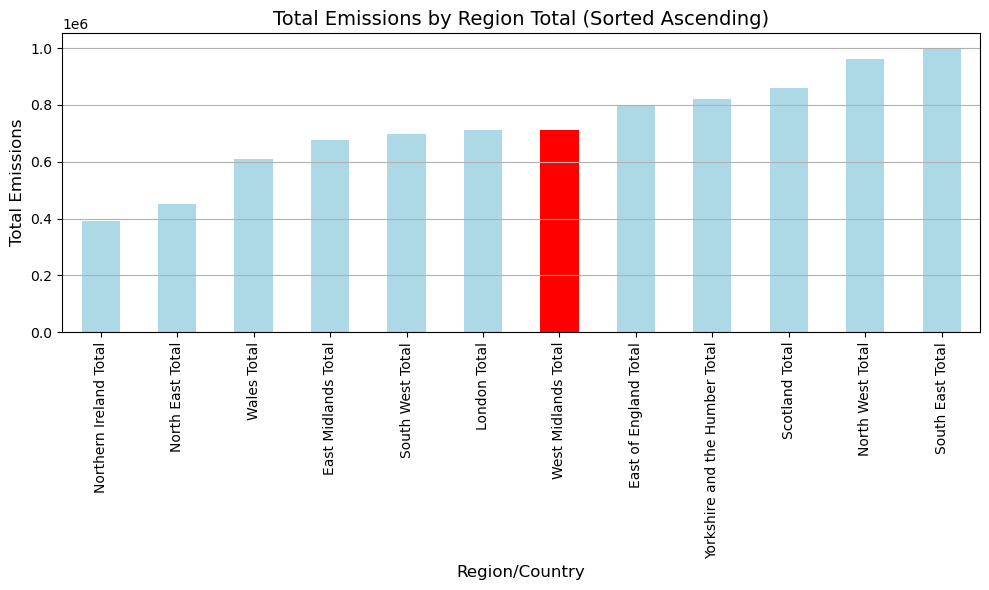

In [154]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the series in ascending order for the plot
sorted_emissions = regional_emissions_total.sort_values()

# Define the colors for the bars, 'red' for 'West Midlands Total', 'skyblue' for the rest
colors = ['red' if region == 'West Midlands Total' else 'lightblue' for region in sorted_emissions.index]

# Create the bar plot
plt.figure(figsize=(10, 6))
sorted_emissions.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Total Emissions by Region Total (Sorted Ascending)', fontsize=14)
plt.xlabel('Region/Country', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.xticks(rotation=90)  # Rotate the region names for better readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


<H1>WestMidlands<H1/>

In [21]:
# Filter the data for the "West Midlands" Region/Country
west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']
west_midlands_data

3    Region/Country Second Tier Authority       Local Authority  \
2040  West Midlands            Birmingham            Birmingham   
2041  West Midlands            Birmingham            Birmingham   
2042  West Midlands            Birmingham            Birmingham   
2043  West Midlands            Birmingham            Birmingham   
2044  West Midlands            Birmingham            Birmingham   
...             ...                   ...                   ...   
2596  West Midlands  Worcestershire Total  Worcestershire Total   
2597  West Midlands  Worcestershire Total  Worcestershire Total   
2598  West Midlands  Worcestershire Total  Worcestershire Total   
2599  West Midlands  Worcestershire Total  Worcestershire Total   
2600  West Midlands  Worcestershire Total  Worcestershire Total   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
2040            E08000025          2005           526.551509    366.037594   
2041            E08000025          2006            537.58464    325.085629   
2042            E08000025          2007           510.882763    311.246683   
2043            E08000025          2008           529.503396    305.588896   
2044            E08000025          2009           429.653608    281.346962   
...                   ...           ...                  ...           ...   
2596                  NaN          2017           152.467092    116.944652   
2597                  NaN          2018           172.838333    131.012733   
2598                  NaN          2019           146.809055    137.062654   
2599                  NaN          2020           121.875589    115.848439   
2600                  NaN          2021           141.541027    169.279094   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
2040                      61.953269       261.620286    1216.162658  ...   
2041                      82.275024       254.186129    1199.131422  ...   
2042                      94.635887        259.93259    1176.697923  ...   
2043                     133.077044       207.353832    1175.523168  ...   
2044                      44.531193       182.413125     937.944889  ...   
...                             ...              ...            ...  ...   
2596                      19.834311       217.425383     506.671438  ...   
2597                      21.624796       232.232283     557.708145  ...   
2598                      19.014284       197.144455     500.030448  ...   
2599                      15.014089       197.552499     450.290616  ...   
2600                      18.323263       205.906984     535.050368  ...   

3    Agriculture Soils Agriculture Total    Landfill Waste Management 'Other'  \
2040          2.318744         15.128539   11.122149                43.552592   
2041          2.519812         15.762343   10.324532                48.716274   
2042          2.361162         15.055982   36.275553                50.047079   
2043          2.487657         14.784999   30.037779                48.617361   
2044          2.289698         13.508004  159.413026                47.379221   
...                ...               ...         ...                      ...   
2596         68.894191        386.871084  216.880509                46.866939   
2597         69.275392        405.306105   194.41849                46.092127   
2598          72.29286        383.175445  194.909071                47.087417   
2599         60.056299        359.954182  193.621385                44.625131   
2600         68.156731        373.633695  201.635026                 46.49455   

3    Waste Management Total  Grand Total  \
2040              54.674741  7059.334372   
2041              59.040806  6952.112034   
2042              86.322633  6800.522322   
2043              78.655141  6744.677640   
2044             206.792247  6099.737055   
...                     ...          ...   
2596             263.747448  3987.637970   
2597             240

In [22]:
# Filter out rows where "Second Tier Authority" ends with "Total"
west_midlands_data_filtered = west_midlands_data[~west_midlands_data['Second Tier Authority'].str.endswith("Total")]

In [23]:
west_midlands_data_filtered

3    Region/Country Second Tier Authority Local Authority  \
2040  West Midlands            Birmingham      Birmingham   
2041  West Midlands            Birmingham      Birmingham   
2042  West Midlands            Birmingham      Birmingham   
2043  West Midlands            Birmingham      Birmingham   
2044  West Midlands            Birmingham      Birmingham   
...             ...                   ...             ...   
2579  West Midlands        Worcestershire     Wyre Forest   
2580  West Midlands        Worcestershire     Wyre Forest   
2581  West Midlands        Worcestershire     Wyre Forest   
2582  West Midlands        Worcestershire     Wyre Forest   
2583  West Midlands        Worcestershire     Wyre Forest   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
2040            E08000025          2005           526.551509    366.037594   
2041            E08000025          2006            537.58464    325.085629   
2042            E08000025          2007           510.882763    311.246683   
2043            E08000025          2008           529.503396    305.588896   
2044            E08000025          2009           429.653608    281.346962   
...                   ...           ...                  ...           ...   
2579            E07000239          2017            21.596821     10.207297   
2580            E07000239          2018            26.603644     13.005476   
2581            E07000239          2019            23.235559     17.494639   
2582            E07000239          2020            17.900403     11.514084   
2583            E07000239          2021            21.503682     14.971111   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
2040                      61.953269       261.620286    1216.162658  ...   
2041                      82.275024       254.186129    1199.131422  ...   
2042                      94.635887        259.93259    1176.697923  ...   
2043                     133.077044       207.353832    1175.523168  ...   
2044                      44.531193       182.413125     937.944889  ...   
...                             ...              ...            ...  ...   
2579                       1.131147        48.643531      81.578795  ...   
2580                       1.125587        59.088112       99.82282  ...   
2581                       1.147332        42.889724      84.767255  ...   
2582                       1.128091        44.760307      75.302885  ...   
2583                       1.077544         43.31466      80.866997  ...   

3    Agriculture Soils Agriculture Total    Landfill Waste Management 'Other'  \
2040          2.318744         15.128539   11.122149                43.552592   
2041          2.519812         15.762343   10.324532                48.716274   
2042          2.361162         15.055982   36.275553                50.047079   
2043          2.487657         14.784999   30.037779                48.617361   
2044          2.289698         13.508004  159.413026                47.379221   
...                ...               ...         ...                      ...   
2579          6.365818         33.125984   35.766842                 5.064742   
2580          6.132734         32.343872   32.129977                 5.063163   
2581          6.015508         31.772339   31.502365                 4.954569   
2582          5.358702         30.189129   31.393792                 4.728242   
2583          5.185539         30.605628   32.829161                  5.01005   

3    Waste Management Total  Grand Total  \
2040              54.674741  7059.334372   
2041              59.040806  6952.112034   
2042              86.322633  6800.522322   
2043              78.655141  6744.677640   
2044             206.792247  6099.737055   
...                     ...          ...   
2579              40.831584   499.390383   
2580               37.19314   489.710354   
2581              36.456934   458.909804   
2582

In [24]:
# Pivot table creation
pivot_table = pd.pivot_table(
    west_midlands_data_filtered, 
    values=[
        'Commercial Total', 'Waste Management Total', 'Agriculture Total', 
        'Transport Total', 'Domestic Total', 'Public Sector Total', 
        'Industry Total', 'LULUCF Net Emissions','Emissions per km2 (kt CO2e)'
    ],
    index=['Calendar Year'], 
    aggfunc=sum
)

# Transpose the pivot table to have categories as rows and years as columns
pivot_table_transposed = pivot_table.T

# Print the transposed pivot table
# print(pivot_table_transposed)
# pivot_table_transposed.to_csv('features_by_years.csv')


In [159]:
pivot_table

3             Agriculture Total Commercial Total Domestic Total  \
Calendar Year                                                     
2005                4028.975542      5809.331253   13449.536094   
2006                3977.611559      6076.632436   13583.317568   
2007                 3905.02243      5783.889127   13081.835599   
2008                3896.858302       5577.45716   13033.414716   
2009                3807.240767      4712.011264   11835.167963   
2010                3840.081371      5001.267074   12685.403118   
2011                3761.345066      4672.226863   11112.642004   
2012                3809.765776      4997.596854   11868.951211   
2013                3722.949528      4772.413248   11531.527193   
2014                3809.989355      4075.739643    9798.620535   
2015                 3805.79878      3700.093353    9562.443689   
2016                3692.000037      3288.671641    9036.525528   
2017                3766.397313      2555.056076    8585.065579   
2018                3806.417076      1707.805299    8419.354441   
2019                3752.726686      1378.760231    8136.337663   
2020                3573.008128      1094.025601    7960.604044   
2021                3639.604571      1289.487328    8254.300582   

3             Emissions per km2 (kt CO2e) Industry Total LULUCF Net Emissions  \
Calendar Year                                                                   
2005                           289.942804   10110.465071          -317.593628   
2006                           288.863353   10197.714268          -326.862871   
2007                           286.449175   10138.235254          -364.168107   
2008                           274.077573    9265.801065          -409.084036   
2009                           252.942548    8063.486578          -410.381053   
2010                           265.708579    8605.356043          -416.001919   
2011                           244.269938    8053.840463          -437.639005   
2012                           250.674974    7934.255575          -405.366106   
2013                           245.219017    7930.368103            -444.5167   
2014                           226.299273    7683.166895          -443.113774   
2015                           221.343256    7258.445476          -467.135531   
2016                           211.633827    6871.729735          -419.905408   
2017                           205.073094    6795.989583          -447.164862   
2018                           199.917735    7338.841582          -432.569368   
2019                           189.296645    6823.598748          -457.906092   
2020                           169.355461    6329.377088          -461.502795   
2021                           181.918944    7025.526089          -458.060889   

3             Public Sector Total Transport Total Waste Management Total  
Calendar Year                                                             
2005                  2157.052152     13501.32343             993.132504  
2006                    2068.2373    13305.491246             982.898678  
2007                  1940.546956    13427.290157            1704.174232  
2008                  1836.585244    12933.307202            1555.034766  
2009                  1569.812241    12494.989414            2215.670625  
2010                  1702.472983    12409.032802            2569.207488  
2011                  1543.437224    12275.012297             2099.16877  
2012                  1655.926145    12166.688081            2004.062529  
2013                  1632.970841    12070.626129            1965.555586  
2014                  1407.210297    12321.712167             1760.41934  
2015                  1343.820223    12586.051221            1781.099069  
2016                  1185.686926    12802.317734            1976.630326  
2017                  1247.662167    12775.515791            2203.734087  
2018                  1400.427797    12562.288533            

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [25]:
pivot_table_transposed

Calendar Year                        2005          2006          2007  \
3                                                                       
Agriculture Total             4028.975542   3977.611559    3905.02243   
Commercial Total              5809.331253   6076.632436   5783.889127   
Domestic Total               13449.536094  13583.317568  13081.835599   
Emissions per km2 (kt CO2e)    289.942804    288.863353    286.449175   
Industry Total               10110.465071  10197.714268  10138.235254   
LULUCF Net Emissions          -317.593628   -326.862871   -364.168107   
Public Sector Total           2157.052152     2068.2373   1940.546956   
Transport Total               13501.32343  13305.491246  13427.290157   
Waste Management Total         993.132504    982.898678   1704.174232   

Calendar Year                        2008          2009          2010  \
3                                                                       
Agriculture Total             3896.858302   3807.240767   3840.081371   
Commercial Total               5577.45716   4712.011264   5001.267074   
Domestic Total               13033.414716  11835.167963  12685.403118   
Emissions per km2 (kt CO2e)    274.077573    252.942548    265.708579   
Industry Total                9265.801065   8063.486578   8605.356043   
LULUCF Net Emissions          -409.084036   -410.381053   -416.001919   
Public Sector Total           1836.585244   1569.812241   1702.472983   
Transport Total              12933.307202  12494.989414  12409.032802   
Waste Management Total        1555.034766   2215.670625   2569.207488   

Calendar Year                        2011          2012          2013  \
3                                                                       
Agriculture Total             3761.345066   3809.765776   3722.949528   
Commercial Total              4672.226863   4997.596854   4772.413248   
Domestic Total               11112.642004  11868.951211  11531.527193   
Emissions per km2 (kt CO2e)    244.269938    250.674974    245.219017   
Industry Total                8053.840463   7934.255575   7930.368103   
LULUCF Net Emissions          -437.639005   -405.366106     -444.5167   
Public Sector Total           1543.437224   1655.926145   1632.970841   
Transport Total              12275.012297  12166.688081  12070.626129   
Waste Management Total         2099.16877   2004.062529   1965.555586   

Calendar Year                        2014          2015          2016  \
3                                                                       
Agriculture Total             3809.989355    3805.79878   3692.000037   
Commercial Total              4075.739643   3700.093353   3288.671641   
Domestic Total                9798.620535   9562.443689   9036.525528   
Emissions per km2 (kt CO2e)    226.299273    221.343256    211.633827   
Industry Total                7683.166895   7258.445476   6871.729735   
LULUCF Net Emissions          -443.113774   -467.135531   -419.905408   
Public Sector Total           1407.210297   1343.820223   1185.686926   
Transport Total              12321.712167  12586.051221  12802.317734   
Waste Management Total         1760.41934   1781.099069   1976.630326   

Calendar Year                        2017          2018          2019  \
3                                                                       
Agriculture Total             3766.397313   3806.417076   3752.726686   
Commercial Total              2555.056076   1707.805299   1378.760231   
Domestic Total                8585.065579   8419.354441   8136.337663   
Emissions per km2 (kt CO2e)    205.073094    199.917735    189.296645   
Industry Total                6795.989583   7338.841582   6823.598748   
LULUCF Net Emissions          -447.164862   -432.569368   -457.906092   
Public Sector Total           1247.662167   1400.427797   1289.674005   
Transport Total              12775.515791  12562.288533  12222.766602   
Waste Management Total        2203.734087   2002.43854

In [32]:
pivot_table_transposed.corr()

Calendar Year      2005      2006      2007      2008      2009      2010  \
Calendar Year                                                               
2005           1.000000  0.999707  0.998732  0.998613  0.991479  0.991547   
2006           0.999707  1.000000  0.998403  0.998334  0.989789  0.990788   
2007           0.998732  0.998403  1.000000  0.998963  0.994393  0.994761   
2008           0.998613  0.998334  0.998963  1.000000  0.996148  0.996680   
2009           0.991479  0.989789  0.994393  0.996148  1.000000  0.998480   
2010           0.991547  0.990788  0.994761  0.996680  0.998480  1.000000   
2011           0.991912  0.990035  0.995211  0.995657  0.999338  0.996746   
2012           0.993618  0.992557  0.995505  0.997844  0.999391  0.998603   
2013           0.993859  0.992489  0.996049  0.997708  0.999718  0.998446   
2014           0.983923  0.980433  0.987501  0.986340  0.993185  0.986271   
2015           0.975687  0.971191  0.979535  0.978960  0.989331  0.980466   
2016           0.961511  0.955886  0.966698  0.965865  0.980747  0.969608   
2017           0.946135  0.939172  0.952439  0.950809  0.969569  0.957166   
2018           0.939583  0.931815  0.945399  0.941955  0.959834  0.947864   
2019           0.932480  0.924216  0.938189  0.935568  0.955375  0.942720   
2020           0.947603  0.940674  0.951952  0.950719  0.966119  0.958749   
2021           0.948853  0.941725  0.953161  0.950351  0.964785  0.955883   

Calendar Year      2011      2012      2013      2014      2015      2016  \
Calendar Year                                                               
2005           0.991912  0.993618  0.993859  0.983923  0.975687  0.961511   
2006           0.990035  0.992557  0.992489  0.980433  0.971191  0.955886   
2007           0.995211  0.995505  0.996049  0.987501  0.979535  0.966698   
2008           0.995657  0.997844  0.997708  0.986340  0.978960  0.965865   
2009           0.999338  0.999391  0.999718  0.993185  0.989331  0.980747   
2010           0.996746  0.998603  0.998446  0.986271  0.980466  0.969608   
2011           1.000000  0.998421  0.999245  0.996167  0.992308  0.984251   
2012           0.998421  1.000000  0.999808  0.990443  0.985482  0.975169   
2013           0.999245  0.999808  1.000000  0.992578  0.987924  0.978229   
2014           0.996167  0.990443  0.992578  1.000000  0.998836  0.994492   
2015           0.992308  0.985482  0.987924  0.998836  1.000000  0.998237   
2016           0.984251  0.975169  0.978229  0.994492  0.998237  1.000000   
2017           0.973556  0.961938  0.965972  0.987349  0.993195  0.997802   
2018           0.964359  0.950899  0.956038  0.980165  0.985935  0.990656   
2019           0.959465  0.945959  0.951104  0.976078  0.983098  0.988950   
2020           0.967777  0.958274  0.962484  0.977006  0.980691  0.981532   
2021           0.967906  0.956731  0.961484  0.979746  0.983483  0.984991   

Calendar Year      2017      2018      2019      2020      2021  
Calendar Year                                                    
2005           0.946135  0.939583  0.932480  0.947603  0.948853  
2006           0.939172  0.931815  0.924216  0.940674  0.941725  
2007           0.952439  0.945399  0.938189  0.951952  0.953161  
2008           0.950809  0.941955  0.935568  0.950719  0.950351  
2009           0.969569  0.959834  0.955375  0.966119  0.964785  
2010           0.957166  0.947864  0.942720  0.958749  0.955883  
2011           0.973556  0.964359  0.959465  0.967777  0.967906  
2012           0.961938  0.950899  0.945959  0.958274  0.956731  
2013           0.965972  0.956038  0.951104  0.962484  0.961484  
2014           0.987349  0.980165  0.976078  0.977006  0.979746  
2015           0.993195  0.985935  0.983098  0.980691  0.983483  
2016           0.997802  0.990656  0.988950  0.981532  0.984991  
2017           1.000000  0.996425  0.995866  0.986805  0.990171  
2018           0.996425  1.000000  0.999545  0.993473  0.997028  
2019           0

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [26]:
pivot_table.corr()

3                            Agriculture Total  Commercial Total  \
3                                                                  
Agriculture Total                     1.000000          0.775494   
Commercial Total                      0.775494          1.000000   
Domestic Total                        0.793451          0.959494   
Emissions per km2 (kt CO2e)           0.860274          0.974504   
Industry Total                        0.880980          0.866052   
LULUCF Net Emissions                  0.833005          0.729578   
Public Sector Total                   0.861581          0.847188   
Transport Total                       0.852000          0.680485   
Waste Management Total               -0.477497         -0.267074   

3                            Domestic Total  Emissions per km2 (kt CO2e)  \
3                                                                          
Agriculture Total                  0.793451                     0.860274   
Commercial Total                   0.959494                     0.974504   
Domestic Total                     1.000000                     0.983375   
Emissions per km2 (kt CO2e)        0.983375                     1.000000   
Industry Total                     0.928145                     0.942496   
LULUCF Net Emissions               0.796254                     0.818817   
Public Sector Total                0.934487                     0.925586   
Transport Total                    0.608518                     0.732963   
Waste Management Total            -0.313520                    -0.321745   

3                            Industry Total  LULUCF Net Emissions  \
3                                                                   
Agriculture Total                  0.880980              0.833005   
Commercial Total                   0.866052              0.729578   
Domestic Total                     0.928145              0.796254   
Emissions per km2 (kt CO2e)        0.942496              0.818817   
Industry Total                     1.000000              0.889868   
LULUCF Net Emissions               0.889868              1.000000   
Public Sector Total                0.975990              0.887573   
Transport Total                    0.684668              0.665688   
Waste Management Total            -0.527468             -0.608115   

3                            Public Sector Total  Transport Total  \
3                                                                   
Agriculture Total                       0.861581         0.852000   
Commercial Total                        0.847188         0.680485   
Domestic Total                          0.934487         0.608518   
Emissions per km2 (kt CO2e)             0.925586         0.732963   
Industry Total                          0.975990         0.684668   
LULUCF Net Emissions                    0.887573         0.665688   
Public Sector Total                     1.000000         0.604193   
Transport Total                         0.604193         1.000000   
Waste Management Total                 -0.542619        -0.237519   

3                            Waste Management Total  
3                                                    
Agriculture Total                         -0.477497  
Commercial Total                          -0.267074  
Domestic Total                            -0.313520  
Emissions per km2 (kt CO2e)               -0.321745  
Industry Total                            -0.527468  
LULUCF Net Emissions                      -0.608115  
Public Sector Total                       -0.542619  
Transport Total                           -0.237519  
Waste Management Total                     1.000000

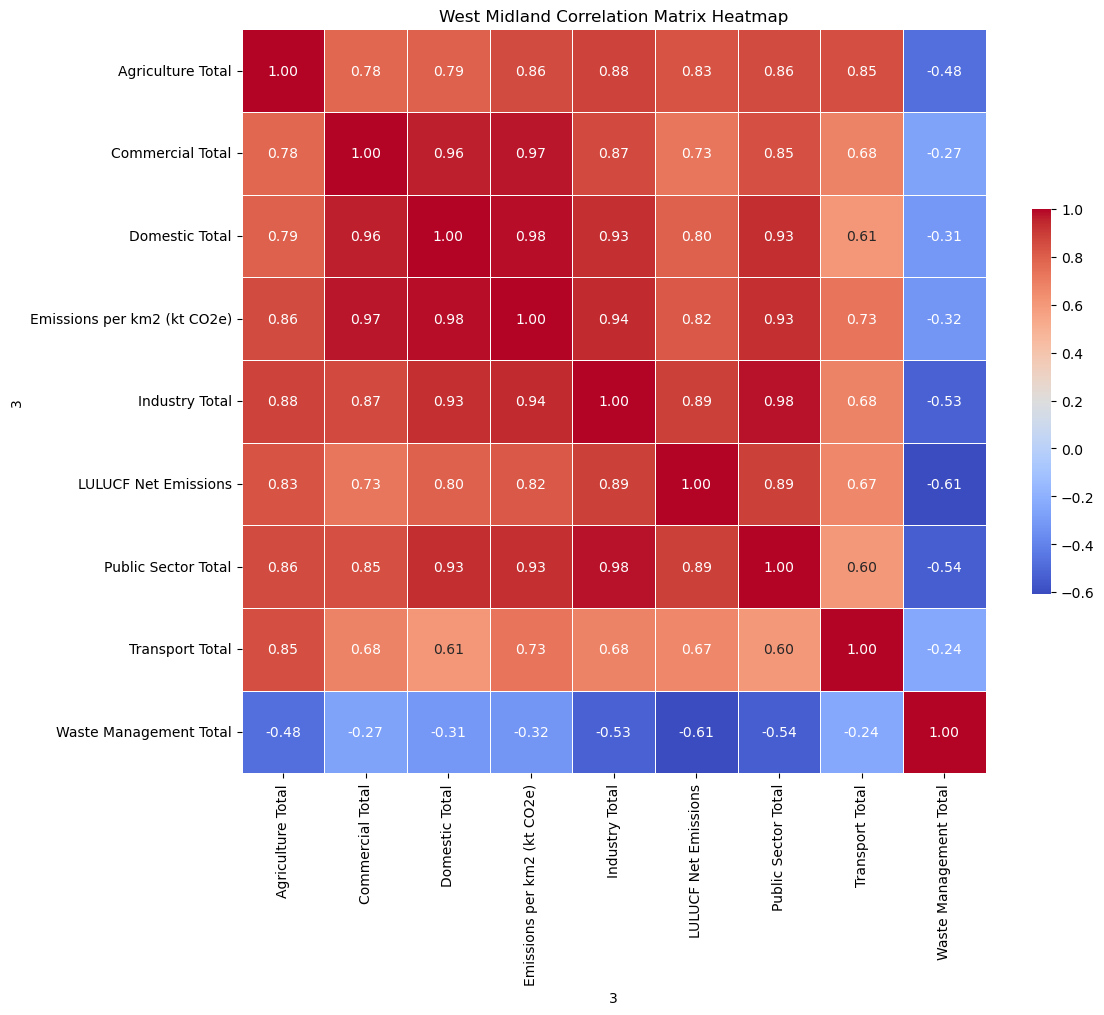

In [27]:
# Generate the correlation matrix
corr = pivot_table.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('West Midland Correlation Matrix Heatmap')

# Show the plot
plt.show()


Values close to <b>1</b> indicate a strong positive correlation, meaning that as one feature increases, the other tends to increase as well.

Values close to <b>-1</b> indicate a strong negative correlation, meaning that as one feature increases, the other tends to decrease.

Values close to <b>0</b> indicate little to no linear relationship between the features.

In [28]:
# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']
# Add columns that end with "Total"
columns_to_keep.extend([col for col in west_midlands_data_filtered.columns if col.endswith("Total")])

In [29]:
west_midlands_filtered_columns = west_midlands_data_filtered[columns_to_keep]

west_midlands_filtered_columns.to_csv('west_midlands_filtered_columns.csv')
west_midlands_filtered_columns

3    Region/Country Second Tier Authority Local Authority  \
2040  West Midlands            Birmingham      Birmingham   
2041  West Midlands            Birmingham      Birmingham   
2042  West Midlands            Birmingham      Birmingham   
2043  West Midlands            Birmingham      Birmingham   
2044  West Midlands            Birmingham      Birmingham   
...             ...                   ...             ...   
2579  West Midlands        Worcestershire     Wyre Forest   
2580  West Midlands        Worcestershire     Wyre Forest   
2581  West Midlands        Worcestershire     Wyre Forest   
2582  West Midlands        Worcestershire     Wyre Forest   
2583  West Midlands        Worcestershire     Wyre Forest   

3    Local Authority Code Calendar Year LULUCF Net Emissions Industry Total  \
2040            E08000025          2005            13.873543    1216.162658   
2041            E08000025          2006            13.855886    1199.131422   
2042            E08000025          2007            13.477209    1176.697923   
2043            E08000025          2008            12.998567    1175.523168   
2044            E08000025          2009            12.151837     937.944889   
...                   ...           ...                  ...            ...   
2579            E07000239          2017            -22.99366      81.578795   
2580            E07000239          2018           -22.677647       99.82282   
2581            E07000239          2019           -22.823968      84.767255   
2582            E07000239          2020           -23.150931      75.302885   
2583            E07000239          2021           -22.956472      80.866997   

3    Commercial Total Public Sector Total Domestic Total Transport Total  \
2040      1170.441473           558.70517    2359.376951     1670.971299   
2041      1168.499559          519.502282    2365.574895     1610.744841   
2042      1111.410745           492.80575     2283.42429      1621.32779   
2043      1143.259246          489.438236    2284.490311     1545.527971   
2044       945.363805          423.187511    2062.886425     1497.902337   
...               ...                 ...            ...             ...   
2579        39.204973            18.44841      154.11273      155.081565   
2580        23.783474           18.025695      149.76546      151.453539   
2581        22.492546           15.106118     144.241608      146.896973   
2582        16.067331           14.061786     141.095909      118.871468   
2583        17.888049            14.58203     144.139487      133.576301   

3    Agriculture Total Waste Management Total  Grand Total  
2040         15.128539              54.674741  7059.334372  
2041         15.762343              59.040806  6952.112034  
2042         15.055982              86.322633  6800.522322  
2043         14.784999              78.655141  6744.677640  
2044         13.508004             206.792247  6099.737055  
...                ...                    ...          ...  
2579         33.125984              40.831584   499.390383  
2580         32.343872               37.19314   489.710354  
2581         31.772339              36.456934   458.909804  
2582         30.189129              36.122034   408.559610  
2583         30.605628              37.839211   436.541231  

[510 rows x 14 columns]

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [30]:
# Create the pivot table of west_midlands local authorities emission
west_midlands_local_authority_emissions = pd.pivot_table(west_midlands_filtered_columns, values='Grand Total', index=['Local Authority'], columns=['Calendar Year'])

west_midlands_local_authority_emissions.to_csv('west_midlands_filtered_columns_by_year.csv')
west_midlands_local_authority_emissions


Calendar Year                    2005         2006         2007         2008  \
Local Authority                                                                
Birmingham                7059.334372  6952.112034  6800.522322  6744.677640   
Bromsgrove                 956.642291   966.027098  1014.325992   966.508457   
Cannock Chase              588.979929   597.874966   584.212829   554.965633   
Coventry                  2285.257172  2244.459643  2109.501041  2028.053404   
Dudley                    1983.590348  1972.154700  1888.505634  1818.345968   
East Staffordshire        1287.270750  1298.775799  1260.546128  1245.328814   
Herefordshire, County of  2091.684474  2090.207781  2038.853224  1975.986634   
Lichfield                 1004.513597  1022.789515  1013.242837   993.374843   
Malvern Hills              772.773159   799.621230   848.442583   797.397569   
Newcastle-under-Lyme      1121.822896  1113.654899  1107.267011  1087.895669   
North Warwickshire        1147.478903  1203.041332  1226.193958  1194.492043   
Nuneaton and Bedworth      813.097075   815.719471   861.239859   828.813779   
Redditch                   585.906245   591.548822   632.697674   593.920918   
Rugby                     2330.213067  2373.288078  2651.893434  2411.372020   
Sandwell                  2289.664199  2311.288395  2271.410144  2149.609456   
Shropshire                3788.039158  3772.811560  3701.754274  3605.369762   
Solihull                  1735.803608  1801.630633  1757.701820  1667.849693   
South Staffordshire       1142.941882  1174.670664  1167.283617  1104.231784   
Stafford                  1593.609395  1616.541260  1569.472252  1566.564484   
Staffordshire Moorlands   1776.923545  1766.082186  1742.557987  1656.608649   
Stoke-on-Trent            2041.728131  2025.362057  1977.856972  1900.940420   
Stratford-on-Avon         1501.480094  1513.735452  1541.393414  1488.757386   
Tamworth                   475.068557   474.697517   448.760723   436.457918   
Telford and Wrekin        1659.122170  1685.979582  1682.256128  1530.383297   
Walsall                   1841.638129  1829.666727  1772.033335  1673.938533   
Warwick                   1391.720595  1400.843990  1409.130871  1362.768363   
Wolverhampton             1677.179103  1629.700831  1587.437458  1536.582527   
Worcester                  643.542399   616.473972   657.726991   608.166828   
Wychavon                  1447.518551  1504.532587  1542.140801  1467.778761   
Wyre Forest                697.678624   699.747403   750.464334   692.233167   

Calendar Year                    2009         2010         2011         2012  \
Local Authority                                                                
Birmingham                6099.737055  6412.804284  5805.907414  6094.847957   
Bromsgrove                 915.239428   943.043254   865.875640   885.439318   
Cannock Chase              534.431424   565.871617   516.643905   523.651492   
Coventry                  1835.162506  1962.611578  1766.002096  1881.254900   
Dudley                    1657.763334  1778.665829  1603.028674  1645.915361   
East Staffordshire        1170.588639  1228.732489  1160.773439  1165.877455   
Herefordshire, County of  1872.500149  1994.484316  1849.438619  1892.331768   
Lichfield                  955.231477   981.016859   931.692962   938.137617   
Malvern Hills              757.938462   782.645008   723.285139   726.094378   
Newcastle-under-Lyme      1042.573930  1083.119199  1024.749999  1024.635624   
North Warwickshire        1121.940224  1191.290419  1085.180037  1110.955808   
Nuneaton and Bedworth      772.443801   765.017013   677.858160   704.027486   
Redditch                   533.689582   577.553981   522.724477   528.282173   
Rugby                     2278.320929  2283.729045  2334.076177  2124.141199   
Sandwell                  1915.683984  2035.995284  1862.670040  1942.089900   
Shropshire                3330.136985  3537.762726  3277.426402  3379.256702   

In [31]:
west_midlands_local_authority_emissions.dtypes

Calendar Year
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
dtype: object

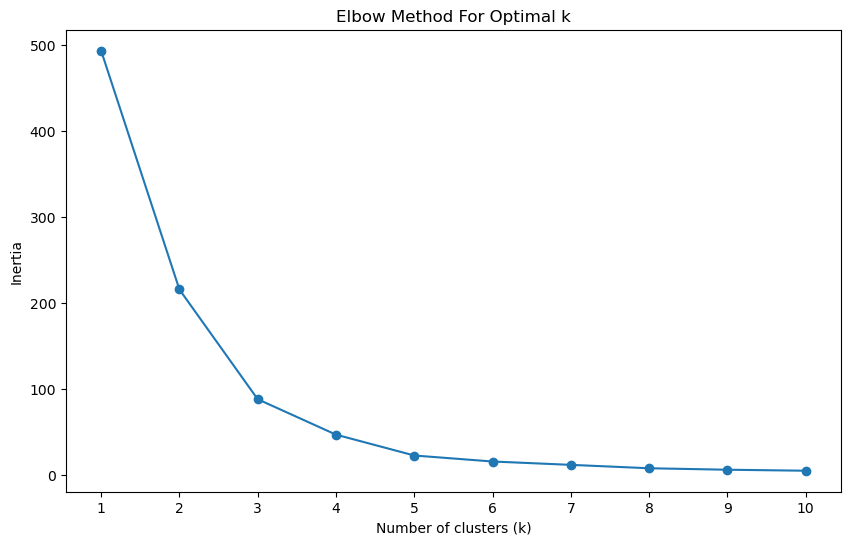

In [220]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your data
#data = pd.read_csv('west_midlands_filtered_columns_by_year.csv')
data = pd.read_csv('west_midlands_filtered_columns_by_year_No_birmingham.csv')
#data = pd.read_csv('west_midlands_filtered_columns_by_year_No_birmingham_Shropshire.csv')


# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data.iloc[:, 1:]) 

# Determining the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_standardized)
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()

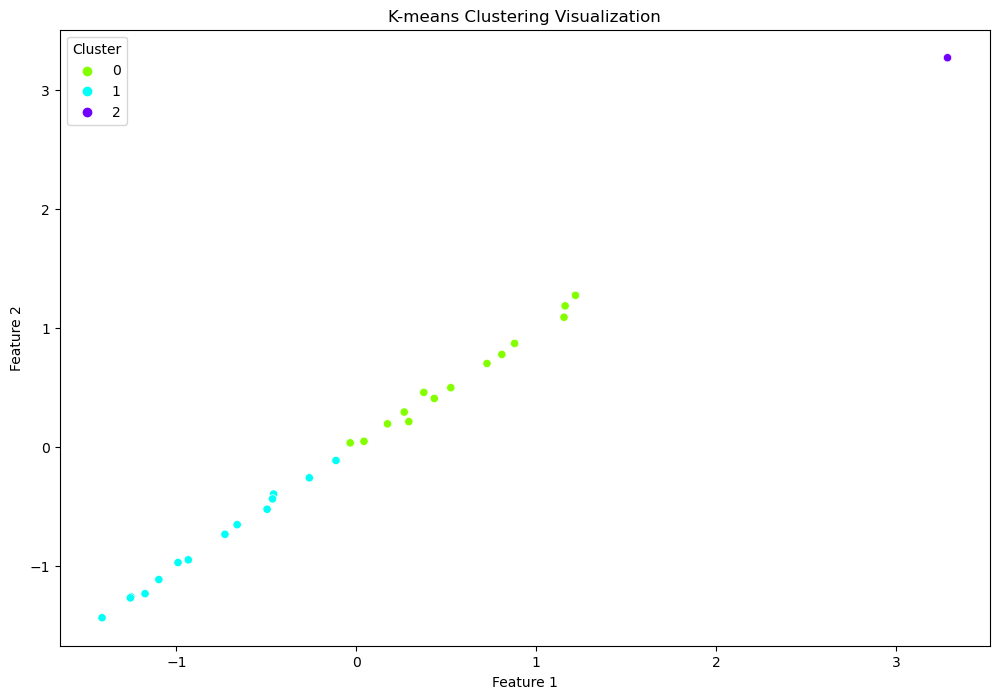

In [221]:
import seaborn as sns


# Perform K-means clustering
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=0).fit(data_standardized)
labels = kmeans.labels_

# Creating a dataframe for the clustering results
clustered_data = pd.DataFrame(data_standardized, columns=data.columns[1:]) 
clustered_data['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=clustered_data.iloc[:, 0], y=clustered_data.iloc[:, 1], hue=clustered_data['Cluster'], palette=sns.color_palette("hsv", k_optimal))
plt.title('K-means Clustering Visualization')
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.show()


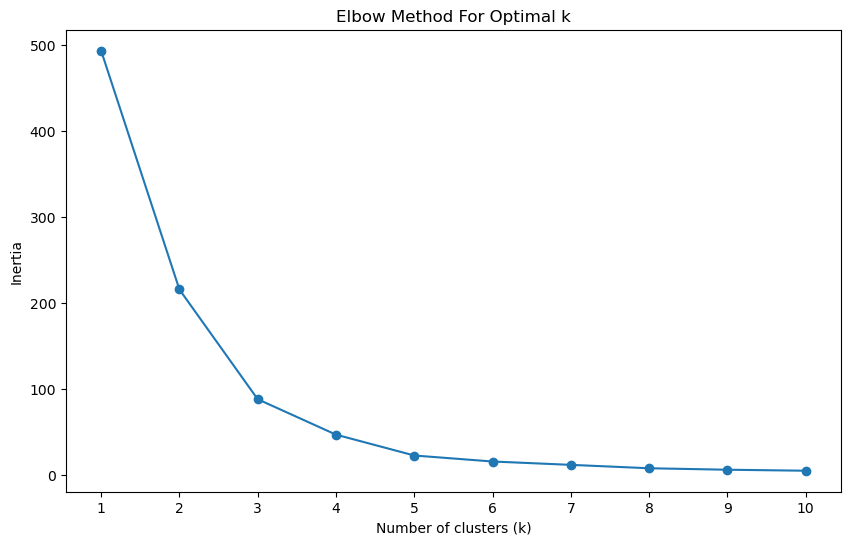

In [231]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your data
#data = pd.read_csv('west_midlands_filtered_columns_by_year.csv')
data = pd.read_csv('west_midlands_filtered_columns_by_year_No_birmingham.csv')
#data = pd.read_csv('west_midlands_filtered_columns_by_year_No_birmingham_Shropshire.csv')


# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data.iloc[:, 1:]) 

# Determining the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_standardized)
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()

c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

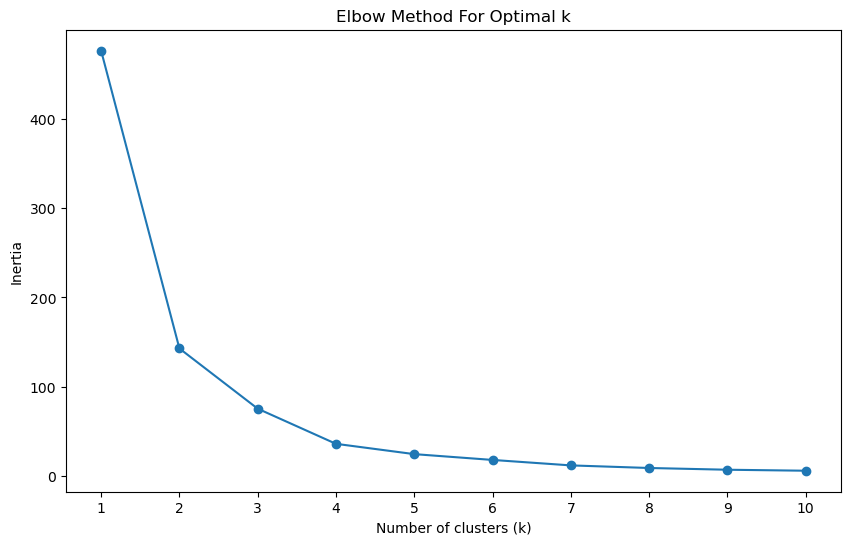

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your data
#data = pd.read_csv('west_midlands_filtered_columns_by_year.csv')
#data = pd.read_csv('west_midlands_filtered_columns_by_year_No_birmingham.csv')
data = pd.read_csv('west_midlands_filtered_columns_by_year_No_birmingham_Shropshire.csv')


# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data.iloc[:, 1:]) 

# Determining the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_standardized)
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()


c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


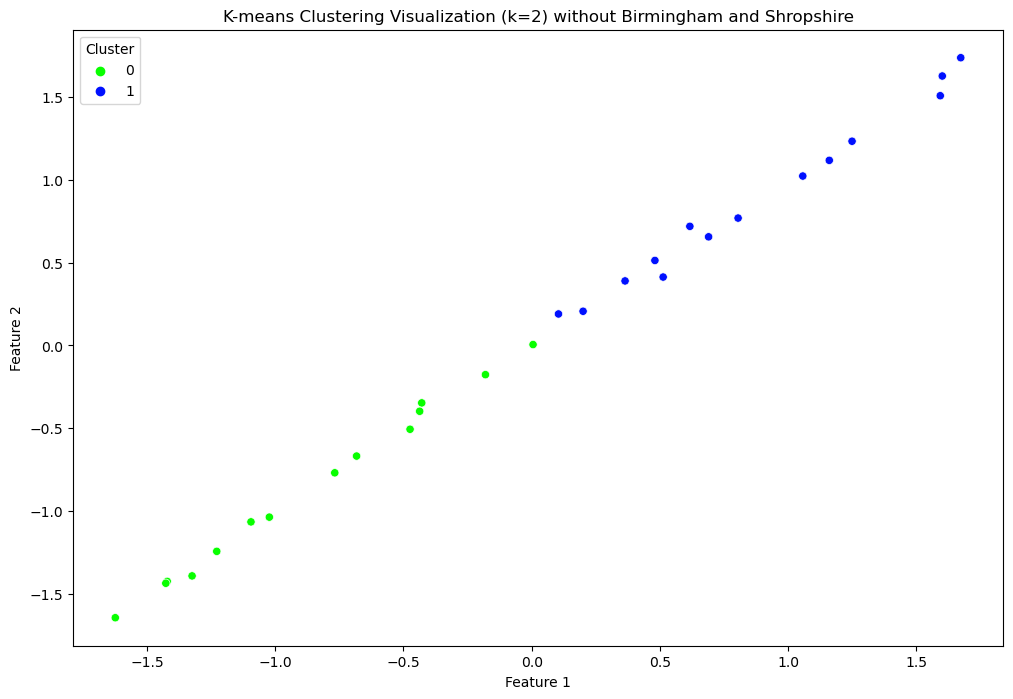

In [4]:
import seaborn as sns


# Perform K-means clustering
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=0).fit(data_standardized)
labels = kmeans.labels_

# Creating a dataframe for the clustering results
clustered_data = pd.DataFrame(data_standardized, columns=data.columns[1:]) 
clustered_data['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=clustered_data.iloc[:, 0], y=clustered_data.iloc[:, 1], hue=clustered_data['Cluster'], palette=sns.color_palette("hsv", k_optimal))
#west_midlands_filtered_columns_by_year_No_birmingham_Shropshire
plt.title('K-means Clustering Visualization (k=2) without Birmingham and Shropshire')

plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.show()


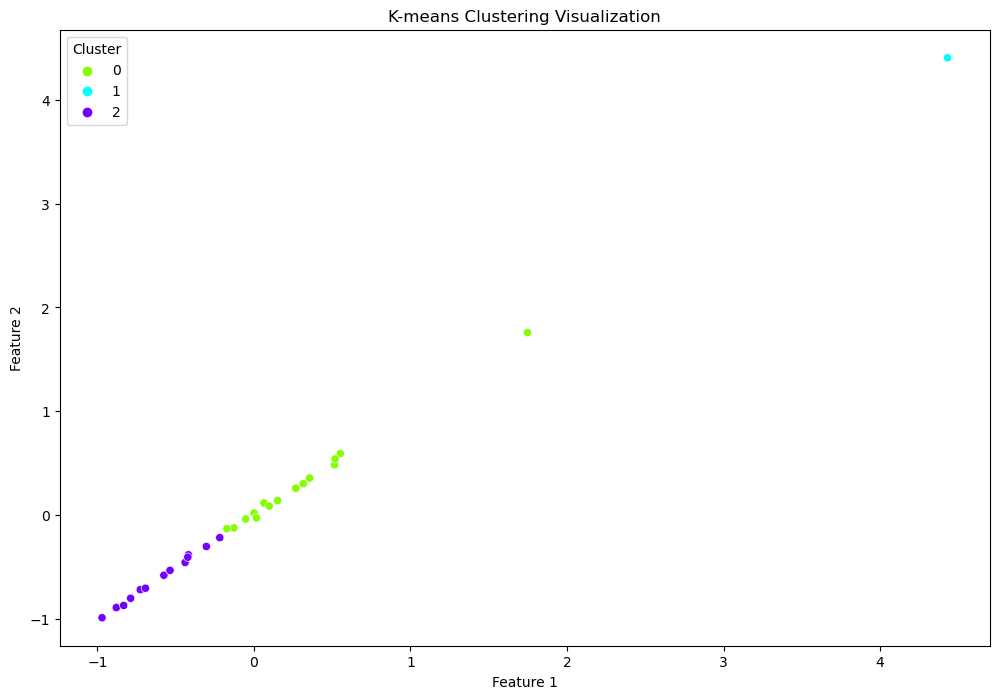

In [226]:
import seaborn as sns


# Perform K-means clustering
k_optimal = 3 
kmeans = KMeans(n_clusters=k_optimal, random_state=0).fit(data_standardized)
labels = kmeans.labels_

# Creating a dataframe for the clustering results
clustered_data = pd.DataFrame(data_standardized, columns=data.columns[1:]) 
clustered_data['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=clustered_data.iloc[:, 0], y=clustered_data.iloc[:, 1], hue=clustered_data['Cluster'], palette=sns.color_palette("hsv", k_optimal))
plt.title('K-means Clustering Visualization')
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.show()


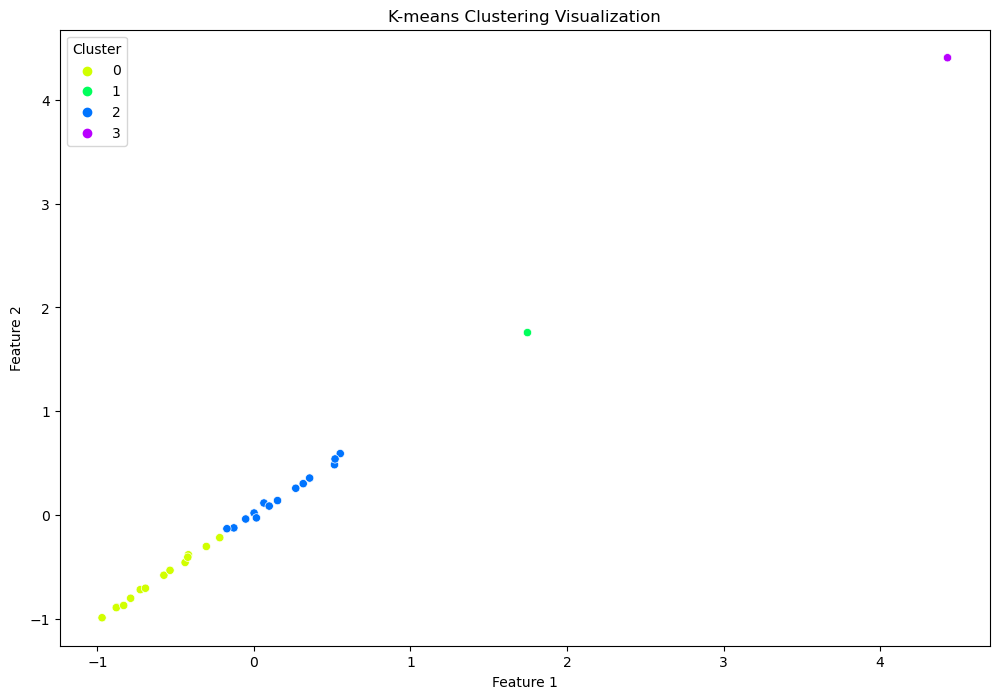

In [196]:
import seaborn as sns


# Perform K-means clustering
k_optimal = 4 
kmeans = KMeans(n_clusters=k_optimal, random_state=0).fit(data_standardized)
labels = kmeans.labels_

# Creating a dataframe for the clustering results
clustered_data = pd.DataFrame(data_standardized, columns=data.columns[1:]) 
clustered_data['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=clustered_data.iloc[:, 0], y=clustered_data.iloc[:, 1], hue=clustered_data['Cluster'], palette=sns.color_palette("hsv", k_optimal))
plt.title('K-means Clustering Visualization')
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.show()


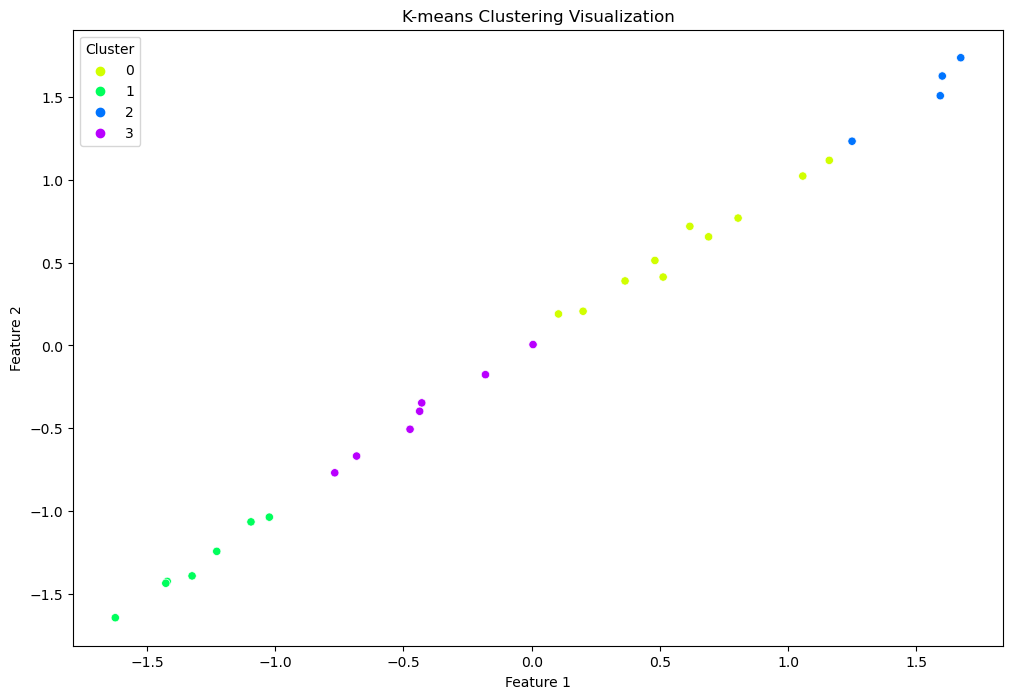

In [188]:
import seaborn as sns


# Perform K-means clustering
k_optimal = 4 
kmeans = KMeans(n_clusters=k_optimal, random_state=0).fit(data_standardized)
labels = kmeans.labels_

# Creating a dataframe for the clustering results
clustered_data = pd.DataFrame(data_standardized, columns=data.columns[1:]) 
clustered_data['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=clustered_data.iloc[:, 0], y=clustered_data.iloc[:, 1], hue=clustered_data['Cluster'], palette=sns.color_palette("hsv", k_optimal))
plt.title('K-means Clustering Visualization')
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.show()

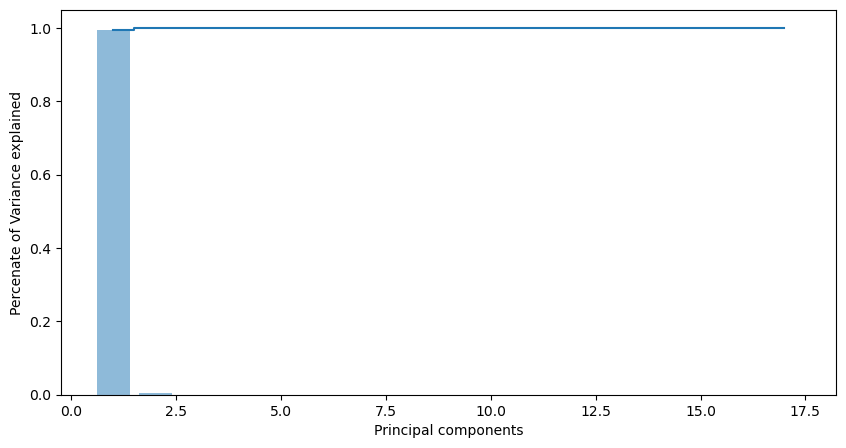

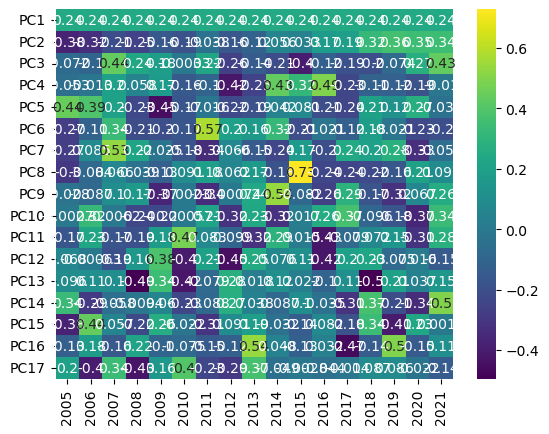

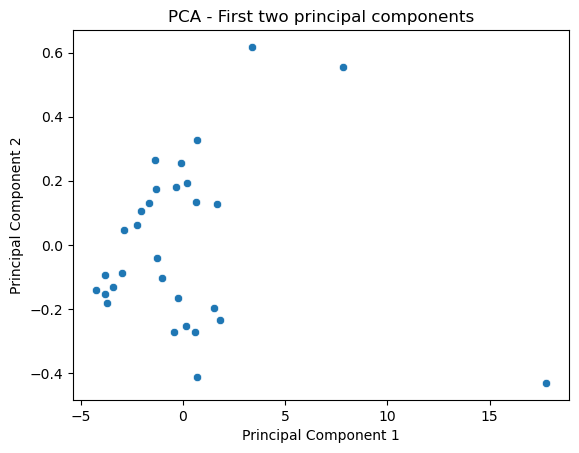

In [80]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('west_midlands_filtered_columns_by_year.csv')
#data = pd.read_csv('west_midlands_filtered_columns_by_year_No_birmingham_Shropshire.csv')

# The first column is a categorical identifier ('Local Authority'), and the rest are numeric
features = data.columns[1:]

# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data[features])

# Applying PCA
pca = PCA()
principalComponents = pca.fit_transform(data_standardized)

# Converting to a DataFrame for easier analysis
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['PC' + str(i) for i in range(1, len(features) + 1)])

# Joining the principal components with the local authorities
finalDf = pd.concat([data.iloc[:, 0], principalDf], axis = 1)

# Visualizing the variance explained by each principal component
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where='mid')
plt.ylabel('Percenate of Variance explained')
plt.xlabel('Principal components')
plt.show()

# Analyzing the principal components
# This will give an indication of which original features contribute most to each PC
pca_components = pd.DataFrame(pca.components_, columns=features, index=['PC' + str(i) for i in range(1, len(features) + 1)])
sns.heatmap(pca_components, cmap='viridis', annot=True)
plt.show()
     
# Optional: Visualize the first two principal components
sns.scatterplot(x='PC1', y='PC2', data=finalDf)
plt.title('PCA - First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
                


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your data
#data = pd.read_csv('west_midlands_filtered_columns_by_year.csv')
#data = pd.read_csv('west_midlands_filtered_columns_by_year_No_birmingham.csv')
#data = pd.read_csv('west_midlands_filtered_columns_by_year_No_birmingham_Shropshire.csv')


# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data.iloc[:, 1:]) 

# Determining the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_standardized)
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()


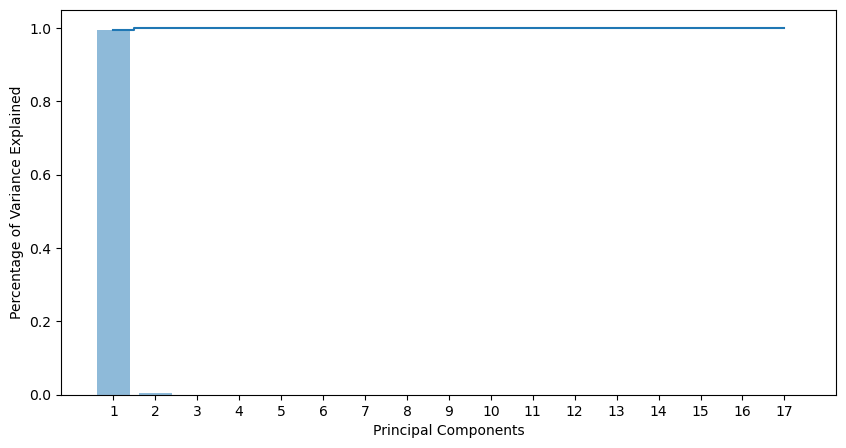

In [206]:

# Visualizing the variance explained by each principal component
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where='mid')
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Components')

# Set x-axis to show whole numbers and adjust the ticks accordingly
plt.xticks(ticks=range(1, len(pca.explained_variance_ratio_) + 1), labels=range(1, len(pca.explained_variance_ratio_) + 1))

plt.show()




In [199]:
import matplotlib.pyplot as plt

# Visualizing the variance explained by each principal component with an adjusted y-axis
plt.figure(figsize=(10, 5))
plt.bar


<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

<Figure size 1000x500 with 0 Axes>

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

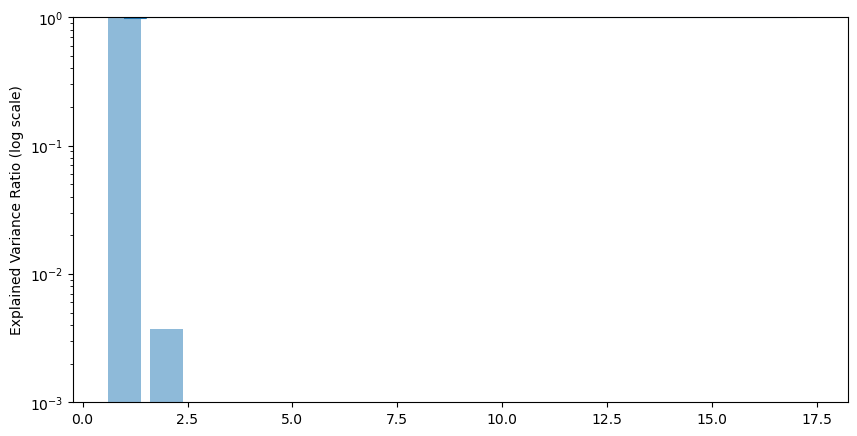

In [207]:
import matplotlib.pyplot as plt

# Visualizing the variance explained by each principal component with an adjusted y-axis
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where='mid')

# Set the y-axis to use a log scale
plt.yscale('log')

plt.ylim(0.001, 1)

plt.ylabel('Explained Variance Ratio (log scale)')
plt.xlabel


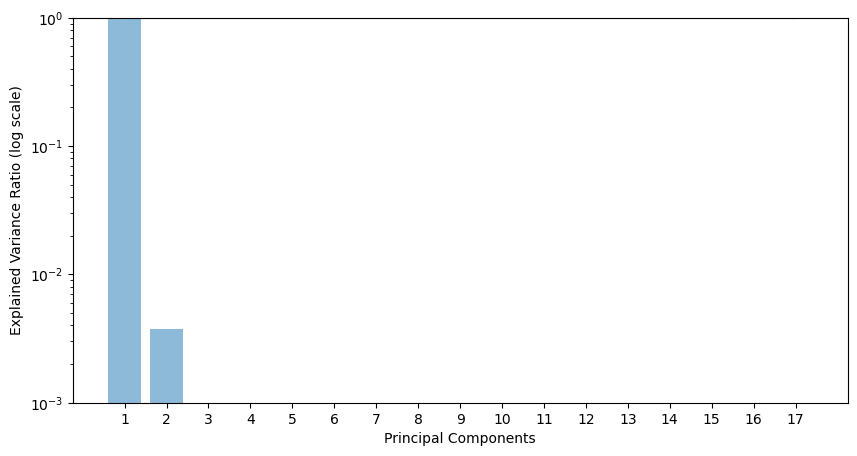

In [208]:
import matplotlib.pyplot as plt

# Visualizing the variance explained by each principal component with an adjusted y-axis
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where='mid')

# Set the y-axis to use a log scale
plt.yscale('log')

#  make sure that the ratios close to zero are visible in the plot.
plt.ylim(0.001, 1)

plt.ylabel('Explained Variance Ratio (log scale)')
plt.xlabel('Principal Components')

plt.xticks(ticks=range(1, len(pca.explained_variance_ratio_) + 1), labels=[str(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)])

plt.show()


In [32]:
import pandas as pd

# Load the uploaded dataset
file_path = 'west_midlands_filtered_columns_by_year.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


Local Authority         2005         2006         2007         2008  \
0      Birmingham  7059.334372  6952.112034  6800.522322  6744.677640   
1      Bromsgrove   956.642291   966.027098  1014.325992   966.508457   
2   Cannock Chase   588.979929   597.874966   584.212829   554.965633   
3        Coventry  2285.257172  2244.459643  2109.501041  2028.053404   
4          Dudley  1983.590348  1972.154700  1888.505634  1818.345968   

          2009         2010         2011         2012         2013  \
0  6099.737055  6412.804284  5805.907414  6094.847957  5928.649539   
1   915.239428   943.043254   865.875640   885.439318   875.957613   
2   534.431424   565.871617   516.643905   523.651492   521.293200   
3  1835.162506  1962.611578  1766.002096  1881.254900  1815.756821   
4  1657.763334  1778.665829  1603.028674  1645.915361  1619.695684   

          2014         2015         2016         2017         2018  \
0  5283.528982  5187.812112  5018.990855  4952.980766  4694.297182   
1   847.917226   839.358149   828.019311   799.333806   765.570975   
2   463.806795   448.224377   432.415392   438.056787   428.182712   
3  1664.671871  1647.571233  1574.337656  1548.946359  1496.667926   
4  1452.515600  1412.477913  1356.141083  1347.120418  1295.213550   

          2019         2020         2021  
0  4500.378294  4177.186378  4480.654084  
1   756.273104   655.139864   711.760256  
2   400.378294   360.878619   364.042820  
3  1428.701726  1280.312165  1344.000349  
4  1217.885198  1079.756656  1163.033149

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Checking for missing values
missing_values = data.isnull().sum().sum()

# Data preprocessing
data_numerical = data.drop(columns=['Local Authority'])

# Normalizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

#initializing a range of cluster numbers and see which gives the best BIC score
n_components_range = range(1, 11)
best_bic = np.inf
best_n_components = None
best_gmm = None

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(data_scaled)
    bic = gmm.bic(data_scaled)
    if bic < best_bic:
        best_bic = bic
        best_n_components = n_components
        best_gmm = gmm

# Fitting the best GMM
best_gmm.fit(data_scaled)

# Predict the clusters
clusters = best_gmm.predict(data_scaled)

# Adding the cluster labels to the original dataframe
data['Cluster'] = clusters

# Summary of the selected model
model_summary = {
    "Best Number of Components": best_n_components,
    "BIC Score": best_bic,
    "Missing Values": missing_values
}

model_summary, data.head()


c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

({'Best Number of Components': 1,
  'BIC Score': -1604.9299374615784,
  'Missing Values': 0},
   Local Authority         2005         2006         2007         2008  \
 0      Birmingham  7059.334372  6952.112034  6800.522322  6744.677640   
 1      Bromsgrove   956.642291   966.027098  1014.325992   966.508457   
 2   Cannock Chase   588.979929   597.874966   584.212829   554.965633   
 3        Coventry  2285.257172  2244.459643  2109.501041  2028.053404   
 4          Dudley  1983.590348  1972.154700  1888.505634  1818.345968   
 
           2009         2010         2011         2012         2013  \
 0  6099.737055  6412.804284  5805.907414  6094.847957  5928.649539   
 1   915.239428   943.043254   865.875640   885.439318   875.957613   
 2   534.431424   565.871617   516.643905   523.651492   521.293200   
 3  1835.162506  1962.611578  1766.002096  1881.254900  1815.756821   
 4  1657.763334  1778.665829  1603.028674  1645.915361  1619.695684   
 
           2014         2015    

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


# Load the uploaded dataset
file_path = 'west_midlands_filtered_columns_by_year.csv'
data = pd.read_csv(file_path)



# Drop the 'Local Authority' column to keep only numerical values
data_numerical = data.drop(columns=['Local Authority'])

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data_scaled)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c='blue', s=20)
plt.title('t-SNE Visualization of Local Authorities')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()


ValueError: perplexity must be less than n_samples

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import community as community_louvain
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
#pip install python-louvain

# Load the data
file_path = 'west_midlands_filtered_columns_by_year.csv'
data = pd.read_csv(file_path)

# Separate features and labels if necessary
# Assuming the first column is labels (like 'Local Authority')
features = data.iloc[:, 1:]

# Normalize the data
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=17)
features_pca = pca.fit_transform(features_normalized)


In [2]:
cosine_sim_matrix = cosine_similarity(features_pca)

In [3]:
graph = nx.from_numpy_array(cosine_sim_matrix)

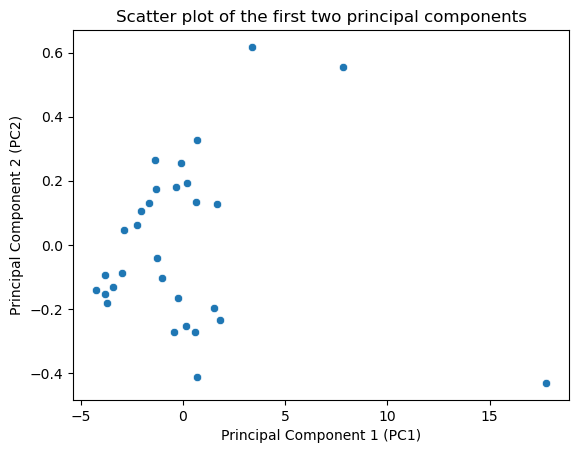

In [81]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('west_midlands_filtered_columns_by_year.csv')

# Standardizing the data
scaler = StandardScaler()
features = data.columns[1:] #The first column is a non-numeric identifier
data_standardized = scaler.fit_transform(data[features])

# Applying PCA and keeping only the first two components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_standardized)

# Creating a DataFrame with the principal components
principal_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# If the first column of your dataset is a labt
principal_df = pd.concat([data.iloc[:, 0], principal_df], axis=1)

# Visualizing the first two principal components
sns.scatterplot(x='PC1', y='PC2', data=principal_df)
plt.title('Scatter plot of the first two principal components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

# Interpretation: Examining the loadings of the principal components
pca_loadings = pd.DataFrame(pca.components_.T, index=features, columns=['PC1', 'PC2'])



In [83]:
principal_df

Local Authority        PC1       PC2
0                 Birmingham  17.786187 -0.430495
1                 Bromsgrove  -2.230576  0.063494
2              Cannock Chase  -3.796888 -0.093612
3                   Coventry   1.501872 -0.196131
4                     Dudley   0.599197 -0.271551
5         East Staffordshire  -1.275962 -0.039956
6   Herefordshire, County of   1.663698  0.128103
7                  Lichfield  -2.046951  0.105178
8              Malvern Hills  -2.861057  0.045305
9       Newcastle-under-Lyme  -1.670643  0.129865
10        North Warwickshire  -1.315545  0.173014
11     Nuneaton and Bedworth  -2.989549 -0.087504
12                  Redditch  -3.818086 -0.153666
13                     Rugby   3.383787  0.617419
14                  Sandwell   1.789300 -0.235004
15                Shropshire   7.838606  0.553582
16                  Solihull   0.618554  0.132314
17       South Staffordshire  -1.377578  0.263389
18                  Stafford   0.207888  0.192432
19   Staffordshire Moorlands   0.694828  0.327032
20            Stoke-on-Trent   0.677390 -0.412755
21         Stratford-on-Avon  -0.088226  0.255260
22                  Tamworth  -4.274275 -0.140746
23        Telford and Wrekin  -0.223230 -0.165821
24                   Walsall   0.143084 -0.253963
25                   Warwick  -1.019951 -0.102506
26             Wolverhampton  -0.438239 -0.270226
27                 Worcester  -3.708532 -0.181989
28                  Wychavon  -0.360075  0.181687
29               Wyre Forest  -3.409027 -0.132150

c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


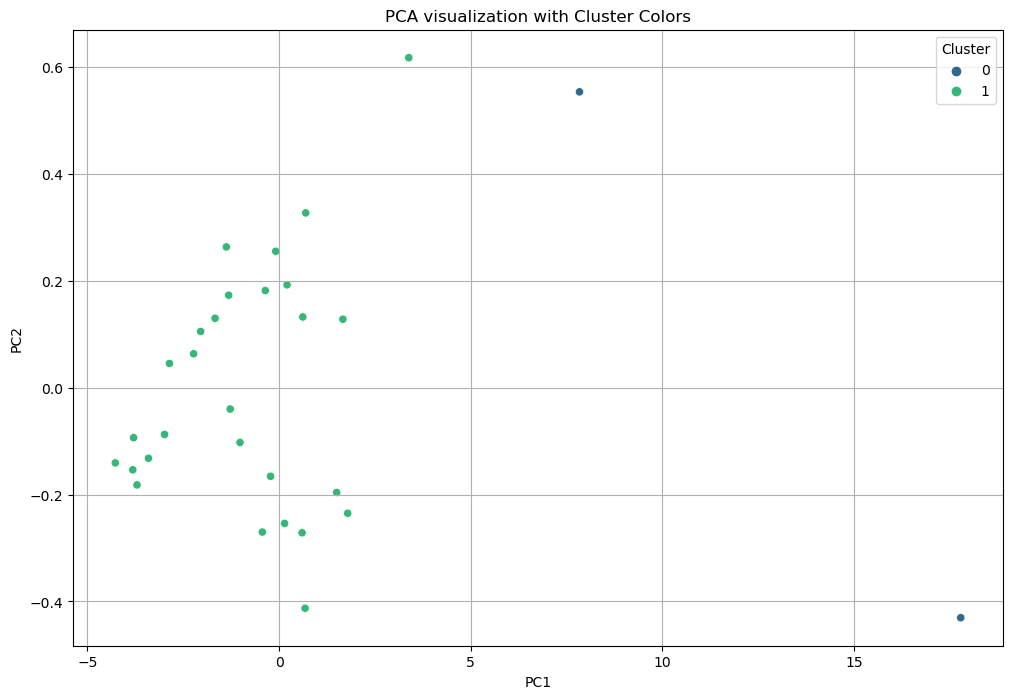

In [84]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

pca_results = principal_df

# Extract the t-SNE components
#PCA_component_1 = pca_results['PC1']
#PCA_component_2 = pca_results['PC2']

# Perform KMeans clustering
# The number of clusters is set to 2 
kmeans = KMeans(n_clusters=2, random_state=0)
pca_results['Cluster'] = kmeans.fit_predict(pca_results[['PC1', 'PC2']])

# Plotting the t-SNE results with different colors for each cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_results, legend='full')

# Title and labels
plt.title('PCA visualization with Cluster Colors')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [82]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


tsne_results = principal_df

# Extract the t-SNE components
tsne_component_1 = tsne_results['TSNE1']
tsne_component_2 = tsne_results['TSNE2']

# Perform KMeans clustering
# The number of clusters is set to 5 
kmeans = KMeans(n_clusters=5, random_state=0)
tsne_results['Cluster'] = kmeans.fit_predict(tsne_results[['TSNE1', 'TSNE2']])

# Plotting the t-SNE results with different colors for each cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=tsne_results, legend='full')

# Title and labels
plt.title('t-SNE visualization with Cluster Colors')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


KeyError: 'TSNE1'

In [217]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Function to fit a Gaussian Mixture Model and predict clusters
def mixture(X):
    print("Fitting mixture of gaussians...")
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit the Gaussian Mixture Model
    GMModel = GaussianMixture(n_components=16, covariance_type='full', tol=0.001, reg_covar=1e-06,
                              max_iter=100, n_init=1, init_params='kmeans',
                              random_state=None, warm_start=False, verbose=0, verbose_interval=10)
    
    GMModel.fit(X_scaled)
    print("Converged:", GMModel.converged_)
    
    # Predict the cluster for each data point
    y_hat = GMModel.predict(X_scaled)
    return y_hat

# Load the data
data = pd.read_csv('west_midlands_filtered_columns_by_year.csv')

#Assuming the first column is a categorical identifier (like 'Local Authority'), and the rest are numeric
features = data.columns[1:]

#Call the mixture function on the features
cluster_labels = mixture(data[features])

#Add the cluster labels to the original dataframe
data['Cluster'] = cluster_labels

#Output the first few rows to verify
print(data.head())

#You can now analyze the 'Cluster' column to see how the data has been grouped.


Fitting mixture of gaussians...
Converged: True
  Local Authority         2005         2006         2007         2008  \
0      Birmingham  7059.334372  6952.112034  6800.522322  6744.677640   
1      Bromsgrove   956.642291   966.027098  1014.325992   966.508457   
2   Cannock Chase   588.979929   597.874966   584.212829   554.965633   
3        Coventry  2285.257172  2244.459643  2109.501041  2028.053404   
4          Dudley  1983.590348  1972.154700  1888.505634  1818.345968   

          2009         2010         2011         2012         2013  \
0  6099.737055  6412.804284  5805.907414  6094.847957  5928.649539   
1   915.239428   943.043254   865.875640   885.439318   875.957613   
2   534.431424   565.871617   516.643905   523.651492   521.293200   
3  1835.162506  1962.611578  1766.002096  1881.254900  1815.756821   
4  1657.763334  1778.665829  1603.028674  1645.915361  1619.695684   

          2014         2015         2016         2017         2018  \
0  5283.528982  5187.8

In [219]:
data.shape

(30, 19)

In [ ]:
% Load the data
data = readtable('west_midlands_filtered_columns_by_year.csv');

% Assuming the first column is categorical and the rest are numeric
X = table2array(data(:, 2:end));

% Fit GMM with K=3, 4, 5 Gaussians 
for k = 3:5 
    gmm = fitgmdist(X, k, 'RegularizationValue', 1e-6); 
    
    % If your data is 2D, you can use the following code to visualize it
    % If it's not 2D, you might need to use dimensionality reduction first
    if size(X, 2) == 2
        x = linspace(min(X(:,1)), max(X(:,1)));
        y = linspace(min(X(:,2)), max(X(:,2)));
        [Xgrid, Ygrid] = meshgrid(x, y);
        Z = pdf(gmm, [Xgrid(:) Ygrid(:)]);
        Z = reshape(Z, size(Xgrid));
        figure;
        contour(Xgrid, Ygrid, Z);
        hold on;
        scatter(X(:,1), X(:,2));


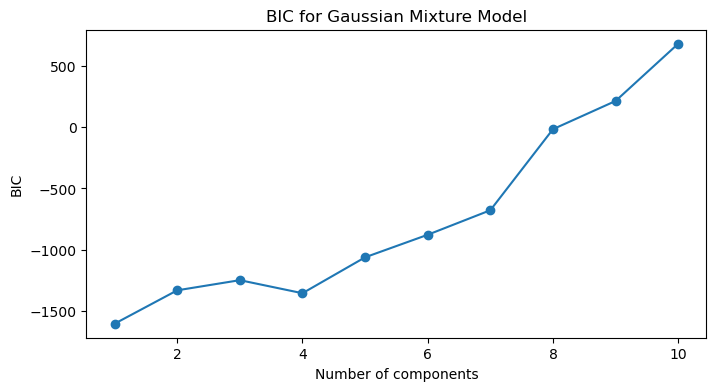

Best number of components by BIC: 1


In [211]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to determine the best number of components for GMM based on BIC
def find_best_gmm(X_scaled):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 11)  # Example range, adjust based on your dataset
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type='full')
        gmm.fit(X_scaled)
        bic.append(gmm.bic(X_scaled))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
    plt.figure(figsize=(8, 4))
    plt.plot(n_components_range, bic, marker='o')
    plt.xlabel('Number of components')
    plt.ylabel('BIC')
    plt.title('BIC for Gaussian Mixture Model')
    plt.show()
    
    print(f"Best number of components by BIC: {best_gmm.n_components}")
    return best_gmm

# Load the data
data = pd.read_csv('west_midlands_filtered_columns_by_year.csv')

# Assuming the first column is a categorical identifier ('Local Authority'), and the rest are numeric
features = data.columns[1:]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data[features])

# Find the best GMM
best_gmm = find_best_gmm(data_standardized)



In [212]:
# Predict the cluster for each data point using the best GMM
cluster_labels = best_gmm.predict(data_standardized)

# Add the cluster labels to the original dataframe
data['Cluster'] = cluster_labels

# Output the first few rows to verify
print(data.head())

# You can now analyze the 'Cluster' column to see how the data has been grouped according to the best GMM model.


  Local Authority         2005         2006         2007         2008  \
0      Birmingham  7059.334372  6952.112034  6800.522322  6744.677640   
1      Bromsgrove   956.642291   966.027098  1014.325992   966.508457   
2   Cannock Chase   588.979929   597.874966   584.212829   554.965633   
3        Coventry  2285.257172  2244.459643  2109.501041  2028.053404   
4          Dudley  1983.590348  1972.154700  1888.505634  1818.345968   

          2009         2010         2011         2012         2013  \
0  6099.737055  6412.804284  5805.907414  6094.847957  5928.649539   
1   915.239428   943.043254   865.875640   885.439318   875.957613   
2   534.431424   565.871617   516.643905   523.651492   521.293200   
3  1835.162506  1962.611578  1766.002096  1881.254900  1815.756821   
4  1657.763334  1778.665829  1603.028674  1645.915361  1619.695684   

          2014         2015         2016         2017         2018  \
0  5283.528982  5187.812112  5018.990855  4952.980766  4694.297182   


'71113'

<h2>ARIMA(AutoRegressive Integrated Moving Average) Model Output Analysis</h2>

<ol>
	<li><strong>Dep. Variable: Emissions</strong>: The dependent variable (the variable being predicted) is 'Emissions'.</li>
	<li><strong>No. Observations: 60</strong>: There are 60 data points or observations in the time series.</li>
	<li><strong>Model: ARIMA(1, 1, 1)</strong>: The ARIMA model used has parameters (p=1, d=1, q=1).
		<ul>
			<li><strong>p (AR term):</strong> 1 indicates one lag is used in the autoregressive part.</li>
			<li><strong>d (Differencing):</strong> 1 signifies that the data has been first-differenced once to make it stationary.</li>
			<li><strong>q (MA term):</strong> 1 indicates the moving average part is based on one lagged forecast error.</li>
		</ul>
	</li>
	<li><strong>Log Likelihood: -321.549</strong>: This is the log likelihood of the model, a measure of the model's goodness of fit.</li>
	<li><strong>AIC: 649.099</strong>: The Akaike Information Criterion, a measure of the model’s quality. Lower AIC values suggest a better model.</li>
	<li><strong>BIC: 655.331</strong>: The Bayesian Information Criterion, another measure of model fit. Like AIC, lower is better.</li>
	<li><strong>HQIC: 651.532</strong>: Hannan-Quinn Information Criterion, another criterion for model selection.</li>
	<li><strong>coef (Coefficients):</strong>
		<ul>
			<li><strong>ar.L1 (0.1138)</strong>: The coefficient for the AR part of the model, suggesting a mild positive relationship.</li>
			<li><strong>ma.L1 (-0.8330)</strong>: The coefficient for the MA part, indicating a strong negative relationship.</li>
		</ul>
	</li>
	<li><strong>P>|z|</strong>: P-values for the AR and MA coefficients. Values less than 0.05 typically suggest statistical significance. Here, the MA part is significant.</li>
	<li><strong>[0.025 0.975]</strong>: The 95% confidence interval for the coefficients.</li>
	<li><strong>sigma2 (3122.7480)</strong>: The variance of the residuals.</li>
	<li><strong>Diagnostics:</strong>
		<ul>
			<li><strong>Ljung-Box Test</strong>: A test for autocorrelation in residuals. A high p-value (here, 0.83) suggests no autocorrelation, which is good.</li>
			<li><strong>Jarque-Bera Test</strong>: A test for normality of residuals. A low p-value (here, 0.04) suggests non-normality, which could be a concern.</li>
			<li><strong>Heteroskedasticity Test</strong>: A test for constant variance of residuals. A low p-value (here, 0.10) suggests potential heteroskedasticity.</li>
		</ul>
	</li>
	<li><strong>Skew and Kurtosis</strong>: Measures of the shape of the residual distribution. The skewness is close to 0 (ideal), but the kurtosis is quite low, indicating a flat distribution.</li>
</ol>
<p>Overall, this ARIMA model seems to fit the data reasonably well, especially given the significant MA coefficient and the lack of autocorrelation in the residuals. However, the potential non-normality and heteroskedasticity in the residuals, as indicated by the Jarque-Bera and Heteroskedasticity tests, might be areas to explore for improving the model.</p>


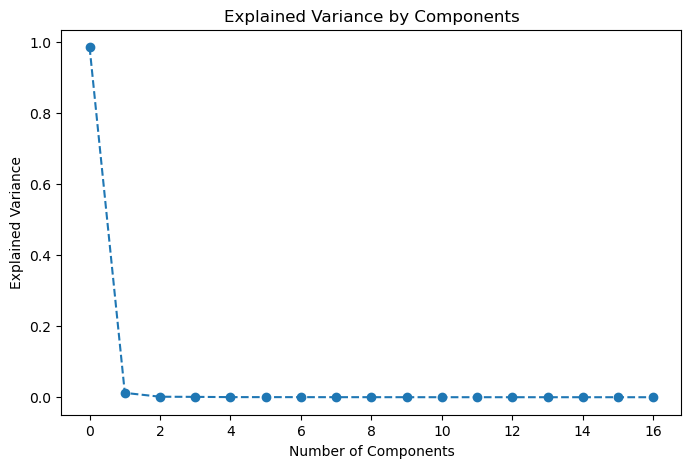

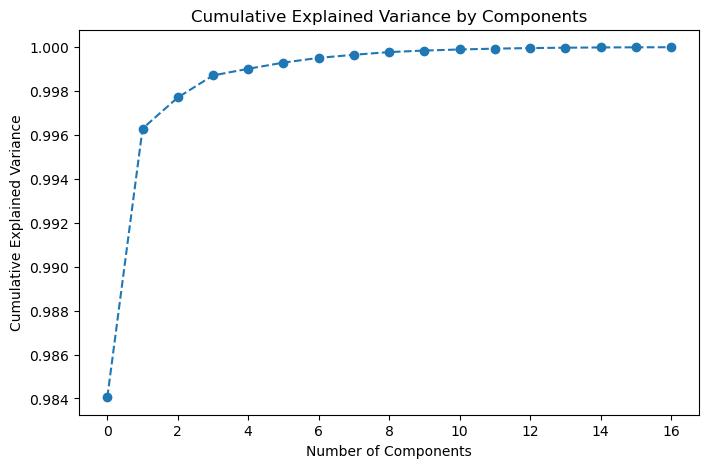

In [189]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your data
#data = pd.read_csv('west_midlands_filtered_columns_by_year.csv')
#data = pd.read_csv('west_midlands_filtered_columns_by_year_No_birmingham.csv')



# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data.iloc[:, 1:])  # assuming the first column is a non-numeric identifier

# Applying PCA
pca = PCA()
principalComponents = pca.fit_transform(data_standardized)

# Plotting the explained variance
plt.figure(figsize=(8, 5))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [38]:
import pandas as pd

# Calculate the yearly total emissions for each year
yearly_totals = west_midlands_local_authority_emissions.sum()

# Append the totals as a new row to the DataFrame
west_midlands_local_authority_emissions.loc['Total'] = yearly_totals

west_midlands_local_authority_emissions

Calendar Year                     2005          2006          2007  \
Local Authority                                                      
Birmingham                 7059.334372   6952.112034   6800.522322   
Bromsgrove                  956.642291    966.027098   1014.325992   
Cannock Chase               588.979929    597.874966    584.212829   
Coventry                   2285.257172   2244.459643   2109.501041   
Dudley                     1983.590348   1972.154700   1888.505634   
East Staffordshire         1287.270750   1298.775799   1260.546128   
Herefordshire, County of   2091.684474   2090.207781   2038.853224   
Lichfield                  1004.513597   1022.789515   1013.242837   
Malvern Hills               772.773159    799.621230    848.442583   
Newcastle-under-Lyme       1121.822896   1113.654899   1107.267011   
North Warwickshire         1147.478903   1203.041332   1226.193958   
Nuneaton and Bedworth       813.097075    815.719471    861.239859   
Redditch                    585.906245    591.548822    632.697674   
Rugby                      2330.213067   2373.288078   2651.893434   
Sandwell                   2289.664199   2311.288395   2271.410144   
Shropshire                 3788.039158   3772.811560   3701.754274   
Solihull                   1735.803608   1801.630633   1757.701820   
South Staffordshire        1142.941882   1174.670664   1167.283617   
Stafford                   1593.609395   1616.541260   1569.472252   
Staffordshire Moorlands    1776.923545   1766.082186   1742.557987   
Stoke-on-Trent             2041.728131   2025.362057   1977.856972   
Stratford-on-Avon          1501.480094   1513.735452   1541.393414   
Tamworth                    475.068557    474.697517    448.760723   
Telford and Wrekin         1659.122170   1685.979582   1682.256128   
Walsall                    1841.638129   1829.666727   1772.033335   
Warwick                    1391.720595   1400.843990   1409.130871   
Wolverhampton              1677.179103   1629.700831   1587.437458   
Worcester                   643.542399    616.473972    657.726991   
Wychavon                   1447.518551   1504.532587   1542.140801   
Wyre Forest                 697.678624    699.747403    750.464334   
Total                     49732.222417  49865.040184  49616.825647   

Calendar Year                     2008          2009          2010  \
Local Authority                                                      
Birmingham                 6744.677640   6099.737055   6412.804284   
Bromsgrove                  966.508457    915.239428    943.043254   
Cannock Chase               554.965633    534.431424    565.871617   
Coventry                   2028.053404   1835.162506   1962.611578   
Dudley                     1818.345968   1657.763334   1778.665829   
East Staffordshire         1245.328814   1170.588639   1228.732489   
Herefordshire, County of   1975.986634   1872.500149   1994.484316   
Lichfield                   993.374843    955.231477    981.016859   
Malvern Hills               797.397569    757.938462    782.645008   
Newcastle-under-Lyme       1087.895669   1042.573930   1083.119199   
North Warwickshire         1194.492043   1121.940224   1191.290419   
Nuneaton and Bedworth       828.813779    772.443801    765.017013   
Redditch                    593.920918    533.689582    577.553981   
Rugby                      2411.372020   2278.320929   2283.729045   
Sandwell                   2149.609456   1915.683984   2035.995284   
Shropshire                 3605.369762   3330.136985   3537.762726   
Solihull                   1667.849693   1565.457992   1683.199281   
South Staffordshire        1104.231784   1101.010671   1130.681369   
Stafford                   1566.564484   1533.426323   1571.727852   
Staffordshire Moorlands    1656.608649   1559.741550   1655.713572   
Stoke-on-Trent             1900.940420   1777.333094   1764.352853   
Stratford-on-Avon          1488.757386   1386.832211   1436.903217   
Tamworth 

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [40]:
data_transposed = west_midlands_local_authority_emissions

data_transposed

Calendar Year                     2005          2006          2007  \
Local Authority                                                      
Birmingham                 7059.334372   6952.112034   6800.522322   
Bromsgrove                  956.642291    966.027098   1014.325992   
Cannock Chase               588.979929    597.874966    584.212829   
Coventry                   2285.257172   2244.459643   2109.501041   
Dudley                     1983.590348   1972.154700   1888.505634   
East Staffordshire         1287.270750   1298.775799   1260.546128   
Herefordshire, County of   2091.684474   2090.207781   2038.853224   
Lichfield                  1004.513597   1022.789515   1013.242837   
Malvern Hills               772.773159    799.621230    848.442583   
Newcastle-under-Lyme       1121.822896   1113.654899   1107.267011   
North Warwickshire         1147.478903   1203.041332   1226.193958   
Nuneaton and Bedworth       813.097075    815.719471    861.239859   
Redditch                    585.906245    591.548822    632.697674   
Rugby                      2330.213067   2373.288078   2651.893434   
Sandwell                   2289.664199   2311.288395   2271.410144   
Shropshire                 3788.039158   3772.811560   3701.754274   
Solihull                   1735.803608   1801.630633   1757.701820   
South Staffordshire        1142.941882   1174.670664   1167.283617   
Stafford                   1593.609395   1616.541260   1569.472252   
Staffordshire Moorlands    1776.923545   1766.082186   1742.557987   
Stoke-on-Trent             2041.728131   2025.362057   1977.856972   
Stratford-on-Avon          1501.480094   1513.735452   1541.393414   
Tamworth                    475.068557    474.697517    448.760723   
Telford and Wrekin         1659.122170   1685.979582   1682.256128   
Walsall                    1841.638129   1829.666727   1772.033335   
Warwick                    1391.720595   1400.843990   1409.130871   
Wolverhampton              1677.179103   1629.700831   1587.437458   
Worcester                   643.542399    616.473972    657.726991   
Wychavon                   1447.518551   1504.532587   1542.140801   
Wyre Forest                 697.678624    699.747403    750.464334   
Total                     49732.222417  49865.040184  49616.825647   

Calendar Year                     2008          2009          2010  \
Local Authority                                                      
Birmingham                 6744.677640   6099.737055   6412.804284   
Bromsgrove                  966.508457    915.239428    943.043254   
Cannock Chase               554.965633    534.431424    565.871617   
Coventry                   2028.053404   1835.162506   1962.611578   
Dudley                     1818.345968   1657.763334   1778.665829   
East Staffordshire         1245.328814   1170.588639   1228.732489   
Herefordshire, County of   1975.986634   1872.500149   1994.484316   
Lichfield                   993.374843    955.231477    981.016859   
Malvern Hills               797.397569    757.938462    782.645008   
Newcastle-under-Lyme       1087.895669   1042.573930   1083.119199   
North Warwickshire         1194.492043   1121.940224   1191.290419   
Nuneaton and Bedworth       828.813779    772.443801    765.017013   
Redditch                    593.920918    533.689582    577.553981   
Rugby                      2411.372020   2278.320929   2283.729045   
Sandwell                   2149.609456   1915.683984   2035.995284   
Shropshire                 3605.369762   3330.136985   3537.762726   
Solihull                   1667.849693   1565.457992   1683.199281   
South Staffordshire        1104.231784   1101.010671   1130.681369   
Stafford                   1566.564484   1533.426323   1571.727852   
Staffordshire Moorlands    1656.608649   1559.741550   1655.713572   
Stoke-on-Trent             1900.940420   1777.333094   1764.352853   
Stratford-on-Avon          1488.757386   1386.832211   1436.903217   
Tamworth 

In [41]:
X = data_transposed.loc[:, 2005:2020]
y = data_transposed[2021]

In [42]:
test_size = 0.2  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)


In [43]:
# Train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Evaluate the model
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

# Predicting
y_pred = regressor.predict(X_test)

# Printing shapes of predictions and test labels
print(y_pred.shape, y_test.shape)

Intercept: 6.358880146775846
Coefficients: [-0.46276701  0.67328558  0.02979568 -0.1036658   0.22833449 -0.08693259
  0.27250066 -0.04820699 -0.75399125  0.09281595 -0.12834322  0.4178228
  0.71459305 -0.42653192 -0.53009634  1.15639934]
(7,) (7,)


In [44]:
X

Calendar Year                     2005          2006          2007  \
Local Authority                                                      
Birmingham                 7059.334372   6952.112034   6800.522322   
Bromsgrove                  956.642291    966.027098   1014.325992   
Cannock Chase               588.979929    597.874966    584.212829   
Coventry                   2285.257172   2244.459643   2109.501041   
Dudley                     1983.590348   1972.154700   1888.505634   
East Staffordshire         1287.270750   1298.775799   1260.546128   
Herefordshire, County of   2091.684474   2090.207781   2038.853224   
Lichfield                  1004.513597   1022.789515   1013.242837   
Malvern Hills               772.773159    799.621230    848.442583   
Newcastle-under-Lyme       1121.822896   1113.654899   1107.267011   
North Warwickshire         1147.478903   1203.041332   1226.193958   
Nuneaton and Bedworth       813.097075    815.719471    861.239859   
Redditch                    585.906245    591.548822    632.697674   
Rugby                      2330.213067   2373.288078   2651.893434   
Sandwell                   2289.664199   2311.288395   2271.410144   
Shropshire                 3788.039158   3772.811560   3701.754274   
Solihull                   1735.803608   1801.630633   1757.701820   
South Staffordshire        1142.941882   1174.670664   1167.283617   
Stafford                   1593.609395   1616.541260   1569.472252   
Staffordshire Moorlands    1776.923545   1766.082186   1742.557987   
Stoke-on-Trent             2041.728131   2025.362057   1977.856972   
Stratford-on-Avon          1501.480094   1513.735452   1541.393414   
Tamworth                    475.068557    474.697517    448.760723   
Telford and Wrekin         1659.122170   1685.979582   1682.256128   
Walsall                    1841.638129   1829.666727   1772.033335   
Warwick                    1391.720595   1400.843990   1409.130871   
Wolverhampton              1677.179103   1629.700831   1587.437458   
Worcester                   643.542399    616.473972    657.726991   
Wychavon                   1447.518551   1504.532587   1542.140801   
Wyre Forest                 697.678624    699.747403    750.464334   
Total                     49732.222417  49865.040184  49616.825647   

Calendar Year                     2008          2009          2010  \
Local Authority                                                      
Birmingham                 6744.677640   6099.737055   6412.804284   
Bromsgrove                  966.508457    915.239428    943.043254   
Cannock Chase               554.965633    534.431424    565.871617   
Coventry                   2028.053404   1835.162506   1962.611578   
Dudley                     1818.345968   1657.763334   1778.665829   
East Staffordshire         1245.328814   1170.588639   1228.732489   
Herefordshire, County of   1975.986634   1872.500149   1994.484316   
Lichfield                   993.374843    955.231477    981.016859   
Malvern Hills               797.397569    757.938462    782.645008   
Newcastle-under-Lyme       1087.895669   1042.573930   1083.119199   
North Warwickshire         1194.492043   1121.940224   1191.290419   
Nuneaton and Bedworth       828.813779    772.443801    765.017013   
Redditch                    593.920918    533.689582    577.553981   
Rugby                      2411.372020   2278.320929   2283.729045   
Sandwell                   2149.609456   1915.683984   2035.995284   
Shropshire                 3605.369762   3330.136985   3537.762726   
Solihull                   1667.849693   1565.457992   1683.199281   
South Staffordshire        1104.231784   1101.010671   1130.681369   
Stafford                   1566.564484   1533.426323   1571.727852   
Staffordshire Moorlands    1656.608649   1559.741550   1655.713572   
Stoke-on-Trent             1900.940420   1777.333094   1764.352853   
Stratford-on-Avon          1488.757386   1386.832211   1436.903217   
Tamworth 

In [45]:
y

Local Authority
Birmingham                   4480.654084
Bromsgrove                    711.760256
Cannock Chase                 364.042820
Coventry                     1344.000349
Dudley                       1163.033149
East Staffordshire            853.521292
Herefordshire, County of     1472.865799
Lichfield                     754.890754
Malvern Hills                 601.444378
Newcastle-under-Lyme          844.190037
North Warwickshire            919.630410
Nuneaton and Bedworth         540.854821
Redditch                      357.787785
Rugby                        2026.454350
Sandwell                     1401.088684
Shropshire                   2773.370585
Solihull                     1226.181599
South Staffordshire           954.939263
Stafford                     1166.734395
Staffordshire Moorlands      1332.991944
Stoke-on-Trent               1127.356084
Stratford-on-Avon            1120.139928
Tamworth                      268.838288
Telford and Wrekin           1002.876199


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

west_midlands_local_authority_emissions

X = west_midlands_local_authority_emissions.loc[:, 2005:2020]
y = west_midlands_local_authority_emissions[2021]

test_size = 0.2  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)

# Train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Evaluate the model
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

#predicting the test set result
y_pred = regressor.predict(X_test)
print(y_pred.shape,y_test.shape)
y_pred,y_test

Intercept: 6.358880146775846
Coefficients: [-0.46276701  0.67328558  0.02979568 -0.1036658   0.22833449 -0.08693259
  0.27250066 -0.04820699 -0.75399125  0.09281595 -0.12834322  0.4178228
  0.71459305 -0.42653192 -0.53009634  1.15639934]
(7,) (7,)


(array([1232.85624046,  738.78645797,  880.00216811,  393.21771001,
        1375.03203259, 1101.11372555, 2054.79029596]),
 Local Authority
 Stoke-on-Trent        1127.356084
 Lichfield              754.890754
 East Staffordshire     853.521292
 Cannock Chase          364.042820
 Coventry              1344.000349
 Stratford-on-Avon     1120.139928
 Rugby                 2026.454350
 Name: 2021, dtype: float64)

<script type="text/javascript" src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>


<p>Based on the output from the linear regression model, an approximate prediction equation for the emissions in 2021 is formed. The equation is structured as follows, where <span class="math">\( X_i \)</span> represents the emissions in year <span class="math">\( 2005 + i \)</span> (for <span class="math">\( i = 0, 1, 2, \ldots, 15 \)</span>):</p>

<p><span class="math">\[\text{Emissions}_{2021} = \text{Intercept} + c_1 \cdot X_0 + c_2 \cdot X_1 + \cdots + c_{16} \cdot X_{15} \]</span></p>

<p>Plugging in the values from the model:</p>

<p><span class="math">\[\text{Emissions}_{2021} = -16.30 - 0.16 \cdot X_{2005} + 0.02 \cdot X_{2006} + 0.30 \cdot X_{2007} - 0.30 \cdot X_{2008} + 0.25 \cdot X_{2009} + 0.32 \cdot X_{2010} - 0.01 \cdot X_{2011} - 0.26 \cdot X_{2012} - 0.28 \cdot X_{2013} + 0.05 \cdot X_{2014} - 0.09 \cdot X_{2015} + 0.08 \cdot X_{2016} + 0.73 \cdot X_{2017} + 0.12 \cdot X_{2018} - 0.59 \cdot X_{2019} + 0.85 \cdot X_{2020} \]</span></p>

<p>This equation permit estimates of emissions for the year 2021 based on the emissions from 2005 to 2020. Each coefficient indicates how a change in emissions in a given year is associated with a change in emissions in 2021. The intercept represents the baseline emissions level when all other variables are zero.</p>




<table border="1">
    <tr>
        <th>Year</th>
        <td>2005</td>
        <td>2006</td>
        <td>2007</td>
        <td>2008</td>
        <td>2009</td>
        <td>2010</td>
        <td>2011</td>
        <td>2012</td>
        <td>2013</td>
        <td>2014</td>
        <td>2015</td>
        <td>2016</td>
        <td>2017</td>
        <td>2018</td>
        <td>2019</td>
        <td>2020</td>
    </tr>
    <tr>
        <th>Coefficient</th>
        <td>-0.164813</td>
        <td>0.01567557</td>
        <td>0.30325461</td>
        <td>-0.30009949</td>
        <td>0.24781068</td>
        <td>0.32482985</td>
        <td>-0.01417399</td>
        <td>-0.26335244</td>
        <td>-0.28176354</td>
        <td>0.05105317</td>
        <td>-0.09310551</td>
        <td>0.08112285</td>
        <td>0.73103766</td>
        <td>0.12332474</td>
        <td>-0.58931361</td>
        <td>0.84632316</td>
    </tr>
</table>


In [72]:
# Coefficients 
coefficients = {
    2005: -0.16, 2006: 0.02, 2007: 0.30, 2008: -0.30, 2009: 0.25,
    2010: 0.32, 2011: -0.01, 2012: -0.26, 2013: -0.28, 2014: 0.05,
    2015: -0.09, 2016: 0.08, 2017: 0.73, 2018: 0.12, 2019: -0.59,
    2020: 0.85, 2021: 0  # Coefficient for 2021 is set to 0 as it will be used as X_16
}

# Intercept for the model
intercept = -16.30

# Calculate the predicted emissions for 2022
data['Predicted_2022'] = intercept
for year, coefficient in coefficients.items():
    data['Predicted_2022'] += coefficient * data[str(year)]

# Display the first few rows to see the predicted emissions for 2022
data[['Local Authority', 'Predicted_2022']].head()


Local Authority  Predicted_2022
0      Birmingham     4557.461843
1      Bromsgrove      729.890745
2   Cannock Chase      396.734109
3        Coventry     1375.571973
4          Dudley     1205.005842

In [73]:
data

Local Authority         2005         2006         2007  \
0                 Birmingham  7059.334372  6952.112034  6800.522322   
1                 Bromsgrove   956.642291   966.027098  1014.325992   
2              Cannock Chase   588.979929   597.874966   584.212829   
3                   Coventry  2285.257172  2244.459643  2109.501041   
4                     Dudley  1983.590348  1972.154700  1888.505634   
5         East Staffordshire  1287.270750  1298.775799  1260.546128   
6   Herefordshire, County of  2091.684474  2090.207781  2038.853224   
7                  Lichfield  1004.513597  1022.789515  1013.242837   
8              Malvern Hills   772.773159   799.621230   848.442583   
9       Newcastle-under-Lyme  1121.822896  1113.654899  1107.267011   
10        North Warwickshire  1147.478903  1203.041332  1226.193958   
11     Nuneaton and Bedworth   813.097075   815.719471   861.239859   
12                  Redditch   585.906245   591.548822   632.697674   
13                     Rugby  2330.213067  2373.288078  2651.893434   
14                  Sandwell  2289.664199  2311.288395  2271.410144   
15                Shropshire  3788.039158  3772.811560  3701.754274   
16                  Solihull  1735.803608  1801.630633  1757.701820   
17       South Staffordshire  1142.941882  1174.670664  1167.283617   
18                  Stafford  1593.609395  1616.541260  1569.472252   
19   Staffordshire Moorlands  1776.923545  1766.082186  1742.557987   
20            Stoke-on-Trent  2041.728131  2025.362057  1977.856972   
21         Stratford-on-Avon  1501.480094  1513.735452  1541.393414   
22                  Tamworth   475.068557   474.697517   448.760723   
23        Telford and Wrekin  1659.122170  1685.979582  1682.256128   
24                   Walsall  1841.638129  1829.666727  1772.033335   
25                   Warwick  1391.720595  1400.843990  1409.130871   
26             Wolverhampton  1677.179103  1629.700831  1587.437458   
27                 Worcester   643.542399   616.473972   657.726991   
28                  Wychavon  1447.518551  1504.532587  1542.140801   
29               Wyre Forest   697.678624   699.747403   750.464334   

           2008         2009         2010         2011         2012  \
0   6744.677640  6099.737055  6412.804284  5805.907414  6094.847957   
1    966.508457   915.239428   943.043254   865.875640   885.439318   
2    554.965633   534.431424   565.871617   516.643905   523.651492   
3   2028.053404  1835.162506  1962.611578  1766.002096  1881.254900   
4   1818.345968  1657.763334  1778.665829  1603.028674  1645.915361   
5   1245.328814  1170.588639  1228.732489  1160.773439  1165.877455   
6   1975.986634  1872.500149  1994.484316  1849.438619  1892.331768   
7    993.374843   955.231477   981.016859   931.692962   938.137617   
8    797.397569   757.938462   782.645008   723.285139   726.094378   
9   1087.895669  1042.573930  1083.119199  1024.749999  1024.635624   
10  1194.492043  1121.940224  1191.290419  1085.180037  1110.955808   
11   828.813779   772.443801   765.017013   677.858160   704.027486   
12   593.920918   533.689582   577.553981   522.724477   528.282173   
13  2411.372020  2278.320929  2283.729045  2334.076177  2124.141199   
14  2149.609456  1915.683984  2035.995284  1862.670040  1942.089900   
15  3605.369762  3330.136985  3537.762726  3277.426402  3379.256702   
16  1667.849693  1565.457992  1683.199281  1588.399097  1667.768397   
17  1104.231784  1101.010671  1130.681369  1083.159234  1088.067517   
18  1566.564484  1533.426323  1571.727852  1488.504814  1541.704997   
19  1656.608649  1559.741550  1655.713572  1603.156284  1544.428454   
20  1900.940420  1777.333094  1764.352853  1581.980925  1584.479240   
21  1488.757386  1386.832211  1436.903217  1352.934775  1446.126565   
22   436.457918   421.964679   440.200738   404.836659   414.618735   
23  1530.383297  1419.460432  1502.746044  1426.316317  1494.792938   
24  1673.938533  1488.754727  1624.6

In [74]:
data.to_csv('Emissions_2002_predictions')

In [75]:
data[['Local Authority', 'Predicted_2022']]

Local Authority  Predicted_2022
0                 Birmingham     4557.461843
1                 Bromsgrove      729.890745
2              Cannock Chase      396.734109
3                   Coventry     1375.571973
4                     Dudley     1205.005842
5         East Staffordshire      888.037868
6   Herefordshire, County of     1489.252503
7                  Lichfield      750.759214
8              Malvern Hills      608.955964
9       Newcastle-under-Lyme      850.714779
10        North Warwickshire      936.118893
11     Nuneaton and Bedworth      564.390731
12                  Redditch      366.703826
13                     Rugby     2054.650153
14                  Sandwell     1426.420344
15                Shropshire     2814.560764
16                  Solihull     1251.755271
17       South Staffordshire      966.039864
18                  Stafford     1190.763760
19   Staffordshire Moorlands     1358.623291
20            Stoke-on-Trent     1175.621971
21         Stratford-on-Avon     1152.781489
22                  Tamworth      269.180534
23        Telford and Wrekin     1019.704157
24                   Walsall     1100.552483
25                   Warwick      897.152177
26             Wolverhampton      993.363706
27                 Worcester      375.883117
28                  Wychavon     1141.046322
29               Wyre Forest      452.799718

In [38]:
data['Predicted_2022'].sum()

34360.49741258261

In [41]:
# Calculate the yearly total emissions for each year
yearly_totals = data.sum()

# Append the totals as a new row to the DataFrame
data.loc['Total'] = yearly_totals

In [42]:
data

Local Authority          2005  \
0                                             Birmingham   7059.334372   
1                                             Bromsgrove    956.642291   
2                                          Cannock Chase    588.979929   
3                                               Coventry   2285.257172   
4                                                 Dudley   1983.590348   
5                                     East Staffordshire   1287.270750   
6                               Herefordshire, County of   2091.684474   
7                                              Lichfield   1004.513597   
8                                          Malvern Hills    772.773159   
9                                   Newcastle-under-Lyme   1121.822896   
10                                    North Warwickshire   1147.478903   
11                                 Nuneaton and Bedworth    813.097075   
12                                              Redditch    585.906245   
13                                                 Rugby   2330.213067   
14                                              Sandwell   2289.664199   
15                                            Shropshire   3788.039158   
16                                              Solihull   1735.803608   
17                                   South Staffordshire   1142.941882   
18                                              Stafford   1593.609395   
19                               Staffordshire Moorlands   1776.923545   
20                                        Stoke-on-Trent   2041.728131   
21                                     Stratford-on-Avon   1501.480094   
22                                              Tamworth    475.068557   
23                                    Telford and Wrekin   1659.122170   
24                                               Walsall   1841.638129   
25                                               Warwick   1391.720595   
26                                         Wolverhampton   1677.179103   
27                                             Worcester    643.542399   
28                                              Wychavon   1447.518551   
29                                           Wyre Forest    697.678624   
Total  BirminghamBromsgroveCannock ChaseCoventryDudle...  49732.222417   

               2006          2007          2008          2009          2010  \
0       6952.112034   6800.522322   6744.677640   6099.737055   6412.804284   
1        966.027098   1014.325992    966.508457    915.239428    943.043254   
2        597.874966    584.212829    554.965633    534.431424    565.871617   
3       2244.459643   2109.501041   2028.053404   1835.162506   1962.611578   
4       1972.154700   1888.505634   1818.345968   1657.763334   1778.665829   
5       1298.775799   1260.546128   1245.328814   1170.588639   1228.732489   
6       2090.207781   2038.853224   1975.986634   1872.500149   1994.484316   
7       1022.789515   1013.242837    993.374843    955.231477    981.016859   
8        799.621230    848.442583    797.397569    757.938462    782.645008   
9       1113.654899   1107.267011   1087.895669   1042.573930   1083.119199   
10      1203.041332   1226.193958   1194.492043   1121.940224   1191.290419   
11       815.719471    861.239859    828.813779    772.443801    765.017013   
12       591.548822    632.697674    593.920918    533.689582    577.553981   
13      2373.288078   2651.893434   2411.372020   2278.320929   2283.729045   
14      2311.288395   2271.410144   2149.609456   1915.683984   2035.995284   
15      3772.811560   3701.754274   3605.369762   3330.136985   3537.762726   
16      1801.630633   1757.701820   1667.849693   1565.457992   1683.199281   
17      1174.670664   1167.283617   1104.231784   1101.010671   1130.681369   
18      1616.541260   1569.472252   1566.564484   1533.426323   1571.727852   
19      1766.082186   1742.557987   1656.608649   1559.741550   1655.713572   
20      2025.

In [43]:
westmidland_time_series_table = data

In [1]:
import pandas as pd

# Re-loading the dataset as the previous code execution state was reset
data_path = 'west_midlands_filtered_columns_by_year.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head()


Local Authority         2005         2006         2007         2008  \
0      Birmingham  7059.334372  6952.112034  6800.522322  6744.677640   
1      Bromsgrove   956.642291   966.027098  1014.325992   966.508457   
2   Cannock Chase   588.979929   597.874966   584.212829   554.965633   
3        Coventry  2285.257172  2244.459643  2109.501041  2028.053404   
4          Dudley  1983.590348  1972.154700  1888.505634  1818.345968   

          2009         2010         2011         2012         2013  \
0  6099.737055  6412.804284  5805.907414  6094.847957  5928.649539   
1   915.239428   943.043254   865.875640   885.439318   875.957613   
2   534.431424   565.871617   516.643905   523.651492   521.293200   
3  1835.162506  1962.611578  1766.002096  1881.254900  1815.756821   
4  1657.763334  1778.665829  1603.028674  1645.915361  1619.695684   

          2014         2015         2016         2017         2018  \
0  5283.528982  5187.812112  5018.990855  4952.980766  4694.297182   
1   847.917226   839.358149   828.019311   799.333806   765.570975   
2   463.806795   448.224377   432.415392   438.056787   428.182712   
3  1664.671871  1647.571233  1574.337656  1548.946359  1496.667926   
4  1452.515600  1412.477913  1356.141083  1347.120418  1295.213550   

          2019         2020         2021  
0  4500.378294  4177.186378  4480.654084  
1   756.273104   655.139864   711.760256  
2   400.378294   360.878619   364.042820  
3  1428.701726  1280.312165  1344.000349  
4  1217.885198  1079.756656  1163.033149

In [2]:
# Summing the emissions across all local authorities for each year
annual_totals = data.drop(columns=['Local Authority']).sum()

# Creating a new DataFrame
westmidland_time_series_table = pd.DataFrame({
    'Calendar Year': annual_totals.index.astype(int),  # Convert the year from string to integer
    'Grand Total': annual_totals.values
})

westmidland_time_series_table.head()


Calendar Year   Grand Total
0           2005  49732.222417
1           2006  49865.040184
2           2007  49616.825647
3           2008  47689.374420
4           2009  44287.997799

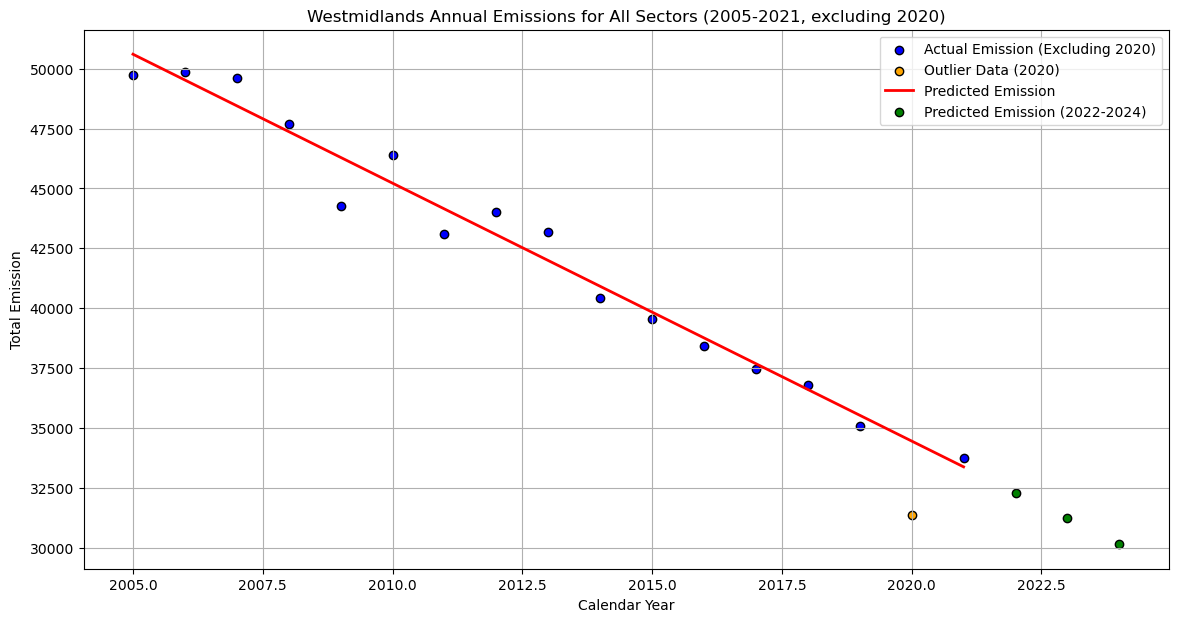

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


# Exclude the year 2020 from the dataset for training
training_data = westmidland_time_series_table[westmidland_time_series_table['Calendar Year'] != 2020]

# Initialize the linear regression model
model = LinearRegression()

# Reshape the data and fit the model
X_train = training_data['Calendar Year'].values.reshape(-1, 1)  # Independent variable (excluding 2020)
y_train = training_data['Grand Total'].values  # Dependent variable (excluding 2020)
model.fit(X_train, y_train)

# Make predictions for the entire dataset including 2020
X_full = westmidland_time_series_table['Calendar Year'].values.reshape(-1, 1)
westmidland_time_series_table['Predicted Emission'] = model.predict(X_full)

# Predictions for 2022 to 2024
future_years = np.array([[2022], [2023], [2024]])
future_predictions = model.predict(future_years)

# Coefficients and R^2 score
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X_train, y_train)



# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', edgecolors='black', label='Actual Emission (Excluding 2020)')
plt.scatter([2020], westmidland_time_series_table[westmidland_time_series_table['Calendar Year'] == 2020]['Grand Total'], color='orange', edgecolors='black', label='Outlier Data (2020)')
plt.plot(X_full, westmidland_time_series_table['Predicted Emission'], color='red', linewidth=2, label='Predicted Emission')
plt.scatter(future_years, future_predictions, color='green', edgecolors='black', label='Predicted Emission (2022-2024)')
plt.title('Westmidlands Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.grid(True)
plt.legend()
plt.show()



In [4]:
slope
intercept
r_squared

0.9715567928881573

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating MSE, MAE, and R^2 score using the training data (excluding 2020)
mse = mean_squared_error(y_train, model.predict(X_train))
mae = mean_absolute_error(y_train, model.predict(X_train))
r2 = r2_score(y_train, model.predict(X_train))
rmse = sqrt(mse)
# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) Score: {r2}")
print(f"Root Mean squared eror: {rmse}")

Mean Squared Error (MSE): 754745.6891895459
Mean Absolute Error (MAE): 712.5904655178242
R-squared (R²) Score: 0.9715567928881573
Root Mean squared eror: 868.7610080969023


In [67]:
slope

-1076.5104586912514

In [68]:
intercept

2209007.350166031

In [69]:
r_squared

0.9715567928881573

In [6]:
future_predictions

array([32303.20269232, 31226.69223363, 30150.18177494])

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


# Calculating MSE, RMSE, MAE, and R² Score
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, rmse, mae, r2


NameError: name 'X_test' is not defined

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(westmidland_time_series_table, model='additive')

# Plotting the decomposition components
plt.figure(figsize=(14, 12))
plt.subplot(4, 1, 1)
plt.plot(westmidland_time_series_table, label='Original')
plt.legend(loc='upper left')
plt.title('National Total Emissions Over Time')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [77]:


# Decompose the time series with a specified period of 1 (yearly data)
decomposition = seasonal_decompose(westmidland_time_series_table, model='additive', period=1)

# Plotting the decomposition components
plt.figure(figsize=(14, 12))
plt.subplot(4, 1, 1)
plt.plot(westmidland_time_series_table, label='Original')
plt.legend(loc='upper left')
plt.title('National Total Emissions Over Time')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)

# Calculating the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 36.52200721575396
Mean Squared Error: 2152.847138463387
R-squared Score: 0.9908041610887431
Root Mean Squared Error: 46.398783803709634


In [129]:
import numpy as np
from sklearn.metrics import mean_squared_error

n = len(y_train)  # number of observations
k = regressor.coef_.shape[0] + 1  # number of parameters (including the intercept)
mse = mean_squared_error(y_test, y_pred)
residuals = y_test - y_pred
sse = np.sum(residuals**2)

# Log-likelihood
sigma_squared = mse
log_likelihood = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(sigma_squared) - (1 / (2 * sigma_squared)) * sse

# AIC and BIC
aic = 2 * k - 2 * log_likelihood
bic = np.log(n) * k - 2 * log_likelihood

print(f"Log-likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")


Log-likelihood: -117.64908274319401
AIC: 269.29816548638803
BIC: 289.3250806023031


In [49]:
from joblib import dump, load

# Save the model to a file
dump(regressor, 'regression_model.joblib')


['regression_model.joblib']

In [50]:
# Load the model from the file
model = load('regression_model.joblib')

#using model to make predictions
predictions = model.predict(X_test)
predictions

array([1232.85624046,  738.78645797,  880.00216811,  393.21771001,
       1375.03203259, 1101.11372555, 2054.79029596])

<h1>Regularization</h1>

In [51]:
from sklearn.linear_model import Ridge

# alpha is the regularization strength
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

# Evaluate the model
print("Ridge Intercept:", ridge_regressor.intercept_)
print("Ridge Coefficients:", ridge_regressor.coef_)


Ridge Intercept: 6.33076647009284
Ridge Coefficients: [-0.46163039  0.67037142  0.03020056 -0.1029915   0.227319   -0.08501577
  0.27113205 -0.04987767 -0.7495865   0.0921018  -0.12857463  0.41587872
  0.71317622 -0.42469931 -0.52754111  1.1546043 ]


In [52]:
from sklearn.linear_model import Ridge

# alpha is the regularization strength
ridge_regressor = Ridge(alpha=100.0)
ridge_regressor.fit(X_train, y_train)

# Evaluate the model
print("Ridge Intercept:", ridge_regressor.intercept_)
print("Ridge Coefficients:", ridge_regressor.coef_)


Ridge Intercept: 4.481125694364437
Ridge Coefficients: [-0.38037044  0.47012366  0.05645802 -0.05364498  0.15741921  0.03862311
  0.17829713 -0.15852069 -0.45722296  0.04778057 -0.14460857  0.28552221
  0.62054214 -0.29976001 -0.35579393  1.03004119]


In [53]:
from sklearn.linear_model import Lasso

# alpha is the regularization strength
# LASSO - least Absolute shrinkage and selection operator
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train, y_train)

# Evaluate the model
print("Lasso Intercept:", lasso_regressor.intercept_)
print("Lasso Coefficients:", lasso_regressor.coef_)


Lasso Intercept: -1.4061609092955223
Lasso Coefficients: [ 0.45178845  0.02498617  0.02119755 -0.01147759  0.05330843 -0.01046445
  0.03259591 -0.03411763  0.01705936  0.09285746  0.00864468  0.04476419
 -0.01143675  0.05593699  0.01605408 -0.03222047]


c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+05, tolerance: 1.036e+05
  model = cd_fast.enet_coordinate_descent(


In [54]:
from sklearn.linear_model import ElasticNet

# alpha is the regularization strength and l1_ratio controls the ratio of L1 to L2 penalty
elasticnet_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_regressor.fit(X_train, y_train)

# Evaluate the model
print("ElasticNet Intercept:", elasticnet_regressor.intercept_)
print("ElasticNet Coefficients:", elasticnet_regressor.coef_)


ElasticNet Intercept: -1.4061474442196413
ElasticNet Coefficients: [ 0.45178939  0.02498646  0.02119755 -0.01147869  0.0533097  -0.01046568
  0.03259726 -0.03411897  0.01706075  0.0928575   0.00864475  0.04476423
 -0.01143857  0.05593888  0.01605418 -0.03222293]


c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+05, tolerance: 1.036e+05
  model = cd_fast.enet_coordinate_descent(


In [55]:
from sklearn.linear_model import RidgeCV

# Define a set of alpha values to test
alphas = [0.1, 1.0, 10.0, 100.0]

# Create the RidgeCV regressor
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Retrieve the best alpha and coefficients
best_alpha = ridge_cv.alpha_
print("Best Alpha:", best_alpha)
print("RidgeCV Intercept:", ridge_cv.intercept_)
print("RidgeCV Coefficients:", ridge_cv.coef_)

#Inspecting the mean squared errors for each alpha
cv_mse = np.mean(ridge_cv.cv_values_, axis=0)
print("Mean Squared Errors for each alpha:", cv_mse)


Best Alpha: 0.1
RidgeCV Intercept: 6.721525595727599
RidgeCV Coefficients: [-0.46266137  0.67298454  0.02982794 -0.10360623  0.22822503 -0.08674788
  0.27235592 -0.04838229 -0.75355616  0.09273732 -0.12837317  0.41762104
  0.71444436 -0.42635416 -0.52984566  1.15621381]
Mean Squared Errors for each alpha: [23895.77934269 23904.96437214 23987.0162265  24016.5262162 ]


In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_test_pred = ridge_cv.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R-squared Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R-squared Score: 0.9907729407994033
Mean Squared Error: 2160.1561519439447
Root Mean Squared Error: 46.47748005156846


In [57]:
# Define a set of alpha values to test
alphas = [0.1, 1.0, 10.0, 100.0]

# Create the RidgeCV regressor
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_absolute_error', store_cv_values=True)

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Retrieve the best alpha and coefficients
best_alpha = ridge_cv.alpha_
print("Best Alpha:", best_alpha)

Best Alpha: 100.0


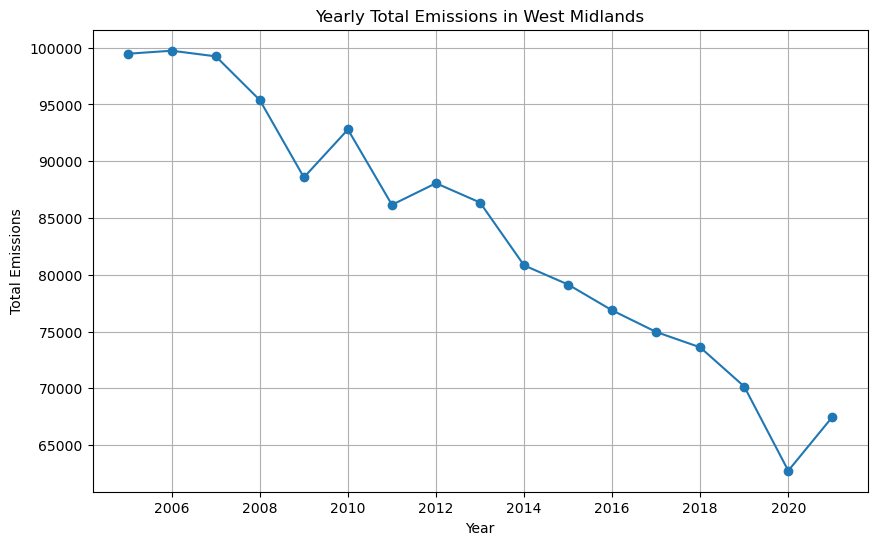

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

yearly_totals = west_midlands_local_authority_emissions.sum()

plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='line', marker='o')

plt.title('Yearly Total Emissions in West Midlands')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)

plt.show()


<H1>London<H1/>

In [59]:
# Filter the data for the "london" Region/Country
London_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'London']
London_data

3    Region/Country Second Tier Authority       Local Authority  \
3502         London  Barking and Dagenham  Barking and Dagenham   
3503         London  Barking and Dagenham  Barking and Dagenham   
3504         London  Barking and Dagenham  Barking and Dagenham   
3505         London  Barking and Dagenham  Barking and Dagenham   
3506         London  Barking and Dagenham  Barking and Dagenham   
...             ...                   ...                   ...   
4058         London           Westminster           Westminster   
4059         London           Westminster           Westminster   
4060         London           Westminster           Westminster   
4061         London           Westminster           Westminster   
4062         London           Westminster           Westminster   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
3502            E09000002          2005           131.684063     17.459426   
3503            E09000002          2006           139.895257      13.63688   
3504            E09000002          2007           140.487938     12.727459   
3505            E09000002          2008           135.419965     12.319912   
3506            E09000002          2009           115.972501      12.15477   
...                   ...           ...                  ...           ...   
4058            E09000033          2017            47.698762     23.283152   
4059            E09000033          2018           131.422791      59.29191   
4060            E09000033          2019           106.191379     57.354249   
4061            E09000033          2020            69.206872     52.611429   
4062            E09000033          2021            94.854934     69.663544   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
3502                      66.870493        28.426324     244.440306  ...   
3503                      66.154453        28.690501     248.377092  ...   
3504                      69.810178        30.324736     253.350311  ...   
3505                      68.498117         25.60148     241.839473  ...   
3506                      59.188809         21.28696     208.603041  ...   
...                             ...              ...            ...  ...   
4058                       0.085511        95.767013     166.834438  ...   
4059                       1.014299        94.752952     286.481952  ...   
4060                       0.268476        84.414842     248.228947  ...   
4061                       0.188609         87.61706      209.62397  ...   
4062                       0.186295       107.401328     272.106101  ...   

3    Agriculture Soils Agriculture Total    Landfill Waste Management 'Other'  \
3502          0.211348          1.239115  161.428095                 7.486672   
3503          0.396191          1.344134  149.864148                 8.481513   
3504           0.25175          1.199139  155.877849                  8.75395   
3505          0.151626          0.907199  128.605453                 8.869047   
3506          0.129006          0.841917  178.517672                 8.801381   
...                ...               ...         ...                      ...   
4058          0.017115          4.485572    9.338904                  7.83116   
4059          0.019147         15.027827   11.016105                 7.773276   
4060          0.021237         14.091068    9.521645                 7.656918   
4061          0.009882         14.423154   14.093663                 7.487961   
4062          0.040033         21.398514    4.464876                 7.905342   

3    Waste Management Total  Grand Total  \
3502             168.914767  1143.769451   
3503             158.345662  1137.669474   
3504             164.631799  1129.493177   
3505               137.4745  1059.170470   
3506             187.319052  1027.842511   
...                     ...          ...   
4058              17.170064  2062.990819   
4059              18

In [60]:
# Filter out rows where "Second Tier Authority" ends with "Total"
London_data_filtered = London_data[~London_data['Second Tier Authority'].str.endswith("Total")]

In [61]:
# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']
# Add columns that end with "Total"
columns_to_keep.extend([col for col in London_data_filtered.columns if col.endswith("Total")])

In [62]:
London_filtered_columns = London_data_filtered[columns_to_keep]

London_filtered_columns.to_csv('London_filtered_columns.csv')
London_filtered_columns

3    Region/Country Second Tier Authority       Local Authority  \
3502         London  Barking and Dagenham  Barking and Dagenham   
3503         London  Barking and Dagenham  Barking and Dagenham   
3504         London  Barking and Dagenham  Barking and Dagenham   
3505         London  Barking and Dagenham  Barking and Dagenham   
3506         London  Barking and Dagenham  Barking and Dagenham   
...             ...                   ...                   ...   
4058         London           Westminster           Westminster   
4059         London           Westminster           Westminster   
4060         London           Westminster           Westminster   
4061         London           Westminster           Westminster   
4062         London           Westminster           Westminster   

3    Local Authority Code Calendar Year LULUCF Net Emissions Industry Total  \
3502            E09000002          2005              3.00106     244.440306   
3503            E09000002          2006              2.99693     248.377092   
3504            E09000002          2007             2.915637     253.350311   
3505            E09000002          2008             2.821984     241.839473   
3506            E09000002          2009              2.73088     208.603041   
...                   ...           ...                  ...            ...   
4058            E09000033          2017             1.201102     166.834438   
4059            E09000033          2018             1.205057     286.481952   
4060            E09000033          2019             1.167881     248.228947   
4061            E09000033          2020             1.178764      209.62397   
4062            E09000033          2021              1.15641     272.106101   

3    Commercial Total Public Sector Total Domestic Total Transport Total  \
3502       137.676935            35.95596     355.209148       197.33216   
3503       137.705936           33.476519     353.608435      201.814766   
3504       136.537811           32.622496     342.227095       196.00889   
3505       131.803592           31.038871     339.158195      174.126655   
3506       115.528181            27.75836     305.796533      179.264547   
...               ...                 ...            ...             ...   
4058      1015.272687          247.337188     317.290917       293.39885   
4059       680.109173          392.924316     308.350644      282.767489   
4060       614.555353          326.036055      291.00727      256.091137   
4061       441.270459          279.303695     275.398011      202.168898   
4062       547.174354          312.312078     292.224507      213.189986   

3    Agriculture Total Waste Management Total  Grand Total  
3502          1.239115             168.914767  1143.769451  
3503          1.344134             158.345662  1137.669474  
3504          1.199139             164.631799  1129.493177  
3505          0.907199               137.4745  1059.170470  
3506          0.841917             187.319052  1027.842511  
...                ...                    ...          ...  
4058          4.485572              17.170064  2062.990819  
4059         15.027827              18.789381  1985.655839  
4060         14.091068              17.178562  1768.356274  
4061         14.423154              21.581624  1444.948575  
4062         21.398514              12.370218  1671.932170  

[561 rows x 14 columns]

In [63]:
# Create the pivot table of west_midlands local authorities emission
London_local_authority_emissions = pd.pivot_table(London_filtered_columns, values='Grand Total', index=['Local Authority'], columns=['Calendar Year'])

London_local_authority_emissions


Calendar Year                  2005         2006         2007         2008  \
Local Authority                                                              
Barking and Dagenham    1143.769451  1137.669474  1129.493177  1059.170470   
Barnet                  1935.738379  1936.108212  1881.730350  1895.947916   
Bexley                  1401.965109  1375.118185  1317.338848  1290.522468   
Brent                   1658.208154  1610.531981  1612.339933  1676.850623   
Bromley                 1721.234100  1744.069163  1655.604912  1618.384935   
Camden                  1877.355270  1980.016766  1922.148658  1883.867937   
City of London          1729.953162  1856.477516  1746.600671  1759.470248   
Croydon                 1931.756219  1885.574789  1797.101804  1750.064513   
Ealing                  1951.198985  1960.648553  1935.712137  1950.860111   
Enfield                 1748.232280  1879.598351  1880.963693  1709.688882   
Greenwich               1416.217430  1399.930012  1352.399745  1358.336912   
Hackney                 1015.090396  1019.945637   997.809376  1001.874644   
Hammersmith and Fulham  1164.287846  1182.120138  1150.898762  1136.048815   
Haringey                1150.764337  1151.937818  1100.946609  1132.659709   
Harrow                  1157.228225  1134.624330  1106.392111  1137.399568   
Havering                1601.459562  1598.010172  1544.703518  1483.401713   
Hillingdon              2548.840600  2525.184957  2415.811059  2560.369310   
Hounslow                1772.855740  1797.537911  1746.773293  1711.494746   
Islington               1299.180237  1332.113342  1299.171071  1325.751925   
Kensington and Chelsea  1460.147803  1491.438543  1430.694540  1437.673702   
Kingston upon Thames     954.370986   937.979827   911.299808   883.782973   
Lambeth                 1591.531704  1589.885272  1533.699620  1525.115866   
Lewisham                1312.216548  1288.290759  1246.585915  1185.595845   
Merton                  1007.609326   988.472542   940.719068  1015.357564   
Newham                  1744.630226  1830.620132  1818.882395  1768.959537   
Redbridge               1432.459955  1405.229768  1383.728645  1311.253544   
Richmond upon Thames    1201.782909  1187.601188  1141.738613  1136.712776   
Southwark               1924.908302  1921.816540  1867.658966  1837.044751   
Sutton                   968.323516   964.991571   931.097147   911.486700   
Tower Hamlets           2158.423511  2503.448121  2468.663440  2508.170331   
Waltham Forest          1099.928040  1102.047793  1061.292407  1086.986978   
Wandsworth              1628.392425  1583.779240  1505.198016  1400.135772   
Westminster             3666.384755  3821.036803  3655.377778  3683.201324   

Calendar Year                  2009         2010         2011         2012  \
Local Authority                                                              
Barking and Dagenham    1027.842511  1074.458911  1063.789683   989.485100   
Barnet                  1930.874717  1991.839989  1803.398317  1885.286564   
Bexley                  1202.145062  1308.786002  1135.618513  1201.956255   
Brent                   1706.601914  1656.682391  1461.257729  1682.292163   
Bromley                 1558.309805  1658.285845  1446.404601  1515.517494   
Camden                  1702.861352  1755.224626  1608.445972  1707.674042   
City of London          1551.279506  1711.862311  1482.148882  1681.313826   
Croydon                 1660.492021  1799.915324  1568.043628  1674.327417   
Ealing                  1701.818270  1717.703808  1614.173621  1726.009810   
Enfield                 1611.718264  1675.202836  1494.829223  1603.918468   
Greenwich               1286.963813  1367.163039  1248.558247  1229.056708   
Hackney                  933.836421   951.613807   865.224889   955.281777   
Hammersmith and Fulham  1097.033177  1126.681085  1022.357948  1066.910579   
Haringey                1023.782785  1032.509481   935.203949   982.412092   
Harrow               

In [64]:
import pandas as pd

# Calculate the yearly total emissions for each year
yearly_totals = London_local_authority_emissions.sum()

# Append the totals as a new row to the DataFrame
London_local_authority_emissions.loc['Total'] = yearly_totals

London_local_authority_emissions

Calendar Year                   2005          2006          2007  \
Local Authority                                                    
Barking and Dagenham     1143.769451   1137.669474   1129.493177   
Barnet                   1935.738379   1936.108212   1881.730350   
Bexley                   1401.965109   1375.118185   1317.338848   
Brent                    1658.208154   1610.531981   1612.339933   
Bromley                  1721.234100   1744.069163   1655.604912   
Camden                   1877.355270   1980.016766   1922.148658   
City of London           1729.953162   1856.477516   1746.600671   
Croydon                  1931.756219   1885.574789   1797.101804   
Ealing                   1951.198985   1960.648553   1935.712137   
Enfield                  1748.232280   1879.598351   1880.963693   
Greenwich                1416.217430   1399.930012   1352.399745   
Hackney                  1015.090396   1019.945637    997.809376   
Hammersmith and Fulham   1164.287846   1182.120138   1150.898762   
Haringey                 1150.764337   1151.937818   1100.946609   
Harrow                   1157.228225   1134.624330   1106.392111   
Havering                 1601.459562   1598.010172   1544.703518   
Hillingdon               2548.840600   2525.184957   2415.811059   
Hounslow                 1772.855740   1797.537911   1746.773293   
Islington                1299.180237   1332.113342   1299.171071   
Kensington and Chelsea   1460.147803   1491.438543   1430.694540   
Kingston upon Thames      954.370986    937.979827    911.299808   
Lambeth                  1591.531704   1589.885272   1533.699620   
Lewisham                 1312.216548   1288.290759   1246.585915   
Merton                   1007.609326    988.472542    940.719068   
Newham                   1744.630226   1830.620132   1818.882395   
Redbridge                1432.459955   1405.229768   1383.728645   
Richmond upon Thames     1201.782909   1187.601188   1141.738613   
Southwark                1924.908302   1921.816540   1867.658966   
Sutton                    968.323516    964.991571    931.097147   
Tower Hamlets            2158.423511   2503.448121   2468.663440   
Waltham Forest           1099.928040   1102.047793   1061.292407   
Wandsworth               1628.392425   1583.779240   1505.198016   
Westminster              3666.384755   3821.036803   3655.377778   
Total                   52376.445488  53123.855407  51490.576089   

Calendar Year                   2008          2009          2010  \
Local Authority                                                    
Barking and Dagenham     1059.170470   1027.842511   1074.458911   
Barnet                   1895.947916   1930.874717   1991.839989   
Bexley                   1290.522468   1202.145062   1308.786002   
Brent                    1676.850623   1706.601914   1656.682391   
Bromley                  1618.384935   1558.309805   1658.285845   
Camden                   1883.867937   1702.861352   1755.224626   
City of London           1759.470248   1551.279506   1711.862311   
Croydon                  1750.064513   1660.492021   1799.915324   
Ealing                   1950.860111   1701.818270   1717.703808   
Enfield                  1709.688882   1611.718264   1675.202836   
Greenwich                1358.336912   1286.963813   1367.163039   
Hackney                  1001.874644    933.836421    951.613807   
Hammersmith and Fulham   1136.048815   1097.033177   1126.681085   
Haringey                 1132.659709   1023.782785   1032.509481   
Harrow                   1137.399568    959.983249   1007.040283   
Havering                 1483.401713   1382.402894   1416.720720   
Hillingdon               2560.369310   2437.150973   2382.919921   
Hounslow                 1711.494746   1603.351410   1663.511505   
Islington                1325.751925   1206.337606   1236.015406   
Kensington and Chelsea   1437.673702   1359.951614   1481.545658   
Kingston upon Thames      883.782973    845.347212    9

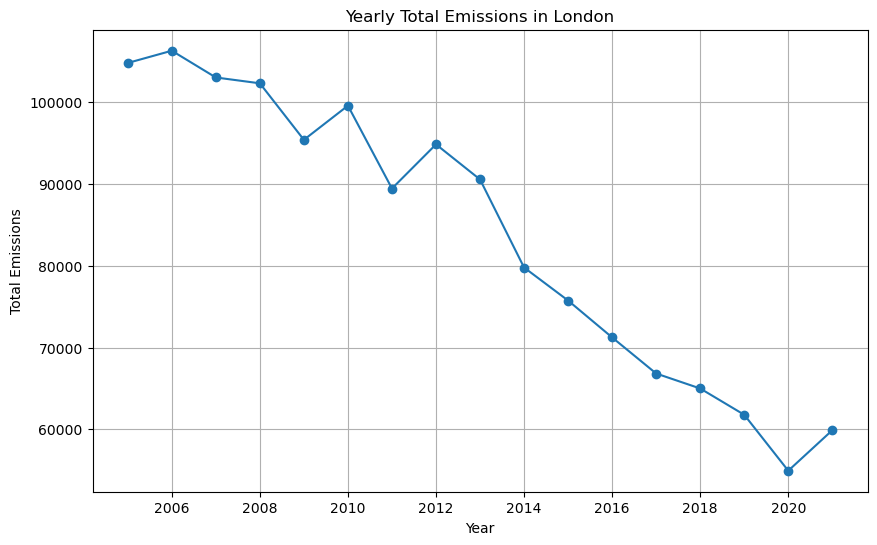

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

yearly_totals = London_local_authority_emissions.sum()

plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='line', marker='o')

plt.title('Yearly Total Emissions in London')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)

plt.show()

<H1>Wales<H1/>

In [66]:
# Filter the data for the "Wales" Region/Country
Wales_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'Wales']
Wales_data

3    Region/Country Second Tier Authority Local Authority  \
5899          Wales                 Wales   Blaenau Gwent   
5900          Wales                 Wales   Blaenau Gwent   
5901          Wales                 Wales   Blaenau Gwent   
5902          Wales                 Wales   Blaenau Gwent   
5903          Wales                 Wales   Blaenau Gwent   
...             ...                   ...             ...   
6268          Wales                 Wales         Wrexham   
6269          Wales                 Wales         Wrexham   
6270          Wales                 Wales         Wrexham   
6271          Wales                 Wales         Wrexham   
6272          Wales                 Wales         Wrexham   

3    Local Authority Code Calendar Year Industry Electricity Industry Gas   \
5899            W06000019          2005             65.59808     30.923927   
5900            W06000019          2006            68.297658     37.994917   
5901            W06000019          2007              62.6949     35.219753   
5902            W06000019          2008            66.289964     35.527274   
5903            W06000019          2009            54.565764     24.645645   
...                   ...           ...                  ...           ...   
6268            W06000006          2017           138.291306    215.451935   
6269            W06000006          2018           124.951001    262.003868   
6270            W06000006          2019           114.083503    227.250945   
6271            W06000006          2020              87.7227    220.889613   
6272            W06000006          2021            95.762223     296.66666   

3    Large Industrial Installations Industry 'Other' Industry Total  ...  \
5899                       0.910503        31.863069     129.295578  ...   
5900                       0.882636        33.684962     140.860173  ...   
5901                       0.895169        32.121519     130.931341  ...   
5902                       0.850555         30.52934     133.197132  ...   
5903                       0.868735        30.739822     110.819967  ...   
...                             ...              ...            ...  ...   
6268                       6.162685        58.279959     418.185885  ...   
6269                       6.784681        60.623925     454.363475  ...   
6270                      10.291972        58.155464     409.781884  ...   
6271                       8.987525         57.01724     374.617077  ...   
6272                         9.2927         60.24056     461.962144  ...   

3    Agriculture Soils Agriculture Total   Landfill Waste Management 'Other'  \
5899          1.393334          9.764239  101.06659                 3.698073   
5900          1.312323          9.408435  94.259989                 4.270126   
5901          1.306047          9.717945  99.165453                 4.397067   
5902          1.132106          9.145378  75.383486                 4.401133   
5903          1.198329          8.843912  66.026656                 4.155314   
...                ...               ...        ...                      ...   
6268         24.874715        226.456449   38.64809                13.623222   
6269         24.210341         219.62436  31.887202                14.560996   
6270         23.919956        209.605174  36.983958                17.280628   
6271         22.221266        229.931955    20.0322                16.058294   
6272          23.31838        216.993751  20.752061                13.022652   

3    Waste Management Total  Grand Total  \
5899             104.764663   590.397163   
5900              98.530116   594.764649   
5901              103.56252   576.227727   
5902              79.784619   559.320474   
5903               70.18197   494.419940   
...                     ...          ...   
6268              52.271312  1296.506128   
6269              46.448198  1269.213023   
6270              54.264586  1206.602551   
6271            

In [67]:
# Filter out rows where "Second Tier Authority" ends with "Total"
Wales_data_filtered = Wales_data[~Wales_data['Second Tier Authority'].str.endswith("Total")]

In [68]:
# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']
# Add columns that end with "Total"
columns_to_keep.extend([col for col in Wales_data_filtered.columns if col.endswith("Total")])



In [69]:
Wales_filtered_columns = Wales_data_filtered[columns_to_keep]

Wales_filtered_columns.to_csv('Wales_filtered_columns.csv')
Wales_filtered_columns


3    Region/Country Second Tier Authority Local Authority  \
5899          Wales                 Wales   Blaenau Gwent   
5900          Wales                 Wales   Blaenau Gwent   
5901          Wales                 Wales   Blaenau Gwent   
5902          Wales                 Wales   Blaenau Gwent   
5903          Wales                 Wales   Blaenau Gwent   
...             ...                   ...             ...   
6268          Wales                 Wales         Wrexham   
6269          Wales                 Wales         Wrexham   
6270          Wales                 Wales         Wrexham   
6271          Wales                 Wales         Wrexham   
6272          Wales                 Wales         Wrexham   

3    Local Authority Code Calendar Year LULUCF Net Emissions Industry Total  \
5899            W06000019          2005            -0.327826     129.295578   
5900            W06000019          2006            -0.808447     140.860173   
5901            W06000019          2007            -0.645698     130.931341   
5902            W06000019          2008             -0.80085     133.197132   
5903            W06000019          2009            -1.145458     110.819967   
...                   ...           ...                  ...            ...   
6268            W06000006          2017            30.759367     418.185885   
6269            W06000006          2018              29.9354     454.363475   
6270            W06000006          2019            29.062392     409.781884   
6271            W06000006          2020             27.78471     374.617077   
6272            W06000006          2021            26.685561     461.962144   

3    Commercial Total Public Sector Total Domestic Total Transport Total  \
5899        32.730794           18.562459     195.049517       100.55774   
5900        35.206249           20.236768     193.346979       97.984376   
5901        32.374593           18.622168      181.66203      100.002829   
5902        33.935402           18.892512     186.674254       98.492027   
5903         27.19311           14.499577     167.845082        96.18178   
...               ...                 ...            ...             ...   
6268        72.175017           25.829278      213.93879       256.89003   
6269         25.79469            23.23909     211.829126      257.978684   
6270        22.563667           22.568689     203.705944      255.050215   
6271        18.213058           19.070547     196.043477      201.145887   
6272         21.63301           20.777525     201.075478      224.600499   

3    Agriculture Total Waste Management Total  Grand Total  
5899          9.764239             104.764663   590.397163  
5900          9.408435              98.530116   594.764649  
5901          9.717945              103.56252   576.227727  
5902          9.145378              79.784619   559.320474  
5903          8.843912               70.18197   494.419940  
...                ...                    ...          ...  
6268        226.456449              52.271312  1296.506128  
6269         219.62436              46.448198  1269.213023  
6270        209.605174              54.264586  1206.602551  
6271        229.931955              36.090495  1102.897206  
6272        216.993751              33.774714  1207.502681  

[374 rows x 14 columns]

In [70]:

# Create the pivot table of west_midlands local authorities emission
Wales_local_authority_emissions = pd.pivot_table(Wales_filtered_columns, values='Grand Total', index=['Local Authority'], columns=['Calendar Year'])

Wales_local_authority_emissions

Calendar Year             2005         2006         2007         2008  \
Local Authority                                                         
Blaenau Gwent       590.397163   594.764649   576.227727   559.320474   
Bridgend           1359.583320  1328.278136  1283.493003  1263.946946   
Caerphilly         1491.891676  1466.628930  1403.504827  1330.582166   
Cardiff            3698.847519  3411.240239  3306.860621  3193.118687   
Carmarthenshire    2602.104764  2570.189236  2518.959135  2471.906750   
Ceredigion         1126.256377  1101.837573  1058.937582  1040.970718   
Conwy              1235.264422  1213.764301  1125.155795  1089.955240   
Denbighshire       1037.682654  1043.320125   974.457215   958.170492   
Flintshire         2605.371511  2986.886044  2860.705377  2645.697658   
Gwynedd            1624.592759  1600.077478  1499.865799  1387.189173   
Isle of Anglesey   1117.058819  1108.004301  1040.619441   988.607137   
Merthyr Tydfil      515.601440   513.300545   487.687265   471.836465   
Monmouthshire      1215.100255  1153.962300  1138.193734  1141.699561   
Neath Port Talbot  8397.242394  8675.849163  9185.078825  8658.722681   
Newport            2548.432964  2594.748311  2362.596643  2198.052882   
Pembrokeshire      2156.112223  2156.710859  2116.327429  2053.474018   
Powys              2391.303577  2367.657499  2251.807570  2143.534926   
Rhondda Cynon Taf  2052.789179  2026.559884  1959.689670  1775.125008   
Swansea            2214.178239  2206.585074  2042.155416  1994.768164   
Torfaen             757.604676   754.329911   708.394730   730.888745   
Vale of Glamorgan  1806.882158  1744.202955  1754.105112  1665.188694   
Wrexham            2003.171855  2026.335823  1915.584024  1867.223062   

Calendar Year             2009         2010         2011         2012  \
Local Authority                                                         
Blaenau Gwent       494.419940   506.901265   428.349653   450.003214   
Bridgend           1173.890622  1176.357606  1095.250276  1113.884061   
Caerphilly         1221.059679  1253.815468  1065.323173  1126.135522   
Cardiff            2969.365021  2913.888084  2445.316260  2624.123187   
Carmarthenshire    2266.983363  2353.432116  2106.291325  2160.298425   
Ceredigion          997.238606  1037.376865   979.918183  1028.805758   
Conwy              1027.964417  1054.812419   937.861289   982.688234   
Denbighshire        896.630095   911.909382   828.091079   855.911724   
Flintshire         2212.047012  2138.727258  1963.600766  2230.682165   
Gwynedd            1337.827245  1365.531674  1234.055245  1301.921387   
Isle of Anglesey    885.864240   779.281527   704.367157   719.616464   
Merthyr Tydfil      424.200746   428.794167   365.600909   381.307059   
Monmouthshire      1074.428002  1108.142833  1039.640713  1045.764186   
Neath Port Talbot  6612.024925  8956.374552  7962.577083  6302.730722   
Newport            1843.604930  1951.700363  1677.179751  1594.614057   
Pembrokeshire      2050.219527  2034.014478  1900.570278  1905.002553   
Powys              2055.430330  2138.586231  1996.586736  2075.615066   
Rhondda Cynon Taf  1675.182762  1753.329228  1511.262605  1558.142019   
Swansea            1804.555497  1856.536451  1575.467083  1626.219109   
Torfaen             677.235185   689.494187   624.886068   652.483152   
Vale of Glamorgan  1485.307101  1532.067292  1482.858073  1476.054129   
Wrexham            1741.254914  1809.813490  1575.432300  1625.809205   

Calendar Year             2013         2014         2015         2016  \
Local Authority                                                         
Blaenau Gwent       451.114407   389.828472   534.622710   390.962484   
Bridgend           1103.423135  1031.194944   984.409370   958.793719   
Caerphilly         1120.623853  1014.975553   953.279500   926.438348   
Cardiff            2519.808130  2228.403312  2107.776243  2042.344438   
Carmarthenshire    2173.361058  2119.475047  2010.904061

In [71]:

# Calculate the yearly total emissions for each year
yearly_totals = Wales_local_authority_emissions.sum()

# Append the totals as a new row to the DataFrame
Wales_local_authority_emissions.loc['Total'] = yearly_totals

Wales_local_authority_emissions

Calendar Year              2005          2006          2007          2008  \
Local Authority                                                             
Blaenau Gwent        590.397163    594.764649    576.227727    559.320474   
Bridgend            1359.583320   1328.278136   1283.493003   1263.946946   
Caerphilly          1491.891676   1466.628930   1403.504827   1330.582166   
Cardiff             3698.847519   3411.240239   3306.860621   3193.118687   
Carmarthenshire     2602.104764   2570.189236   2518.959135   2471.906750   
Ceredigion          1126.256377   1101.837573   1058.937582   1040.970718   
Conwy               1235.264422   1213.764301   1125.155795   1089.955240   
Denbighshire        1037.682654   1043.320125    974.457215    958.170492   
Flintshire          2605.371511   2986.886044   2860.705377   2645.697658   
Gwynedd             1624.592759   1600.077478   1499.865799   1387.189173   
Isle of Anglesey    1117.058819   1108.004301   1040.619441    988.607137   
Merthyr Tydfil       515.601440    513.300545    487.687265    471.836465   
Monmouthshire       1215.100255   1153.962300   1138.193734   1141.699561   
Neath Port Talbot   8397.242394   8675.849163   9185.078825   8658.722681   
Newport             2548.432964   2594.748311   2362.596643   2198.052882   
Pembrokeshire       2156.112223   2156.710859   2116.327429   2053.474018   
Powys               2391.303577   2367.657499   2251.807570   2143.534926   
Rhondda Cynon Taf   2052.789179   2026.559884   1959.689670   1775.125008   
Swansea             2214.178239   2206.585074   2042.155416   1994.768164   
Torfaen              757.604676    754.329911    708.394730    730.888745   
Vale of Glamorgan   1806.882158   1744.202955   1754.105112   1665.188694   
Wrexham             2003.171855   2026.335823   1915.584024   1867.223062   
Total              44547.469945  44645.233337  43570.406943  41629.979644   

Calendar Year              2009          2010          2011          2012  \
Local Authority                                                             
Blaenau Gwent        494.419940    506.901265    428.349653    450.003214   
Bridgend            1173.890622   1176.357606   1095.250276   1113.884061   
Caerphilly          1221.059679   1253.815468   1065.323173   1126.135522   
Cardiff             2969.365021   2913.888084   2445.316260   2624.123187   
Carmarthenshire     2266.983363   2353.432116   2106.291325   2160.298425   
Ceredigion           997.238606   1037.376865    979.918183   1028.805758   
Conwy               1027.964417   1054.812419    937.861289    982.688234   
Denbighshire         896.630095    911.909382    828.091079    855.911724   
Flintshire          2212.047012   2138.727258   1963.600766   2230.682165   
Gwynedd             1337.827245   1365.531674   1234.055245   1301.921387   
Isle of Anglesey     885.864240    779.281527    704.367157    719.616464   
Merthyr Tydfil       424.200746    428.794167    365.600909    381.307059   
Monmouthshire       1074.428002   1108.142833   1039.640713   1045.764186   
Neath Port Talbot   6612.024925   8956.374552   7962.577083   6302.730722   
Newport             1843.604930   1951.700363   1677.179751   1594.614057   
Pembrokeshire       2050.219527   2034.014478   1900.570278   1905.002553   
Powys               2055.430330   2138.586231   1996.586736   2075.615066   
Rhondda Cynon Taf   1675.182762   1753.329228   1511.262605   1558.142019   
Swansea             1804.555497   1856.536451   1575.467083   1626.219109   
Torfaen              677.235185    689.494187    624.886068    652.483152   
Vale of Glamorgan   1485.307101   1532.067292   1482.858073   1476.054129   
Wrexham             1741.254914   1809.813490   1575.432300   1625.809205   
Total              36926.734158  39750.886937  35500.486005  34837.811399   

Calendar Year              2013          2014          2015          2016  \
Local Authority                                                        

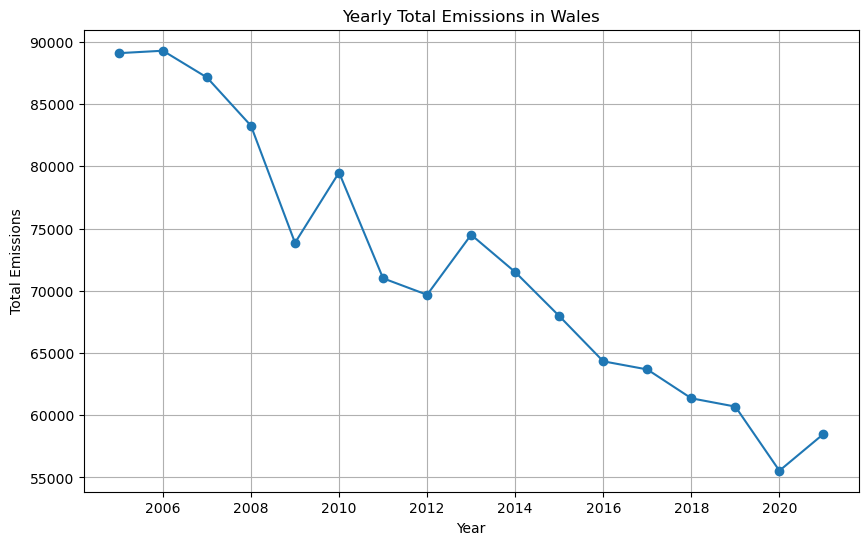

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

yearly_totals = Wales_local_authority_emissions.sum()

plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='line', marker='o')

plt.title('Yearly Total Emissions in Wales')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)

plt.show()

In [73]:
yearly_totals

Calendar Year
2005    89094.939890
2006    89290.466673
2007    87140.813886
2008    83259.959289
2009    73853.468315
2010    79501.773874
2011    71000.972010
2012    69675.622798
2013    74501.047094
2014    71501.660855
2015    67969.985863
2016    64329.383852
2017    63675.637671
2018    61356.652486
2019    60690.289653
2020    55536.540557
2021    58486.651947
dtype: float64

<h3>Per capita emissions refer to the average release of emissions (carbon dioxide, CO2) attributed to each individual within a certain population.<h3/>

<h3>
The term "Average Emissions per km² by Region" refers to a measure used to understand the density of emissions in a given area. This metric provides an average value of emissions (carbon dioxide, CO2) distributed over the total land area of a region, expressed in square kilometers (km²)<h3/>

In [74]:
# Compute average per capita emissions
data_1_1_actual['Per Capita Emissions'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce') / \
                                          pd.to_numeric(data_1_1_actual["Population ('000s, mid-year estimate)"], errors='coerce')

# Compute average emissions per km^2
data_1_1_actual['Emissions per km^2'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce') / \
                                        pd.to_numeric(data_1_1_actual['Area (km2)'], errors='coerce')

# Group by 'Region/Country' to get average per capita emissions and emissions per km^2 for each region
average_emissions = data_1_1_actual.groupby('Region/Country')[['Per Capita Emissions', 'Emissions per km^2']].mean()

average_emissions


3                               Per Capita Emissions  Emissions per km^2
Region/Country                                                          
East Midlands                               9.710848            5.318442
East Midlands Total                         8.668612            2.514725
East of England                             8.091197            5.769531
East of England Total                       7.929507            2.398958
England Total                               7.523039            3.022770
London                                     10.318067           47.155219
London Total                                5.113713           26.209921
National Total                              8.107857            2.072628
North East                                 11.400630           11.222972
North East Total                           10.240767            3.060355
North West                                  9.260969            7.706417
North West Total                            7.965210            3.794200
Northern Ireland                           13.582651            3.095697
Northern Ireland Total                     12.634336            1.605084
Scotland                                   11.779920            3.426134
Scotland Total                              9.553573            0.630670
South East                                  6.804080            6.286119
South East Total                            6.775691            3.038176
South West                                  8.215306            3.880700
South West Total                            7.664305            1.685468
Unallocated                                      NaN                 NaN
Wales                                      12.037397            4.060587
Wales Total                                11.743721            1.691700
West Midlands                               8.623030            7.402992
West Midlands Total                         7.391437            3.215261
Yorkshire and the Humber                   11.376461            5.033133
Yorkshire and the Humber Total              9.092107            3.103146

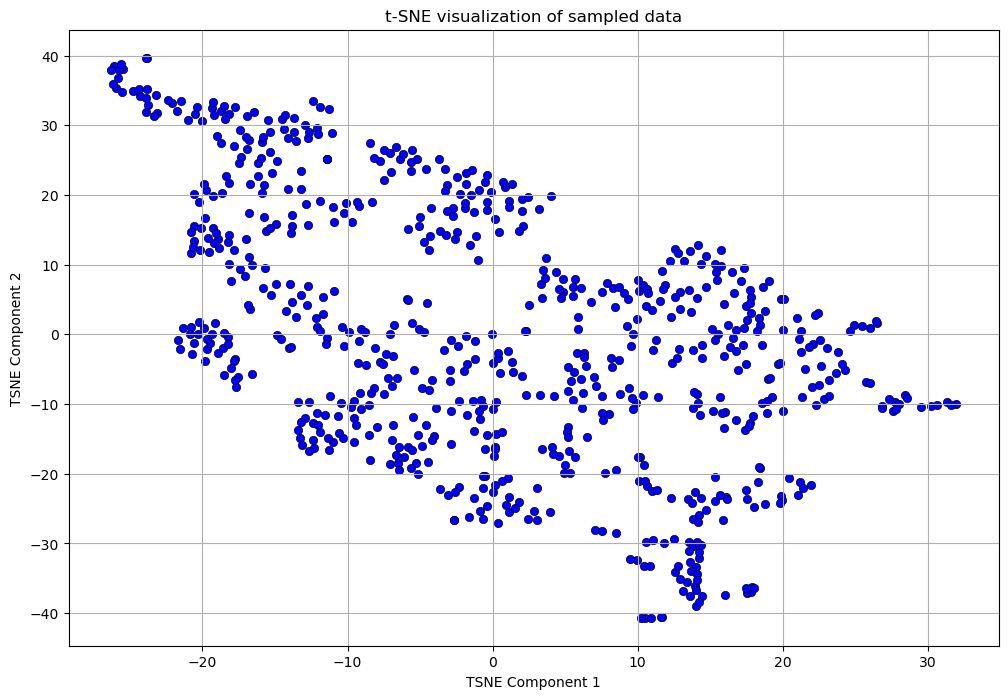

In [75]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '1_1.csv'  #  file path
data = pd.read_csv(file_path)

# Select numerical columns and exclude non-numerical data
numerical_data = data.select_dtypes(include=[np.number])

# Handling missing values by filling them with the mean of each column
numerical_data_filled = numerical_data.fillna(numerical_data.mean())

# Sampling a subset of the data to make the computation more manageable
sampled_data = numerical_data_filled.sample(frac=0.1, random_state=0)  # Adjust 'frac' to change the sample size

# t-SNE transformation
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(sampled_data)

# Creating a DataFrame for the t-SNE results
tsne_df = pd.DataFrame({
    'TSNE1': tsne_results[:, 0],
    'TSNE2': tsne_results[:, 1]
})

# Plotting the t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', color='blue', edgecolor='black', data=tsne_df)
plt.title('t-SNE visualization of sampled data')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True)
plt.show()


In [76]:
tsne_df


TSNE1      TSNE2
0   -23.196171  34.333500
1    15.931448  -3.052190
2    -9.544743 -12.004598
3    17.712883 -12.668040
4    23.051466  -1.983216
..         ...        ...
706   1.385328  -5.390362
707 -20.086830  15.288509
708 -13.126957 -15.810575
709  25.429058   1.221480
710 -11.236401  -8.841590

[711 rows x 2 columns]

c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda_3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


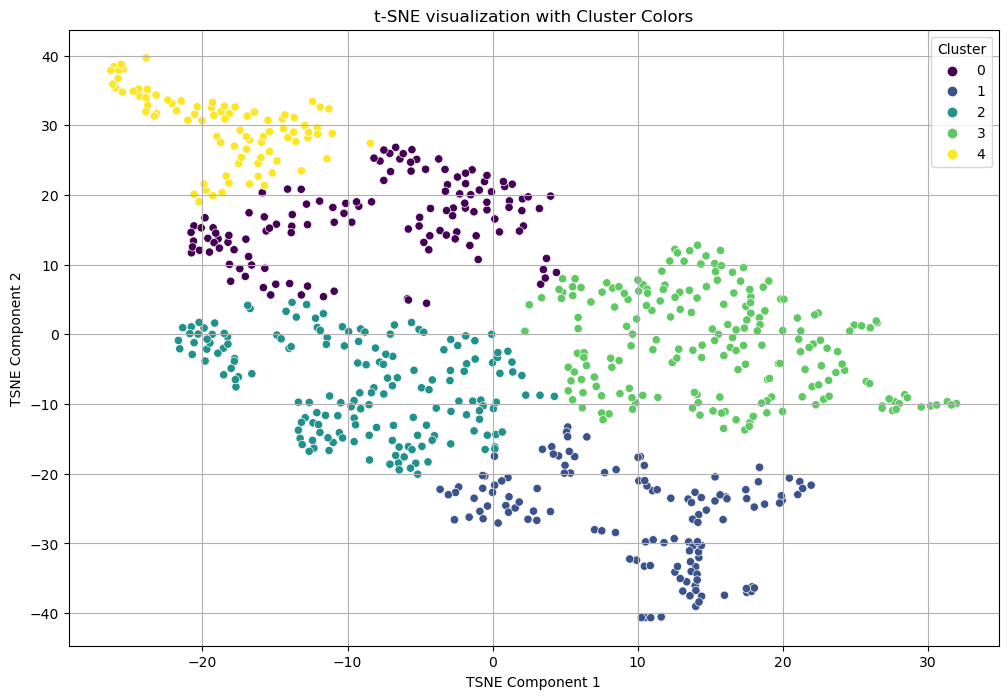

In [77]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


tsne_results = tsne_df

# Extract the t-SNE components
tsne_component_1 = tsne_results['TSNE1']
tsne_component_2 = tsne_results['TSNE2']

# Perform KMeans clustering
# The number of clusters is set to 5 
kmeans = KMeans(n_clusters=5, random_state=0)
tsne_results['Cluster'] = kmeans.fit_predict(tsne_results[['TSNE1', 'TSNE2']])

# Plotting the t-SNE results with different colors for each cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=tsne_results, legend='full')

# Title and labels
plt.title('t-SNE visualization with Cluster Colors')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [78]:
tsne_df

TSNE1      TSNE2  Cluster
0   -23.196171  34.333500        4
1    15.931448  -3.052190        3
2    -9.544743 -12.004598        2
3    17.712883 -12.668040        3
4    23.051466  -1.983216        3
..         ...        ...      ...
706   1.385328  -5.390362        2
707 -20.086830  15.288509        0
708 -13.126957 -15.810575        2
709  25.429058   1.221480        3
710 -11.236401  -8.841590        2

[711 rows x 3 columns]

In [79]:
tsne_df.to_csv('tsne.csv', index=False)

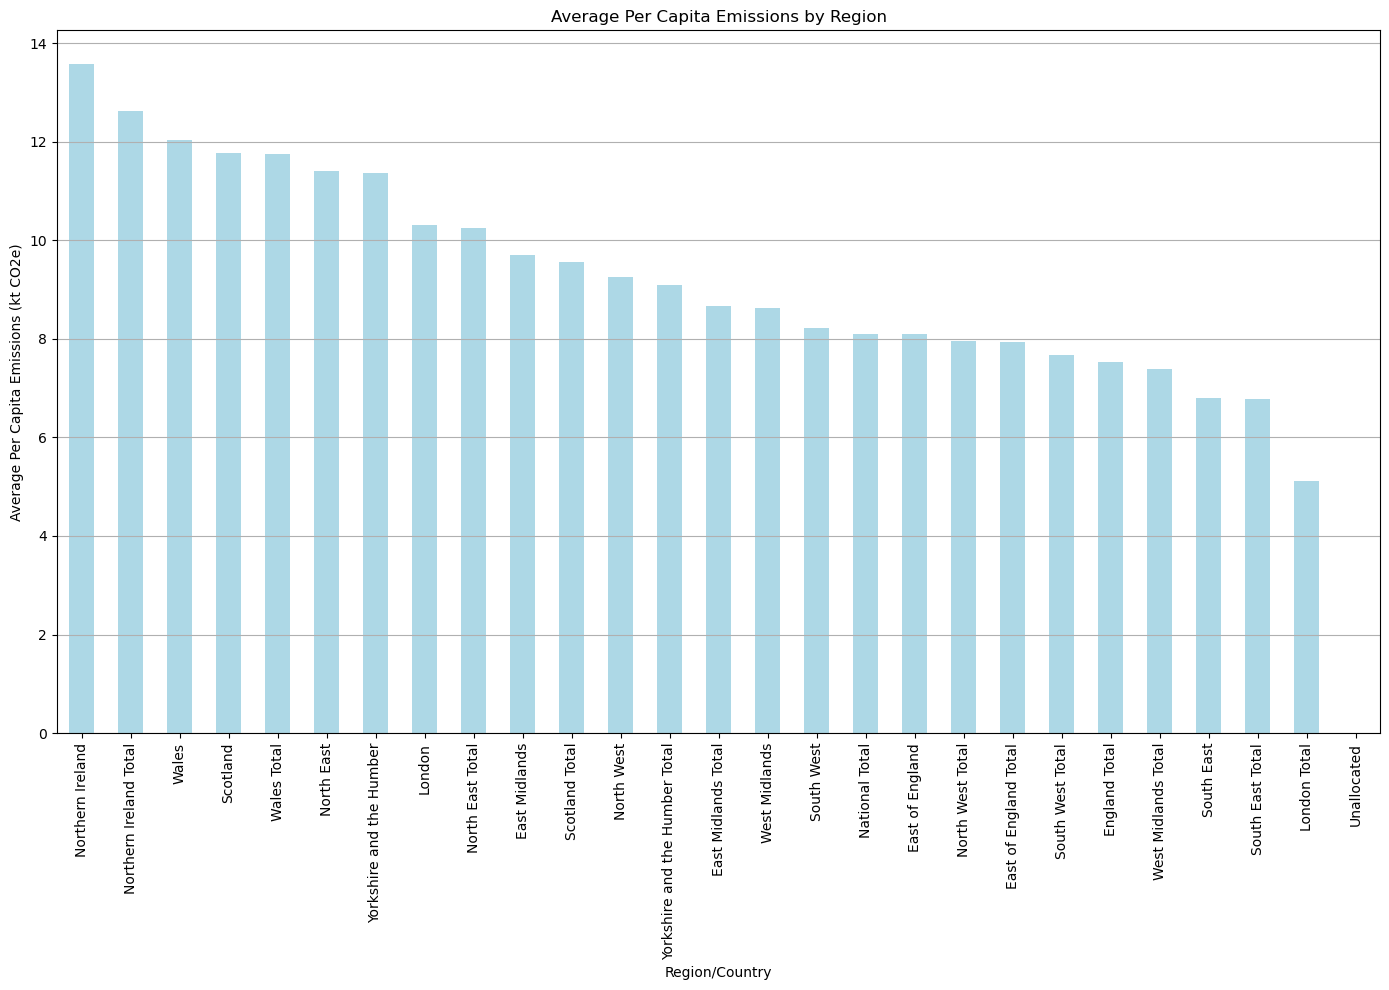

In [80]:
# Sort the regions based on average per capita emissions
sorted_per_capita = average_emissions['Per Capita Emissions'].sort_values(ascending=False)

# Plotting average per capita emissions for each region
plt.figure(figsize=(14, 10))
sorted_per_capita.plot(kind='bar', color='lightblue')
plt.title('Average Per Capita Emissions by Region')
plt.ylabel('Average Per Capita Emissions (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out rows where 'Region/Country' ends with 'Total'
filtered_average_emissions = average_emissions[~average_emissions['Region/Country'].str.endswith('Total')]

# Sort the regions based on average per capita emissions
sorted_per_capita = filtered_average_emissions['Per Capita Emissions'].sort_values(ascending=False)

# Plotting average per capita emissions for each region
plt.figure(figsize=(14, 10))
sorted_per_capita.plot(kind='bar', color='lightblue')
plt.title('Average Per Capita Emissions by Region (Excluding Totals)')
plt.ylabel('Average Per Capita Emissions (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


KeyError: 'Region/Country'

<h3>Per capita emissions refer to the average release of emissions (carbon dioxide, CO2) attributed to each individual within a certain population.<h3/>

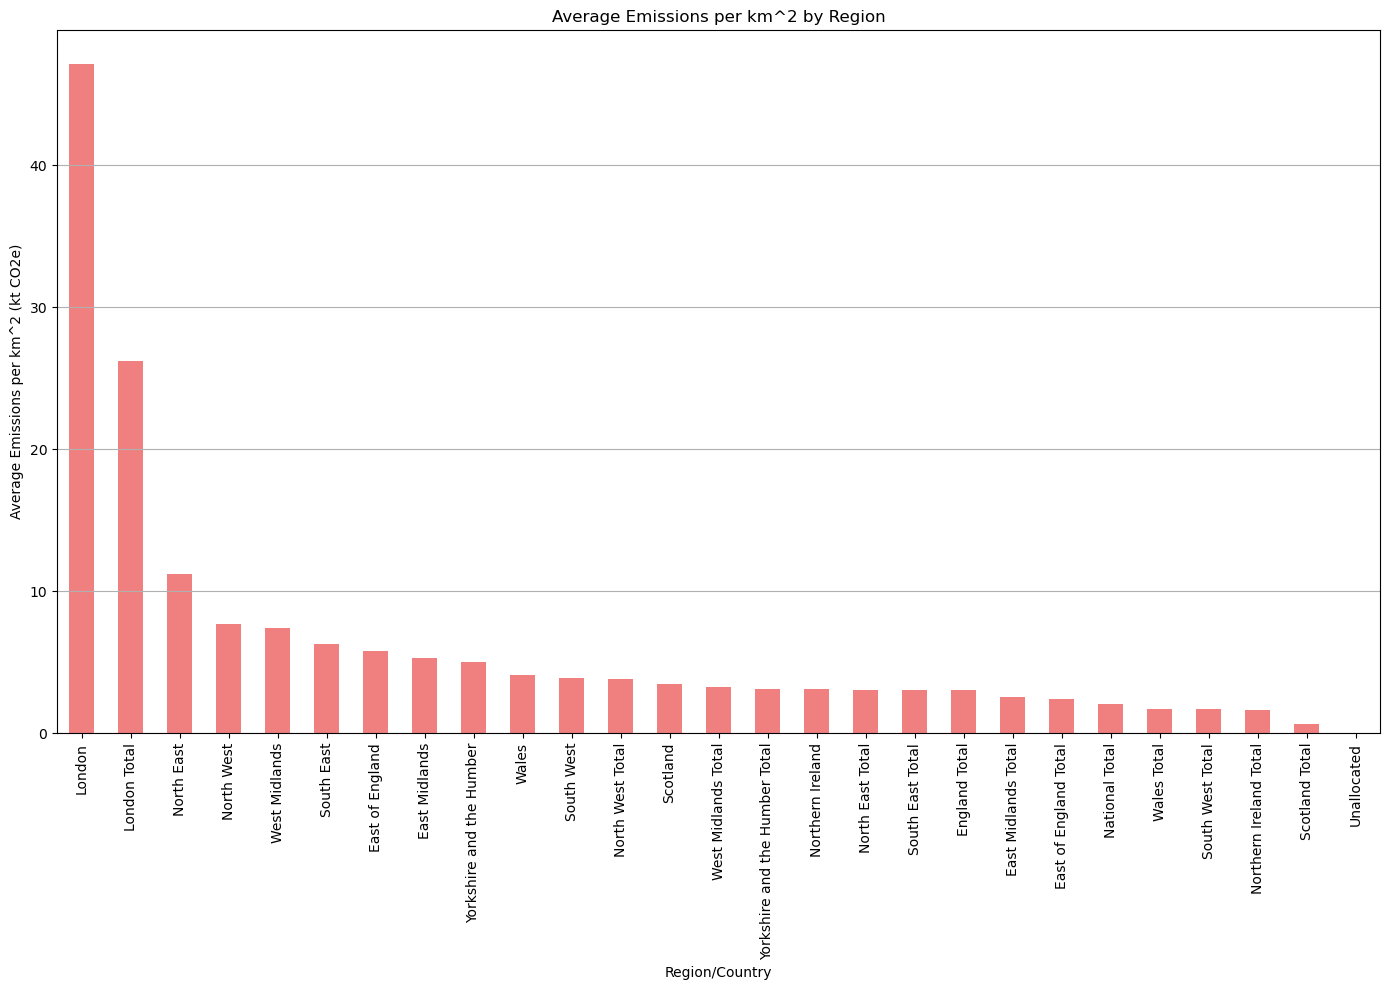

In [82]:
# Sort the regions based on average emissions per km^2
sorted_per_km2 = average_emissions['Emissions per km^2'].sort_values(ascending=False)

# Plotting average emissions per km^2 for each region
plt.figure(figsize=(14, 10))
sorted_per_km2.plot(kind='bar', color='lightcoral')
plt.title('Average Emissions per km^2 by Region')
plt.ylabel('Average Emissions per km^2 (kt CO2e)')
plt.xlabel('Region/Country')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<h3>
The term "Average Emissions per km² by Region" refers to a measure used to understand the density of emissions in a given area. This metric provides an average value of emissions (carbon dioxide, CO2) distributed over the total land area of a region, expressed in square kilometers (km²)<h3/>

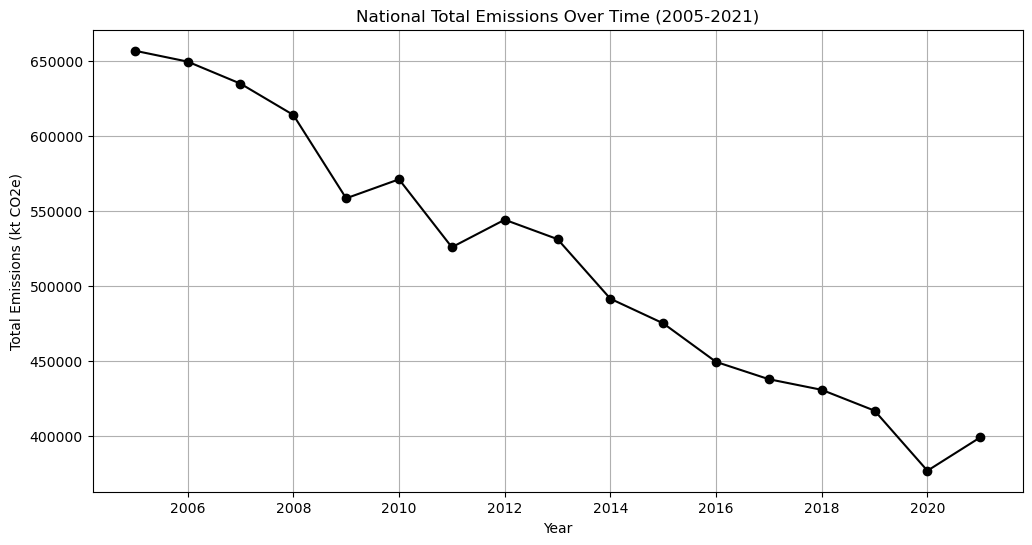

In [83]:
# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the national total emissions time series
plt.figure(figsize=(12, 6))
national_time_series.plot(marker='o', linestyle='-', color='black')
plt.title('National Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()


In [84]:
# Assuming data_1_1_actual is a pandas DataFrame with the relevant data
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']

# Group by 'Calendar Year' and sum the 'Grand Total'
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Convert the Series back to a DataFrame and reset the index
national_time_series_table = national_time_series.reset_index()

# Display the DataFrame as a table
national_time_series_table


Calendar Year    Grand Total
0            2005  656867.315366
1            2006  649603.223057
2            2007  634904.263654
3            2008  614046.665833
4            2009  558455.613837
5            2010  571129.481835
6            2011  525842.800141
7            2012  544172.639988
8            2013  531229.165974
9            2014  491490.767041
10           2015  475077.919255
11           2016  449383.499987
12           2017  437824.383087
13           2018  430745.509283
14           2019  416856.663324
15           2020  376807.810496
16           2021  399046.140782

In [85]:
national_time_series_table['Grand Total'].mean()

515499.05076104676

<Axes: xlabel='Grand Total', ylabel='Count'>

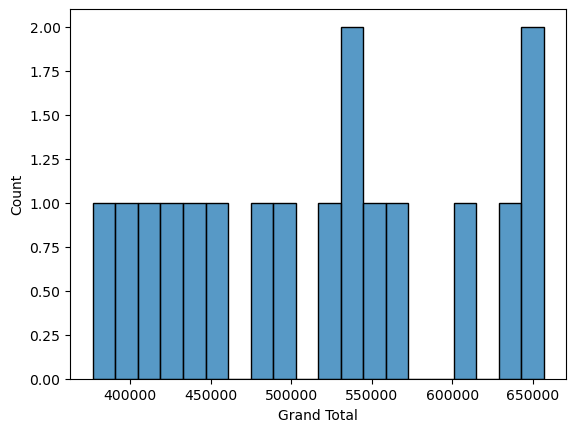

In [86]:
sns.histplot(data=national_time_series_table,x='Grand Total',bins=20)

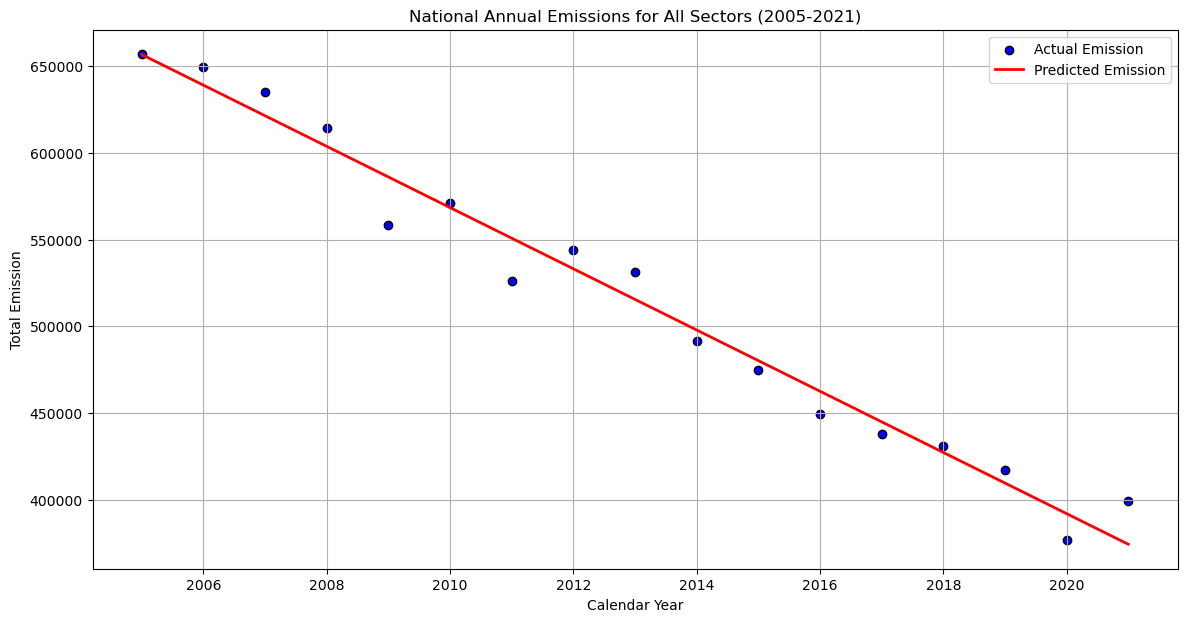

In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Initialize the linear regression model
model = LinearRegression()

# Reshape the data and fit the model
X = national_time_series_table['Calendar Year'].values.reshape(-1, 1)  # Independent variable
y = national_time_series_table['Grand Total'].values  # Dependent variable
model.fit(X, y)

# Make predictions
national_time_series_table['Predicted Emission'] = model.predict(X)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# R^2 score
r_squared = model.score(X, y)

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='blue', edgecolors='black', label='Actual Emission')
plt.plot(X, national_time_series_table['Predicted Emission'], color='red', linewidth=2, label='Predicted Emission')
plt.title('National Annual Emissions for All Sectors (2005-2021)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.grid(True)
plt.legend()
plt.show()


In [88]:
(slope, intercept, r_squared)

(-17644.370521085086, 36033616.90970532, 0.9742324674401649)

In [89]:
import numpy as np

# Predicting the emissions for the year 2024
year_2024 = np.array([[2024]])
emissions_2024 = model.predict(year_2024)
emissions_2024[0]


321410.97502910346

In [90]:
# Predicting the emissions for the year 2022
year_2022 = np.array([[2022]])
emissions_forecast_2022 = model.predict(year_2022)

emissions_forecast_2022[0]


356699.71607127786

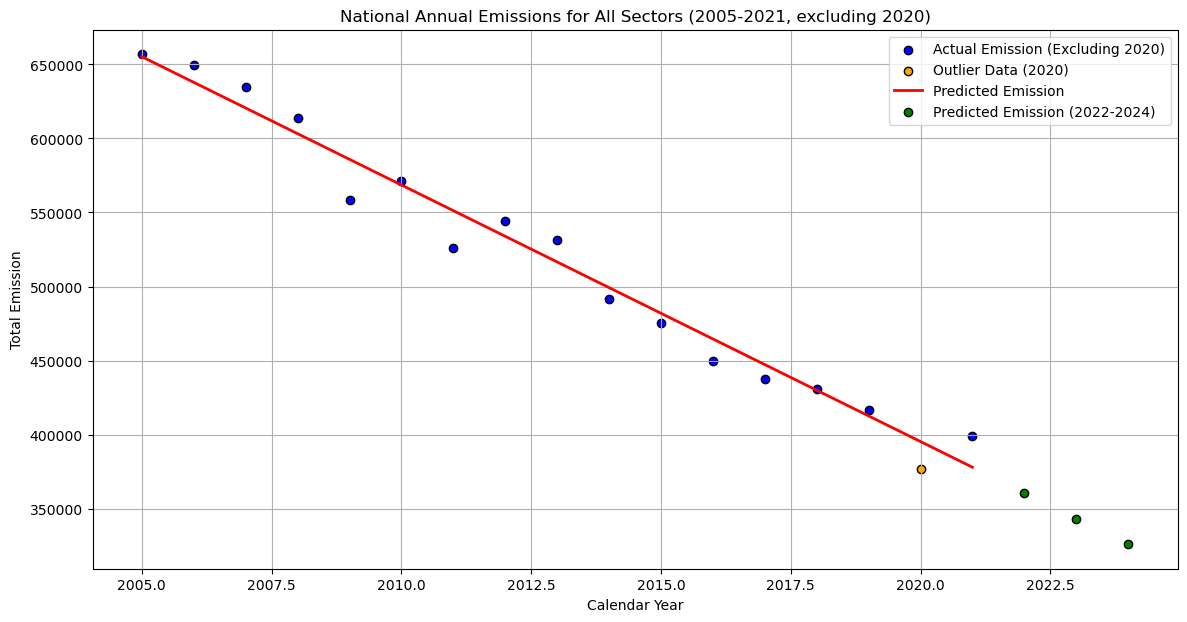

In [91]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Exclude the year 2020 from the dataset for training
training_data = national_time_series_table[national_time_series_table['Calendar Year'] != 2020]

# Initialize the linear regression model
model = LinearRegression()

# Reshape the data and fit the model
X_train = training_data['Calendar Year'].values.reshape(-1, 1)  # Independent variable (excluding 2020)
y_train = training_data['Grand Total'].values  # Dependent variable (excluding 2020)
model.fit(X_train, y_train)

# Make predictions for the entire dataset including 2020
X_full = national_time_series_table['Calendar Year'].values.reshape(-1, 1)
national_time_series_table['Predicted Emission'] = model.predict(X_full)

# Predictions for 2022 to 2024
future_years = np.array([[2022], [2023], [2024]])
future_predictions = model.predict(future_years)

# Coefficients and R^2 score
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X_train, y_train)

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', edgecolors='black', label='Actual Emission (Excluding 2020)')
plt.scatter([2020], national_time_series_table[national_time_series_table['Calendar Year'] == 2020]['Grand Total'], color='orange', edgecolors='black', label='Outlier Data (2020)')
plt.plot(X_full, national_time_series_table['Predicted Emission'], color='red', linewidth=2, label='Predicted Emission')
plt.scatter(future_years, future_predictions, color='green', edgecolors='black', label='Predicted Emission (2022-2024)')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.grid(True)
plt.legend()
plt.show()


In [92]:
# Extracting the predicted emissions for 2022, 2023, and 2024
predicted_2022 = future_predictions[0]
predicted_2023 = future_predictions[1]
predicted_2024 = future_predictions[2]

# Printing the predicted emissions
print(f"Predicted Emissions for 2022: {predicted_2022}")
print(f"Predicted Emissions for 2023: {predicted_2023}")
print(f"Predicted Emissions for 2024: {predicted_2024}")


Predicted Emissions for 2022: 360642.15265548974
Predicted Emissions for 2023: 343314.9896756634
Predicted Emissions for 2024: 325987.82669582963


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating MSE, MAE, and R^2 score using the training data (excluding 2020)
mse = mean_squared_error(y_train, model.predict(X_train))
mae = mean_absolute_error(y_train, model.predict(X_train))
r2 = r2_score(y_train, model.predict(X_train))

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) Score: {r2}")


Mean Squared Error (MSE): 192430790.51198345
Mean Absolute Error (MAE): 11517.010197187687
R-squared (R²) Score: 0.9719953551351934


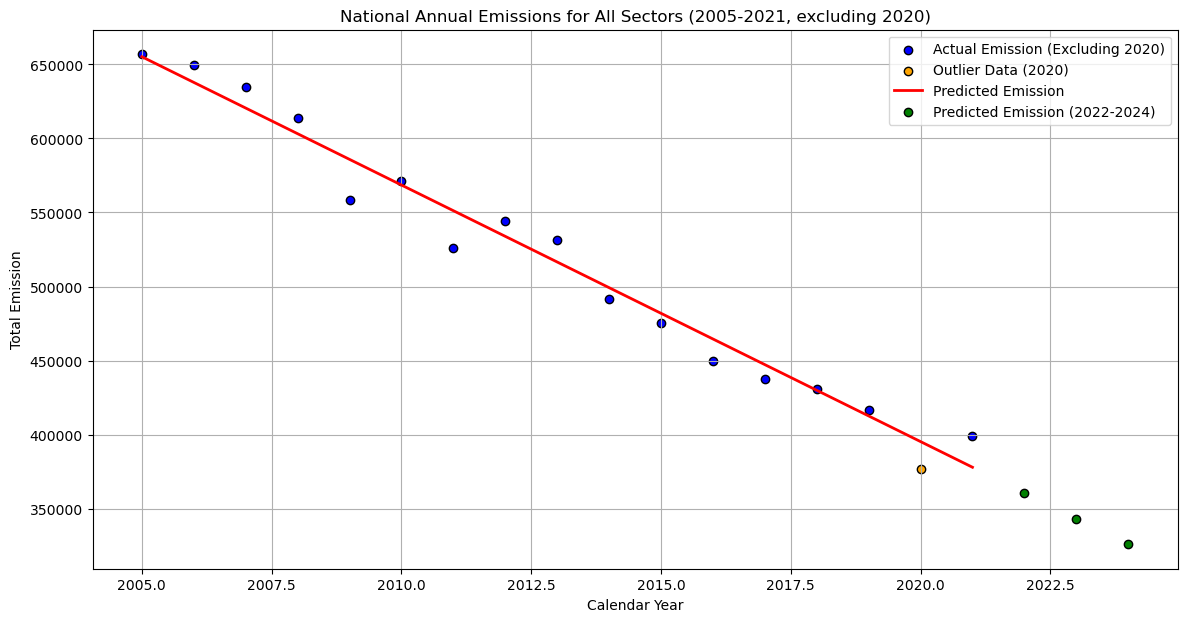

In [94]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Exclude the year 2020 from the dataset for training
training_data = national_time_series_table[national_time_series_table['Calendar Year'] != 2020]

# Reshape the data
X_train = training_data['Calendar Year'].values.reshape(-1, 1)  # Independent variable (excluding 2020)
y_train = training_data['Grand Total'].values  # Dependent variable (excluding 2020)

# It's important to scale features when using SGD
pipeline = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

# Train the SGD model
sgd_model = pipeline.fit(X_train, y_train)

# Make predictions for the entire dataset including 2020
X_full = national_time_series_table['Calendar Year'].values.reshape(-1, 1)
national_time_series_table['Predicted Emission'] = sgd_model.predict(X_full)

# Predictions for 2022 to 2024
future_years = np.array([[2022], [2023], [2024]])
future_predictions = sgd_model.predict(future_years)

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', edgecolors='black', label='Actual Emission (Excluding 2020)')
plt.scatter([2020], national_time_series_table[national_time_series_table['Calendar Year'] == 2020]['Grand Total'], color='orange', edgecolors='black', label='Outlier Data (2020)')
plt.plot(X_full, national_time_series_table['Predicted Emission'], color='red', linewidth=2, label='Predicted Emission')
plt.scatter(future_years, future_predictions, color='green', edgecolors='black', label='Predicted Emission (2022-2024)')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.grid(True)
plt.legend()
plt.show()


In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating the metrics
mse = mean_squared_error(y_train, sgd_model.predict(X_train))
mae = mean_absolute_error(y_train, sgd_model.predict(X_train))
r2 = r2_score(y_train, sgd_model.predict(X_train))

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) Score: {r2}")


Mean Squared Error (MSE): 192431062.62616393
Mean Absolute Error (MAE): 11522.03373838485
R-squared (R²) Score: 0.9719953155341453


In [96]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ValueError: 'y1' is not 1-dimensional

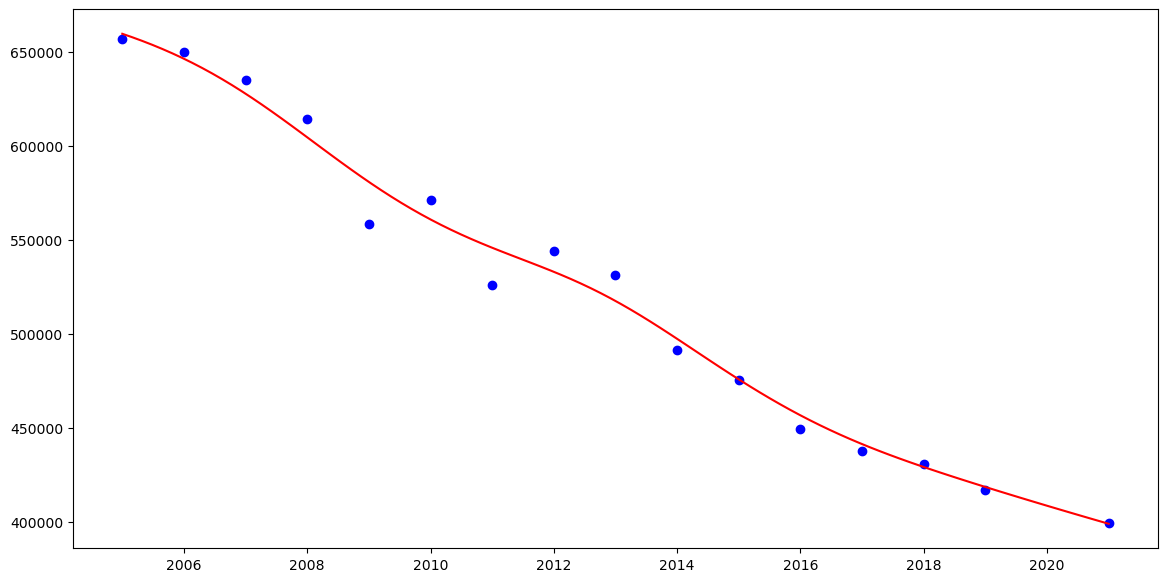

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg


# considering using the data excluding the outlier year 2020
training_data = national_time_series_table[national_time_series_table['Calendar Year'] != 2020]

# Prepare the data
X_train = training_data['Calendar Year'].values
y_train = training_data['Grand Total'].values

# Kernel Regression
kr = KernelReg(endog=y_train, exog=X_train, var_type='c')  # 'c' for continuous
X_predict = np.linspace(X_train.min(), X_train.max(), 100)  # Range of years for prediction
y_kr, y_std = kr.fit(X_predict)

# Plotting the actual data and the kernel regression prediction
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Actual Emissions (Excluding 2020)')
plt.plot(X_predict, y_kr, color='red', label='Kernel Regression Prediction')
plt.fill_between(X_predict, y_kr - y_std, y_kr + y_std, color='red', alpha=0.2, label='Prediction Standard Error')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.grid(True)
plt.show()


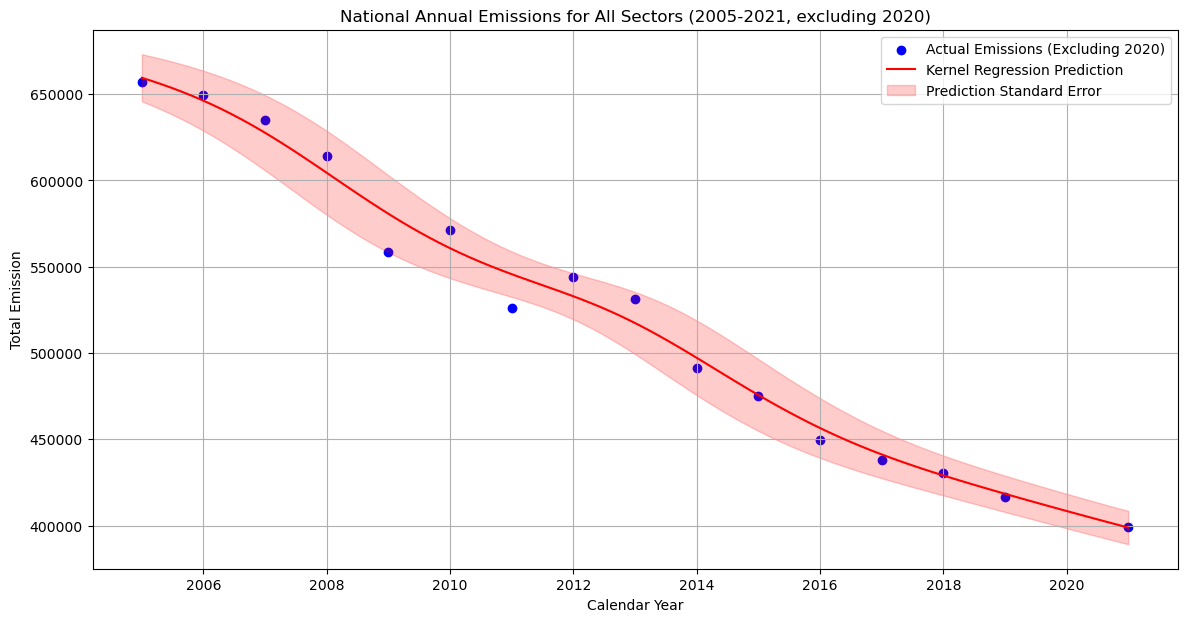

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg


# consider using the data excluding the outlier year 2020
training_data = national_time_series_table[national_time_series_table['Calendar Year'] != 2020]

# Prepare the data
X_train = training_data['Calendar Year'].values
y_train = training_data['Grand Total'].values

# Kernel Regression
kr = KernelReg(endog=y_train, exog=X_train, var_type='c')  # 'c' for continuous
X_predict = np.linspace(X_train.min(), X_train.max(), 100)  # Range of years for prediction
y_kr, y_std = kr.fit(X_predict)

# Ensure that y_std is 1-dimensional
if y_std.ndim > 1:
    y_std = y_std[:,0]

# Plotting the actual data and the kernel regression prediction
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Actual Emissions (Excluding 2020)')
plt.plot(X_predict, y_kr, color='red', label='Kernel Regression Prediction')
plt.fill_between(X_predict, y_kr - y_std, y_kr + y_std, color='red', alpha=0.2, label='Prediction Standard Error')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on the training data
y_pred_train, _ = kr.fit(X_train)

# Calculating MSE and MAE
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared is not typically used with non-parametric models like kernel regression


Mean Squared Error (MSE): 98854665.3250709
Mean Absolute Error (MAE): 7560.483432559937


In [100]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a range of bandwidths to test
bandwidths = np.linspace(0.1, 2, 20)

# Best bandwidth and score initialization
best_bandwidth = None
best_score = float('inf')

# K-Fold for cross-validation
kf = KFold(n_splits=5)

for bandwidth in bandwidths:
    mse_scores = []
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
        y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]

        # Kernel Regression with the current bandwidth
        kr = KernelReg(endog=y_train_kf, exog=X_train_kf, var_type='c', bw=[bandwidth])
        y_pred_kf, _ = kr.fit(X_test_kf)

        # Calculate MSE for this fold
        mse = mean_squared_error(y_test_kf, y_pred_kf)
        mse_scores.append(mse)

    # Average MSE score for this bandwidth
    avg_mse = np.mean(mse_scores)
    if avg_mse < best_score:
        best_score = avg_mse
        best_bandwidth = bandwidth

# Best bandwidth
print(f"Best Bandwidth: {best_bandwidth}")


Best Bandwidth: 2.0


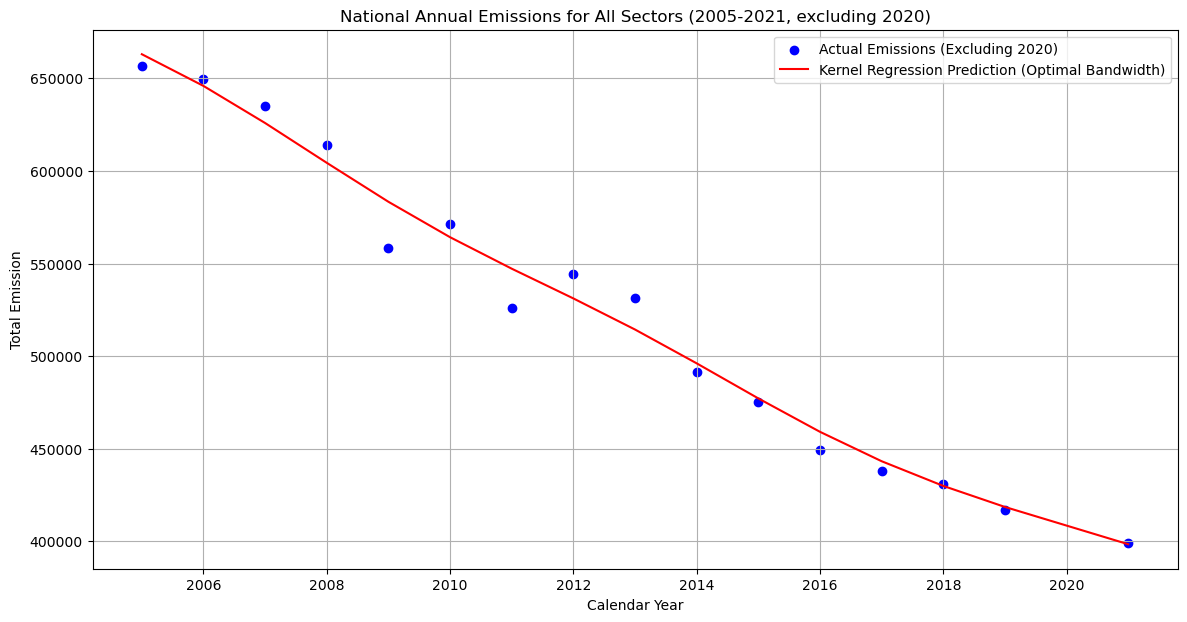

In [101]:
# Fitting the Kernel Regression model with the best bandwidth
kr_optimal = KernelReg(endog=y_train, exog=X_train, var_type='c', bw=[best_bandwidth])
y_pred_optimal, _ = kr_optimal.fit(X_train)

# Plotting
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Actual Emissions (Excluding 2020)')
plt.plot(X_train, y_pred_optimal, color='red', label='Kernel Regression Prediction (Optimal Bandwidth)')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Making predictions on the training data using the optimal bandwidth model
y_pred_optimal, _ = kr_optimal.fit(X_train)

# Calculating MSE and MAE
mse_optimal = mean_squared_error(y_train, y_pred_optimal)
mae_optimal = mean_absolute_error(y_train, y_pred_optimal)

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse_optimal}")
print(f"Mean Absolute Error (MAE): {mae_optimal}")


Mean Squared Error (MSE): 122452257.76925193
Mean Absolute Error (MAE): 8541.347118299673


Mean Squared Error (MSE): 122454007.79715711
Mean Absolute Error (MAE): 8541.433550188416


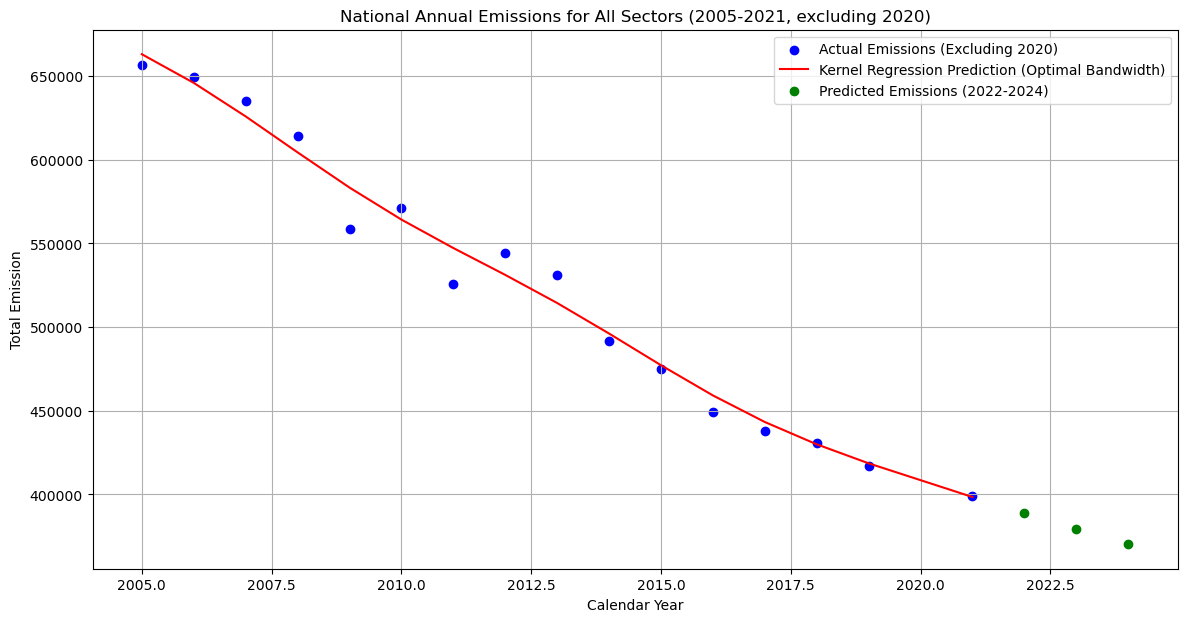

Predicted Emissions for 2022: 388856.10498873936
Predicted Emissions for 2023: 379455.740414524
Predicted Emissions for 2024: 370225.2050343957


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Creating a sample DataFrame based on the data
data = {
    'Calendar Year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021],
    'Grand Total': [
        656867, 649603, 634904, 614046, 558455, 571129, 525842, 544172, 531229, 491490, 475077, 449383, 437824, 430745, 416856, 399046
    ]
}
national_time_series_table = pd.DataFrame(data)

# Exclude the year 2020 from the dataset for training
training_data = national_time_series_table

# Prepare the data
X_train = training_data['Calendar Year'].values
y_train = training_data['Grand Total'].values

# Best bandwidth (as obtained from previous grid search)
best_bandwidth = 2.0

# Kernel Regression with the optimal bandwidth
kr_optimal = KernelReg(endog=y_train, exog=X_train, var_type='c', bw=[best_bandwidth])
y_pred_optimal, _ = kr_optimal.fit(X_train)

# Calculating MSE and MAE
mse_optimal = mean_squared_error(y_train, y_pred_optimal)
mae_optimal = mean_absolute_error(y_train, y_pred_optimal)

# Predicting emissions for 2022, 2023, and 2024
future_years = np.array([2022, 2023, 2024]).reshape(-1, 1)
future_predictions, _ = kr_optimal.fit(future_years)

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse_optimal}")
print(f"Mean Absolute Error (MAE): {mae_optimal}")

# Plotting the actual data, kernel regression prediction, and future predictions
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Actual Emissions (Excluding 2020)')
plt.plot(X_train, y_pred_optimal, color='red', label='Kernel Regression Prediction (Optimal Bandwidth)')
plt.scatter(future_years, future_predictions, color='green', marker='o', label='Predicted Emissions (2022-2024)')
plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.grid(True)
plt.show()

# Print predicted emissions for 2022, 2023, and 2024
for year, prediction in zip(range(2022, 2025), future_predictions):
    print(f"Predicted Emissions for {year}: {prediction}")


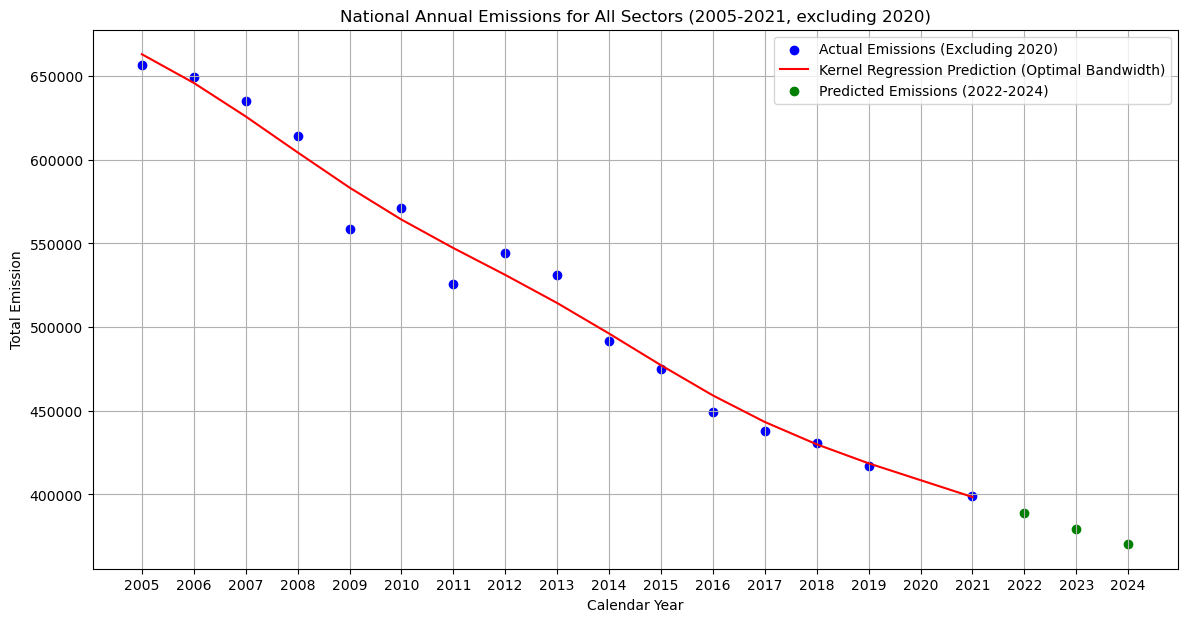

Predicted Emissions for 2022: 388856.10498873936
Predicted Emissions for 2023: 379455.740414524
Predicted Emissions for 2024: 370225.2050343957


In [104]:
# Plotting the actual data, kernel regression prediction, and future predictions
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='blue', label='Actual Emissions (Excluding 2020)')
plt.plot(X_train, y_pred_optimal, color='red', label='Kernel Regression Prediction (Optimal Bandwidth)')
plt.scatter(future_years, future_predictions, color='green', marker='o', label='Predicted Emissions (2022-2024)')

# Adjust x-axis to show each year
plt.xticks(np.arange(min(X_train), max(future_years) + 1, 1.0))

plt.title('National Annual Emissions for All Sectors (2005-2021, excluding 2020)')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.grid(True)
plt.show()

# Print predicted emissions for 2022, 2023, and 2024
for year, prediction in zip(range(2022, 2025), future_predictions):
    print(f"Predicted Emissions for {year}: {prediction}")


In [ ]:
from sklearn.kernel_ridge import KernelRidge


# X = national_time_series_table['Calendar Year'].values.reshape(-1, 1)  # Independent variable
# y = national_time_series_table['Grand Total'].values  # Dependent variable


X = national_time_series_table['Calendar Year'].values.reshape(-1, 1)  # Independent variable 
y = national_time_series_table['Total Emission'].values  # Dependent variable 

# Initialize Kernel Ridge Regression model with a radial basis function (RBF) kernel
kernel_model = KernelRidge(kernel='rbf')

# Fit the model to the data
kernel_model.fit(X, y)

# Predict using the model
national_time_series_table['Predicted Emission Kernel'] = kernel_model.predict(X)

# Plot the original data and the kernel regression fit
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='black', label='Actual Emission')
plt.plot(X, df['Predicted Emission Kernel'], color='green', linestyle='--', linewidth=2, label='Kernel Regression')
plt.title('West Midlands Region Annual Emissions for All Sectors (2005-2021) - Kernel Regression Fit')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.show()


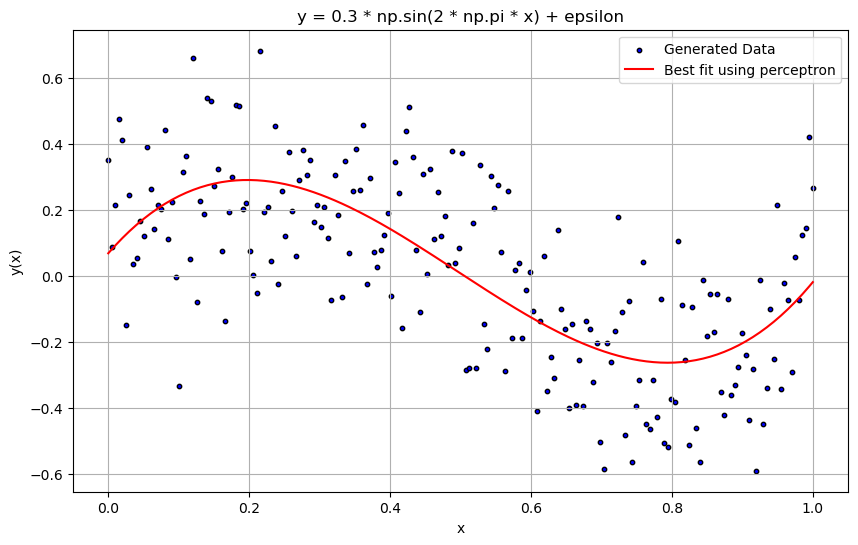

w3 = 5.22, w2 = -7.76, w1 = 2.46, w0 = 0.07


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate the data set
num_points = 200
x = np.linspace(0, 1, num_points)
np.random.seed(0)  # for reproducibility
epsilon = np.random.normal(0, 0.2, num_points)
y = 0.3 * np.sin(2 * np.pi * x) + epsilon

# Construct the design matrix
X = np.column_stack([x**3, x**2, x, np.ones_like(x)])

# Train the perceptron (here, linear regression)
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, color='blue', label='Generated Data', edgecolors='black')
plt.plot(x, y_pred, color='red', label='Best fit using perceptron')
plt.title('y = 0.3 * np.sin(2 * np.pi * x) + epsilon')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid(True)
plt.show()

# Print the weights
weights = model.coef_
print(f"w3 = {weights[0]:.2f}, w2 = {weights[1]:.2f}, w1 = {weights[2]:.2f}, w0 = {weights[3]:.2f}")


<h1>ARIMA<h1/>

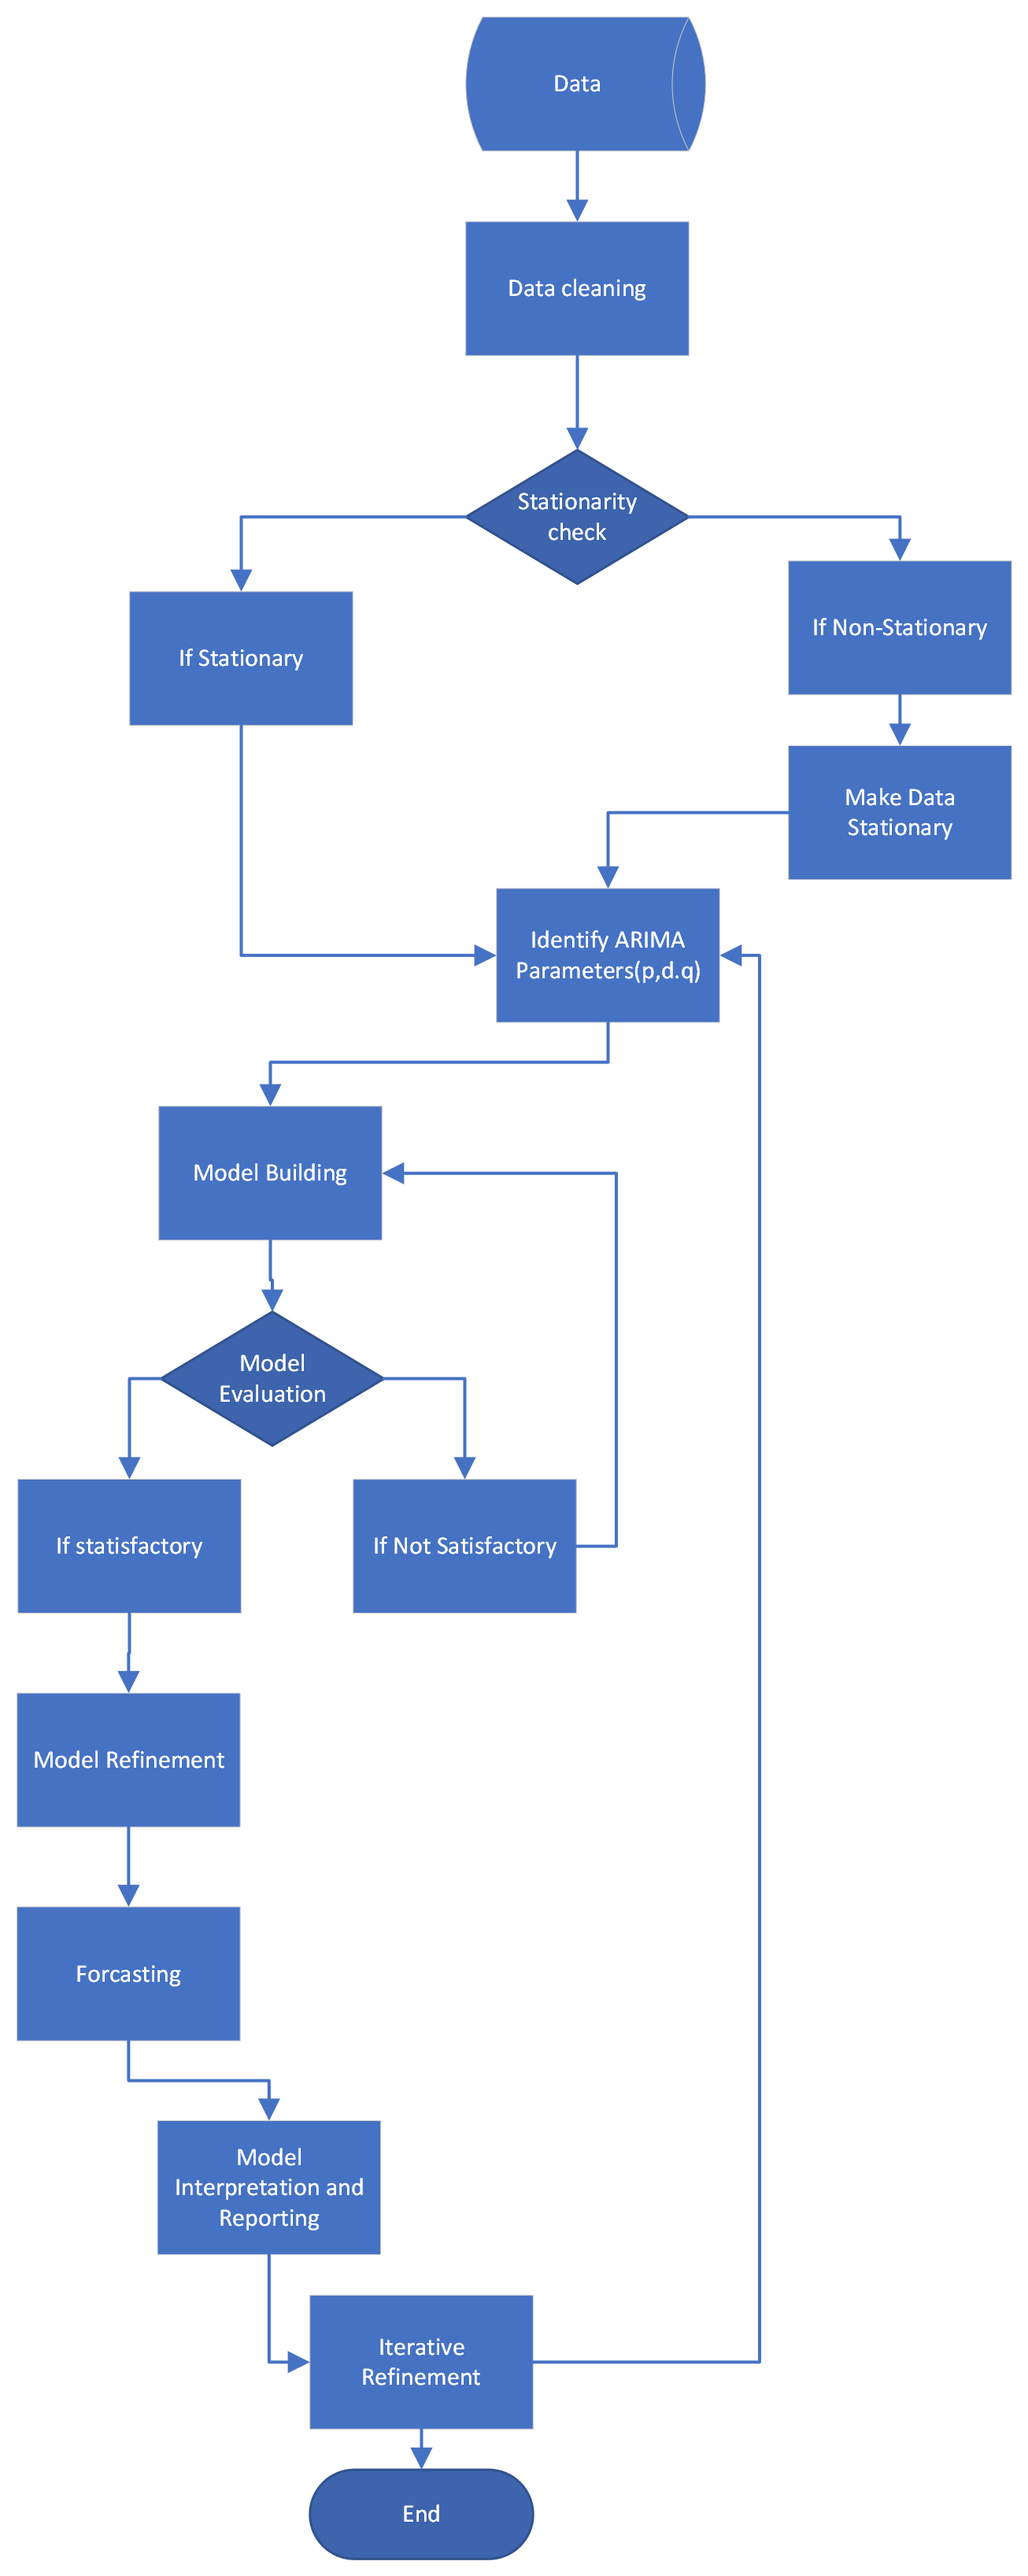

In [107]:
import pandas as pd

# Load the provided Excel file
file_path = 'book_auarterly emissions.csv'
data = pd.read_csv(file_path)

data


NC Sector  Q1 2008  Q2 2008  Q3 2008  Q4 2008  \
0                    Energy supply     58.3     49.7     46.5     58.4   
1                         Business     26.8     21.1     17.5     23.2   
2                        Transport     33.4     32.9     32.8     31.5   
3                           Public      3.4      2.3      1.2      2.8   
4                      Residential     31.0     13.3      7.3     26.7   
5           Other sectors [note 8]      4.6      4.4      4.3      4.3   
6                        Total CO2    157.5    123.9    109.6    146.9   
7  Other greenhouse gases [note 6]     29.5     29.5     29.5     29.5   
8   Total greenhouse gas emissions    187.0    153.4    139.1    176.4   

   Q1 2009  Q2 2009  Q3 2009  Q4 2009  Q1 2010  ...  Q3 2020  Q4 2020  \
0     58.3     41.7     39.4     50.5     55.3  ...     18.9     20.8   
1     23.2     16.5     15.7     20.4     23.5  ...     13.3     16.8   
2     30.9     31.9     32.2     30.6     29.6  ...     25.6     26.1   
3      2.8      1.8      1.4      2.9      3.0  ...      1.0      2.1   
4     31.0     11.3      7.2     25.6     34.8  ...      5.2     22.5   
5      3.0      2.9      2.9      3.0      3.1  ...      2.2      2.3   
6    149.3    106.1     98.7    133.0    149.2  ...     66.2     90.6   
7     28.0     28.0     28.0     28.0     27.0  ...     21.9     21.9   
8    177.3    134.1    126.7    161.0    176.2  ...     88.2    112.5   

   Q1 2021  Q2 2021  Q3 2021  Q4 2021  Q1 2022  Q2 2022  Q3 2022  Q4 2022  
0     21.6     19.1     19.6     20.5     20.6     19.9     21.3     20.3  
1     19.3     14.9     13.4     16.9     18.9     13.8     12.9     16.4  
2     21.9     27.5     29.5     29.5     27.0     29.5     28.2     27.8  
3      2.8      1.3      1.1      2.3      2.8      1.3      1.2      2.3  
4     28.3     13.8      4.9     20.5     24.0      9.8      4.8     17.9  
5      2.7      2.6      2.6      2.8      2.8      2.6      2.6      2.9  
6     96.6     79.3     71.1     92.6     96.0     77.0     70.9     87.6  
7     21.7     21.7     21.7     21.7     21.4     21.4     21.4     21.4  
8    118.4    101.0     92.8    114.3    117.4     98.4     92.3    109.0  

[9 rows x 61 columns]

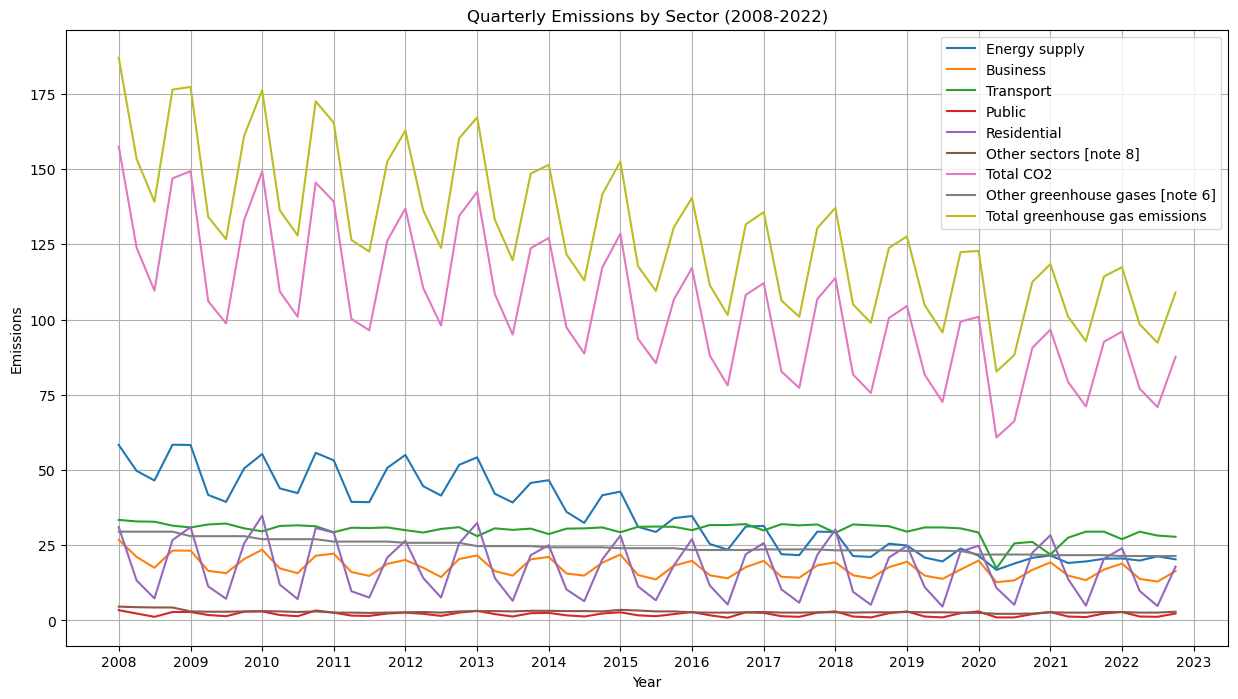

In [108]:
from datetime import datetime
import matplotlib.dates as mdates
data_long = pd.melt(data, id_vars=['NC Sector'], var_name='Quarter', value_name='Emissions')


# Correcting the function for converting quarter strings to datetime objects
def quarter_to_datetime(quarter_str):
    parts = quarter_str.split()
    year = int(parts[1])
    quarter = int(parts[0][1])
    month = (quarter - 1) * 3 + 1
    return datetime(year, month, 1)

# Applying the corrected conversion function
data_long['Quarter'] = data_long['Quarter'].apply(quarter_to_datetime)

# Plotting the data
plt.figure(figsize=(15, 8))
for sector in data_long['NC Sector'].unique():
    sector_data = data_long[data_long['NC Sector'] == sector]
    plt.plot(sector_data['Quarter'], sector_data['Emissions'], label=sector)

plt.title('Quarterly Emissions by Sector (2008-2022)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.legend()
plt.grid(True)
plt.show()



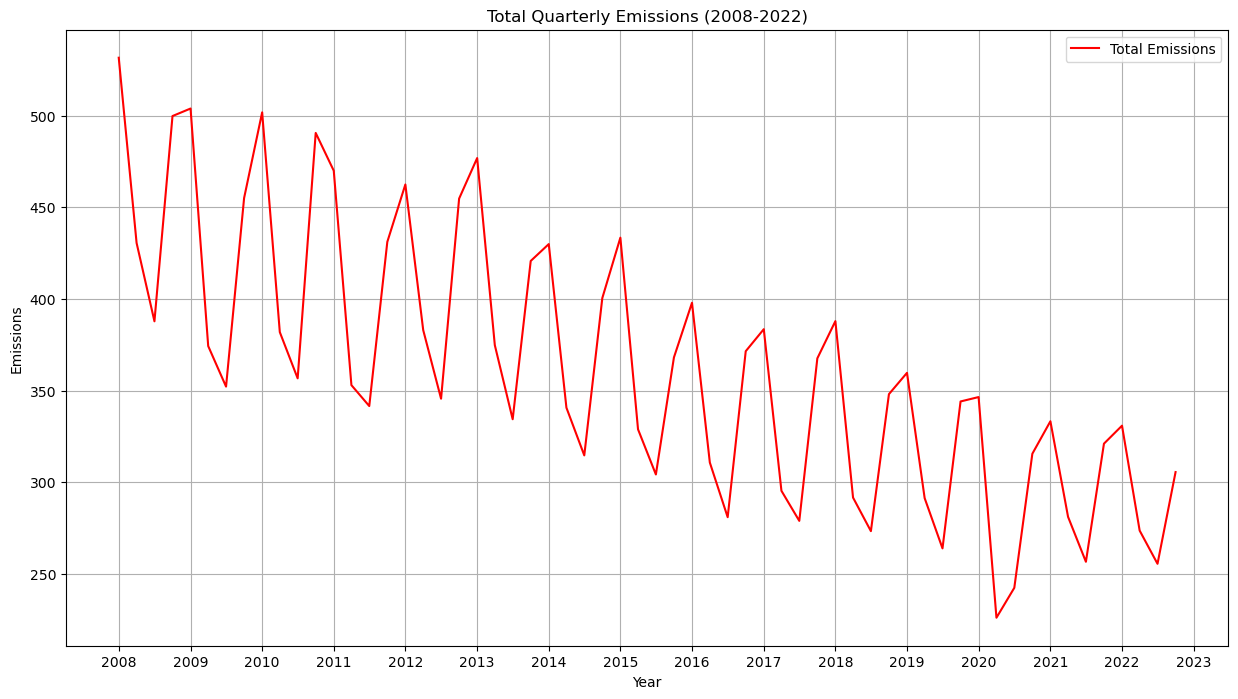

In [109]:
# Calculating total emissions per quarter
total_emissions = data_long.groupby('Quarter').sum()

# Plotting the total emissions
plt.figure(figsize=(15, 8))
plt.plot(total_emissions.index, total_emissions['Emissions'], label='Total Emissions', color='red')

plt.title('Total Quarterly Emissions (2008-2022)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.legend()
plt.show()


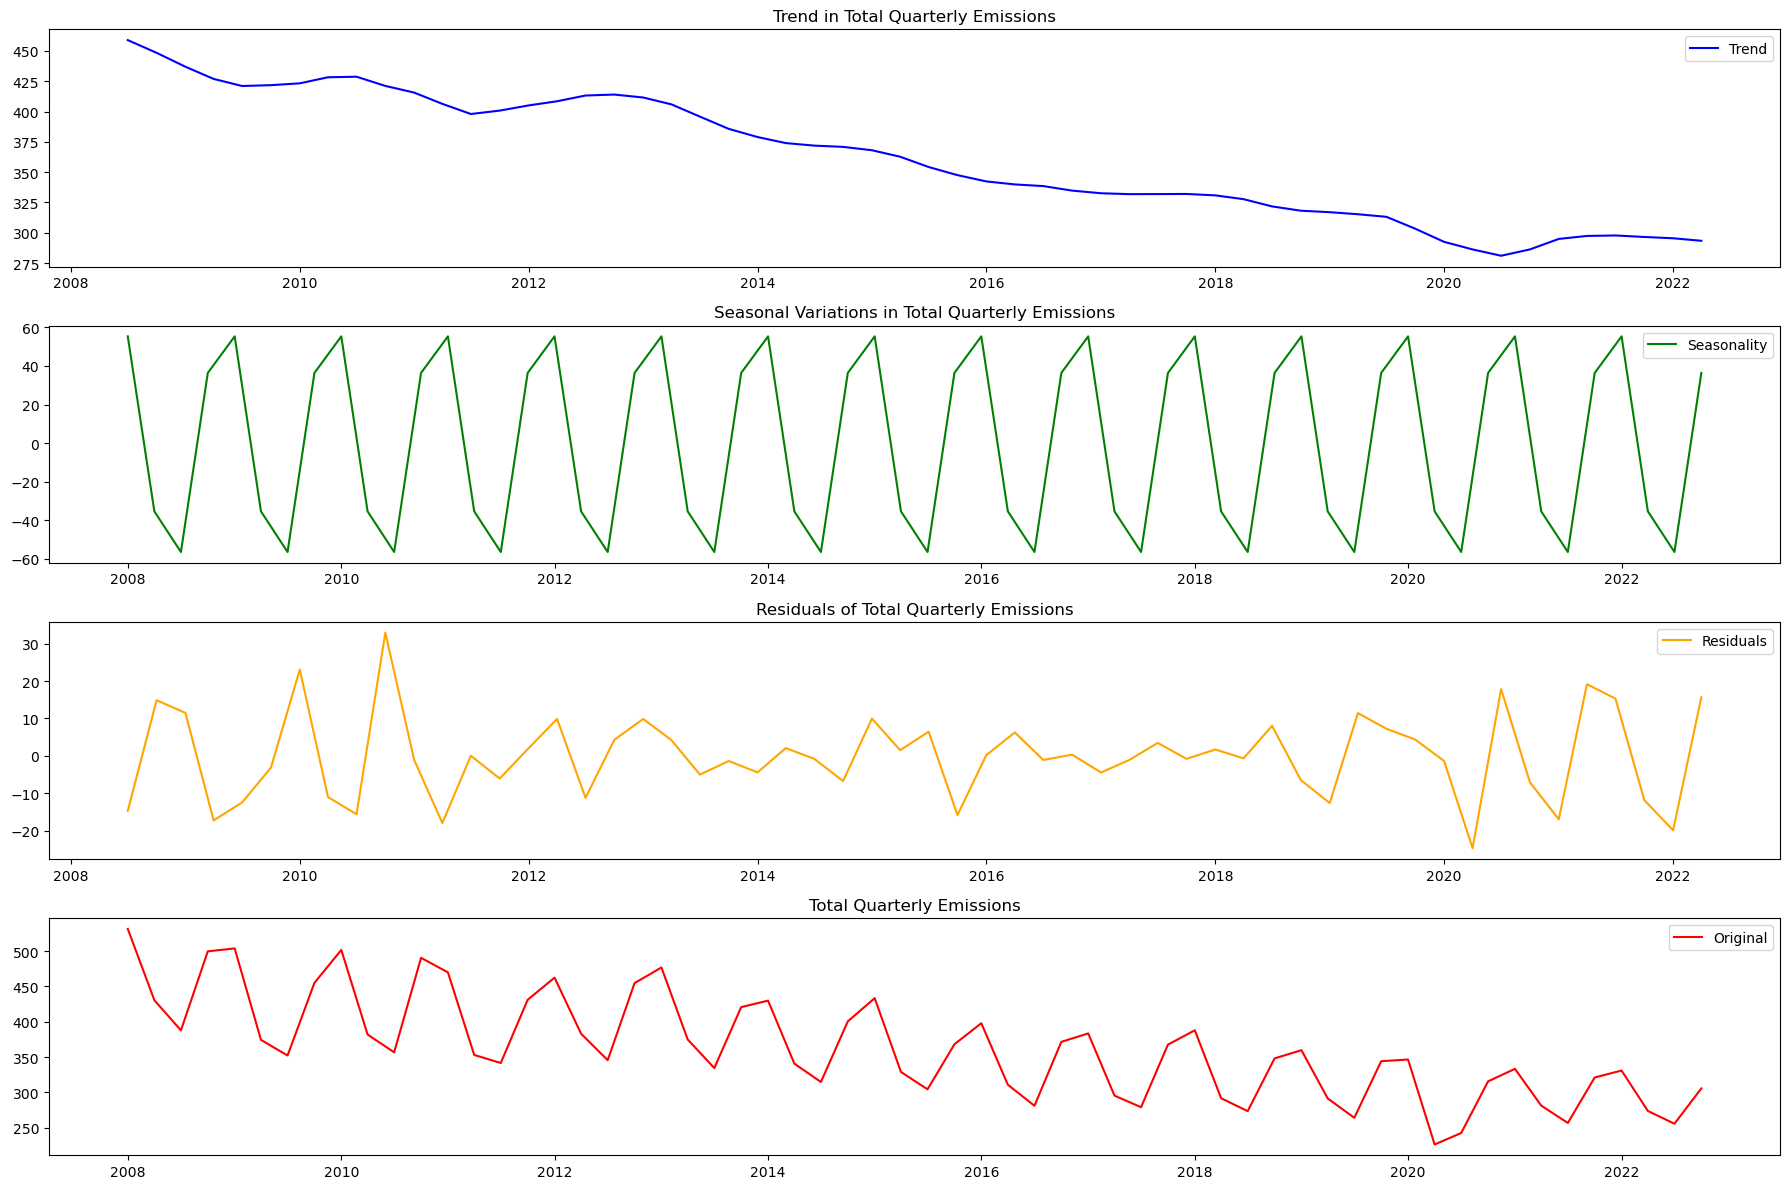

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing a seasonal decomposition of total emissions
decomposition = seasonal_decompose(total_emissions['Emissions'], model='additive', period=4)

# Extracting the trend, seasonal, and residual components
trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal
residual = decomposition.resid.dropna()

# Plotting the decomposition
plt.figure(figsize=(18, 12))

# Trend
plt.subplot(411)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.title('Trend in Total Quarterly Emissions')

# Seasonal
plt.subplot(412)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonal Variations in Total Quarterly Emissions')

# Residual
plt.subplot(413)
plt.plot(residual, label='Residuals', color='orange')
plt.legend(loc='best')
plt.title('Residuals of Total Quarterly Emissions')

# Original
plt.subplot(414)
plt.plot(total_emissions['Emissions'], label='Original', color='red')
plt.legend(loc='best')
plt.title('Total Quarterly Emissions')

plt.tight_layout()
plt.show()


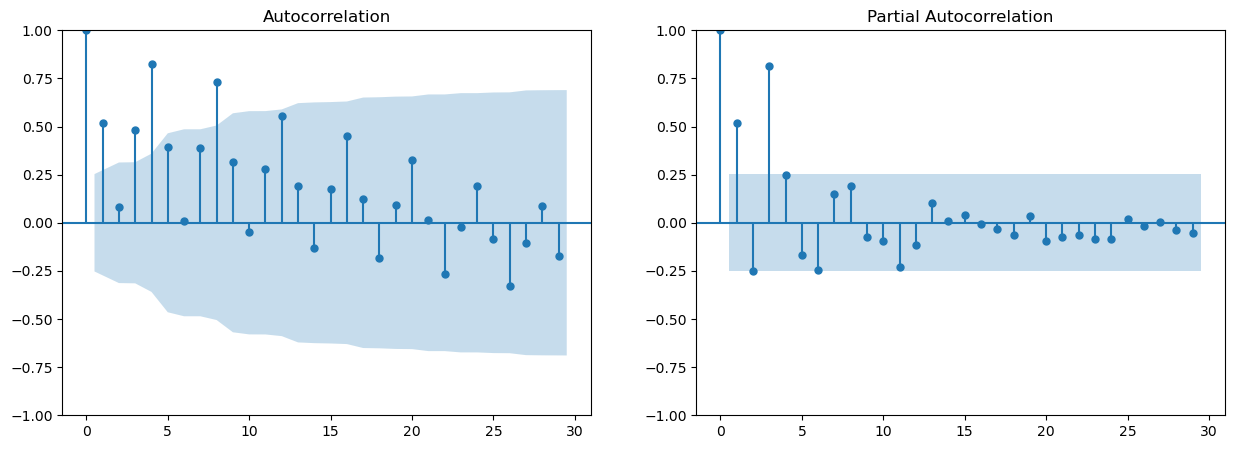

In [111]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Correcting the number of lags to half of the total data points
max_lags = len(total_emissions) // 2 - 1

# Plotting ACF and PACF with the corrected number of lags
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the ACF
plot_acf(total_emissions['Emissions'], lags=max_lags, ax=axes[0])

# Plot the PACF
plot_pacf(total_emissions['Emissions'], lags=max_lags, ax=axes[1])

plt.show()


In [112]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Testing for stationarity with the Augmented Dickey-Fuller test
adf_test = adfuller(total_emissions['Emissions'])

# If p-value is greater than 0.05, we conclude that the time series is not stationary
if adf_test[1] > 0.05:
    # Taking the first difference to make the series stationary
    total_emissions['Emissions_diff'] = total_emissions['Emissions'].diff().dropna()
else:
    total_emissions['Emissions_diff'] = total_emissions['Emissions']

# Running the ADF test on the differenced series
adf_test_diff = adfuller(total_emissions['Emissions_diff'].dropna())

# Assuming an ARIMA model with 1 AR term (from PACF) and 1 MA term (from ACF)
# The differencing order is 1 if needed to difference, otherwise, it's 0.
d = 1 if adf_test[1] > 0.05 else 0
p = 1 # from PACF
q = 1 # from ACF

# Fit the ARIMA model
arima_model = ARIMA(total_emissions['Emissions'], order=(p, d, q))
arima_result = arima_model.fit()

# Summary of the model
arima_summary = arima_result.summary()
arima_summary


c:\ProgramData\anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda_3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Emissions   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -321.549
Date:                Thu, 11 Jan 2024   AIC                            649.099
Time:                        08:42:31   BIC                            655.331
Sample:                    01-01-2008   HQIC                           651.532
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1138      0.170      0.669      0.503      -0.220       0.447
ma.L1         -0.8330      0.132     -6.296      0.000      -1.092      -0.574
sigma2      3122.7480   1132.184      2.758      0.006     903.707    5341.789
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 6.42
Prob(Q):                              0.83   Prob(JB):                         0.04
Heteroskedasticity (H):               0.47   Skew:                            -0.00
Prob(H) (two-sided):                  0.10   Kurtosis:                         1.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h2>ARIMA(AutoRegressive Integrated Moving Average) Model Output Analysis</h2>

<ol>
	<li><strong>Dep. Variable: Emissions</strong>: The dependent variable (the variable being predicted) is 'Emissions'.</li>
	<li><strong>No. Observations: 60</strong>: There are 60 data points or observations in the time series.</li>
	<li><strong>Model: ARIMA(1, 1, 1)</strong>: The ARIMA model used has parameters (p=1, d=1, q=1).
		<ul>
			<li><strong>p (AR term):</strong> 1 indicates one lag is used in the autoregressive part.</li>
			<li><strong>d (Differencing):</strong> 1 signifies that the data has been first-differenced once to make it stationary.</li>
			<li><strong>q (MA term):</strong> 1 indicates the moving average part is based on one lagged forecast error.</li>
		</ul>
	</li>
	<li><strong>Log Likelihood: -321.549</strong>: This is the log likelihood of the model, a measure of the model's goodness of fit.</li>
	<li><strong>AIC: 649.099</strong>: The Akaike Information Criterion, a measure of the model’s quality. Lower AIC values suggest a better model.</li>
	<li><strong>BIC: 655.331</strong>: The Bayesian Information Criterion, another measure of model fit. Like AIC, lower is better.</li>
	<li><strong>HQIC: 651.532</strong>: Hannan-Quinn Information Criterion, another criterion for model selection.</li>
	<li><strong>coef (Coefficients):</strong>
		<ul>
			<li><strong>ar.L1 (0.1138)</strong>: The coefficient for the AR part of the model, suggesting a mild positive relationship.</li>
			<li><strong>ma.L1 (-0.8330)</strong>: The coefficient for the MA part, indicating a strong negative relationship.</li>
		</ul>
	</li>
	<li><strong>P>|z|</strong>: P-values for the AR and MA coefficients. Values less than 0.05 typically suggest statistical significance. Here, the MA part is significant.</li>
	<li><strong>[0.025 0.975]</strong>: The 95% confidence interval for the coefficients.</li>
	<li><strong>sigma2 (3122.7480)</strong>: The variance of the residuals.</li>
	<li><strong>Diagnostics:</strong>
		<ul>
			<li><strong>Ljung-Box Test</strong>: A test for autocorrelation in residuals. A high p-value (here, 0.83) suggests no autocorrelation, which is good.</li>
			<li><strong>Jarque-Bera Test</strong>: A test for normality of residuals. A low p-value (here, 0.04) suggests non-normality, which could be a concern.</li>
			<li><strong>Heteroskedasticity Test</strong>: A test for constant variance of residuals. A low p-value (here, 0.10) suggests potential heteroskedasticity.</li>
		</ul>
	</li>
	<li><strong>Skew and Kurtosis</strong>: Measures of the shape of the residual distribution. The skewness is close to 0 (ideal), but the kurtosis is quite low, indicating a flat distribution.</li>
</ol>
<p>Overall, this ARIMA model seems to fit the data reasonably well, especially given the significant MA coefficient and the lack of autocorrelation in the residuals. However, the potential non-normality and heteroskedasticity in the residuals, as indicated by the Jarque-Bera and Heteroskedasticity tests, might be areas to explore for improving the model.</p>


<h2>ARIMA Model Output Analysis</h2>

<p><strong>Dep. Variable: Emissions:</strong> The dependent variable (the variable being predicted) is 'Emissions'.</p>
<p><strong>No. Observations: 60:</strong> There are 60 data points or observations in the time series.</p>
<p><strong>Model: ARIMA(1, 1, 1):</strong> The ARIMA model used has parameters (p=1, d=1, q=1).
	<ul>
		<li><strong>p (AR term):</strong> 1 indicates one lag is used in the autoregressive part.</li>
		<li><strong>d (Differencing):</strong> 1 signifies that the data has been first-differenced once to make it stationary.</li>
		<li><strong>q (MA term):</strong> 1 indicates the moving average part is based on one lagged forecast error.</li>
	</ul>
</p>

In [114]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grid = {
    'kernelridge__alpha': [0.1, 1, 10],
    'kernelridge__gamma': np.logspace(-2, 2, 5)
}

# Create a pipeline with polynomial features and kernel ridge regression
kr_model = KernelRidge(kernel='rbf')

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(make_pipeline(kr_model), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Best parameters found
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict using the best model
df['Best Predicted Emission Kernel'] = grid_search.predict(X)

# Plot the original data and the best kernel regression fit
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='black', label='Actual Emission')
plt.plot(X, df['Best Predicted Emission Kernel'], color='orange', linestyle='--', linewidth=2, label='Optimized Kernel Regression')
plt.title('West Midlands Region Annual Emissions for All Sectors (2005-2021) - Optimized Kernel Regression Fit')
plt.xlabel('Calendar Year')
plt.ylabel('Total Emission')
plt.legend()
plt.show()

(best_params, best_score)


NameError: name 'df' is not defined

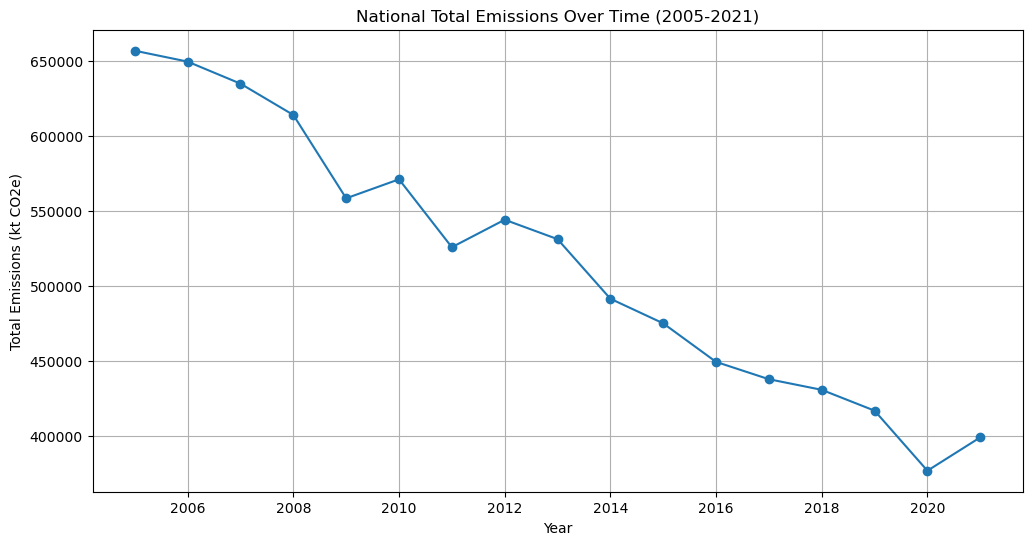

In [115]:
# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions again
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the national total emissions time series
plt.figure(figsize=(12, 6))
national_time_series.plot(marker='o', linestyle='-')
plt.title('National Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()


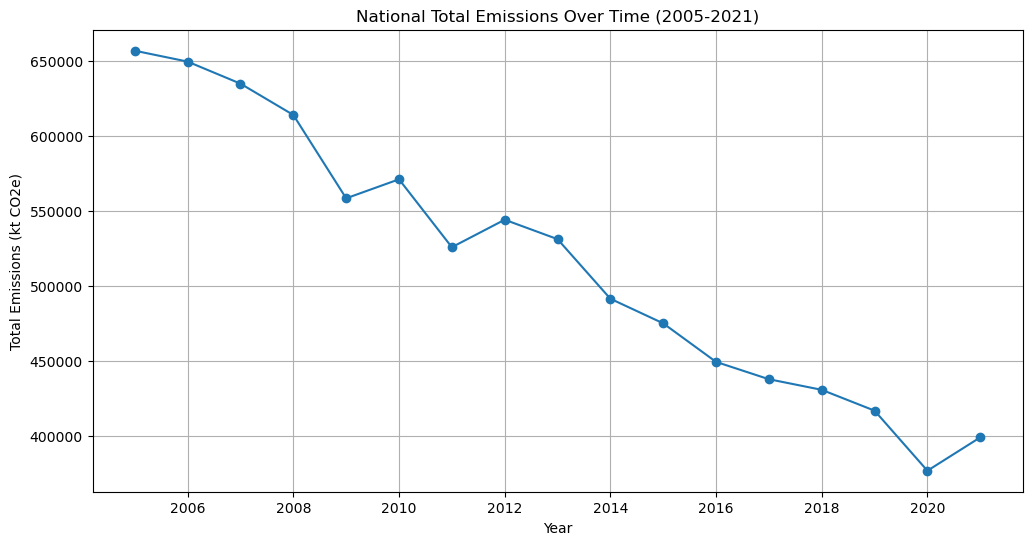

In [116]:
# Reload the data from the '1_1' sheet
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the national total emissions time series
plt.figure(figsize=(12, 6))
national_time_series.plot(marker='o', linestyle='-')
plt.title('National Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()


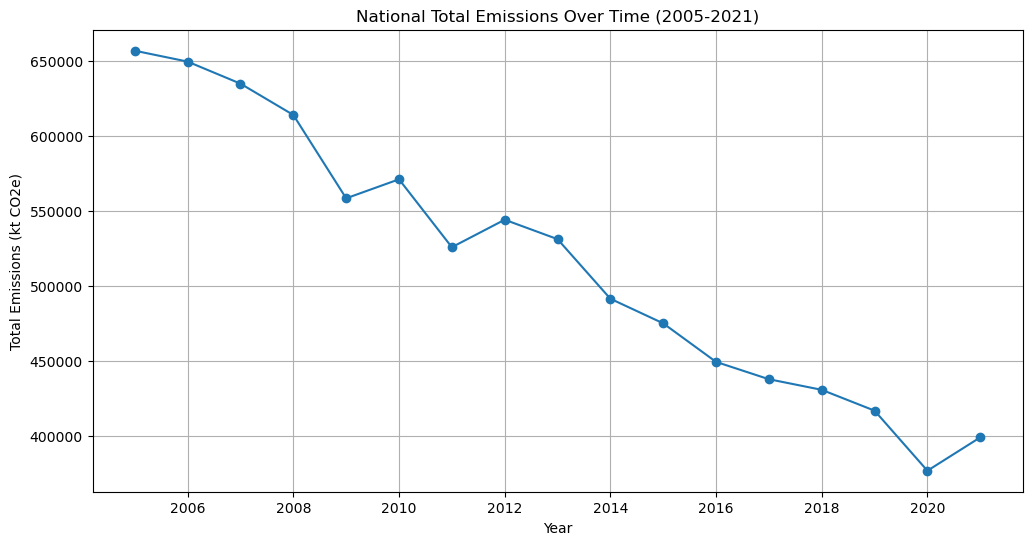

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the data from the '1_1' sheet
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the national total emissions time series
plt.figure(figsize=(12, 6))
national_time_series.plot(marker='o', linestyle='-')
plt.title('National Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()


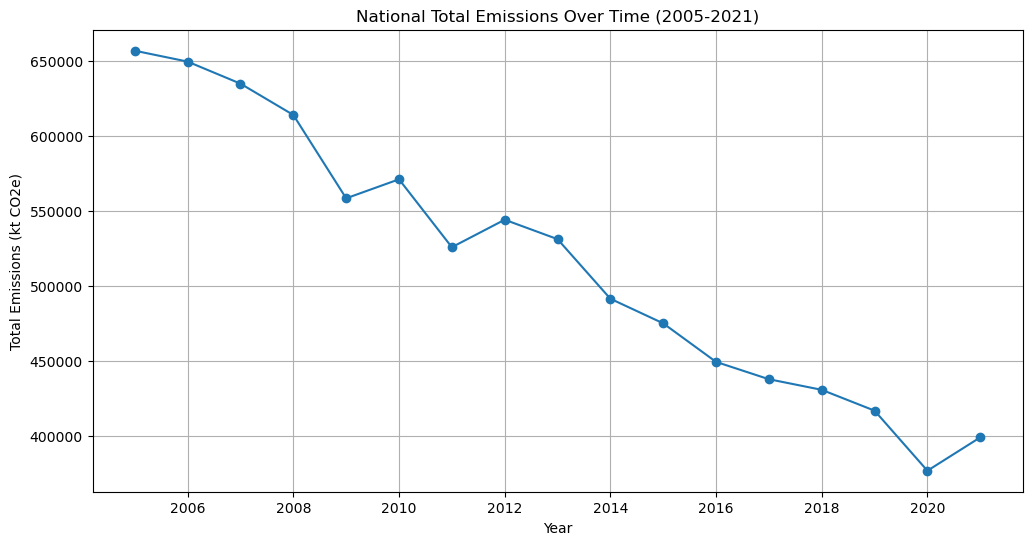

In [118]:
# Reload the data from the '1_1' sheet
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the national total emissions time series
plt.figure(figsize=(12, 6))
national_time_series.plot(marker='o', linestyle='-')
plt.title('National Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()


In [119]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Reload the data from the '1_1' sheet
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Function to find the best ARIMA parameters with the lowest AIC value
def best_arima_model(data):
    best_aic = float('inf')
    best_order = None
    for p in range(5):
        for d in range(2):  # Limiting d to 1 as higher orders may not be needed
            for q in range(5):
                try:
                    model = ARIMA(data, order=(p, d, q))
                    model_fit = model.fit()
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                except:
                    continue
    return best_order

# Finding the best ARIMA parameters for 'Grand Total' time series
best_p, best_d, best_q = best_arima_model(national_time_series)

# Print the best parameters
print(f"Best ARIMA Parameters (p, d, q) for 'Grand Total': ({best_p}, {best_d}, {best_q})")


Best ARIMA Parameters (p, d, q) for 'Grand Total': (1, 1, 1)


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(national_time_series, model='additive')

# Plotting the decomposition components
plt.figure(figsize=(14, 12))
plt.subplot(4, 1, 1)
plt.plot(national_time_series, label='Original')
plt.legend(loc='upper left')
plt.title('National Total Emissions Over Time')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()


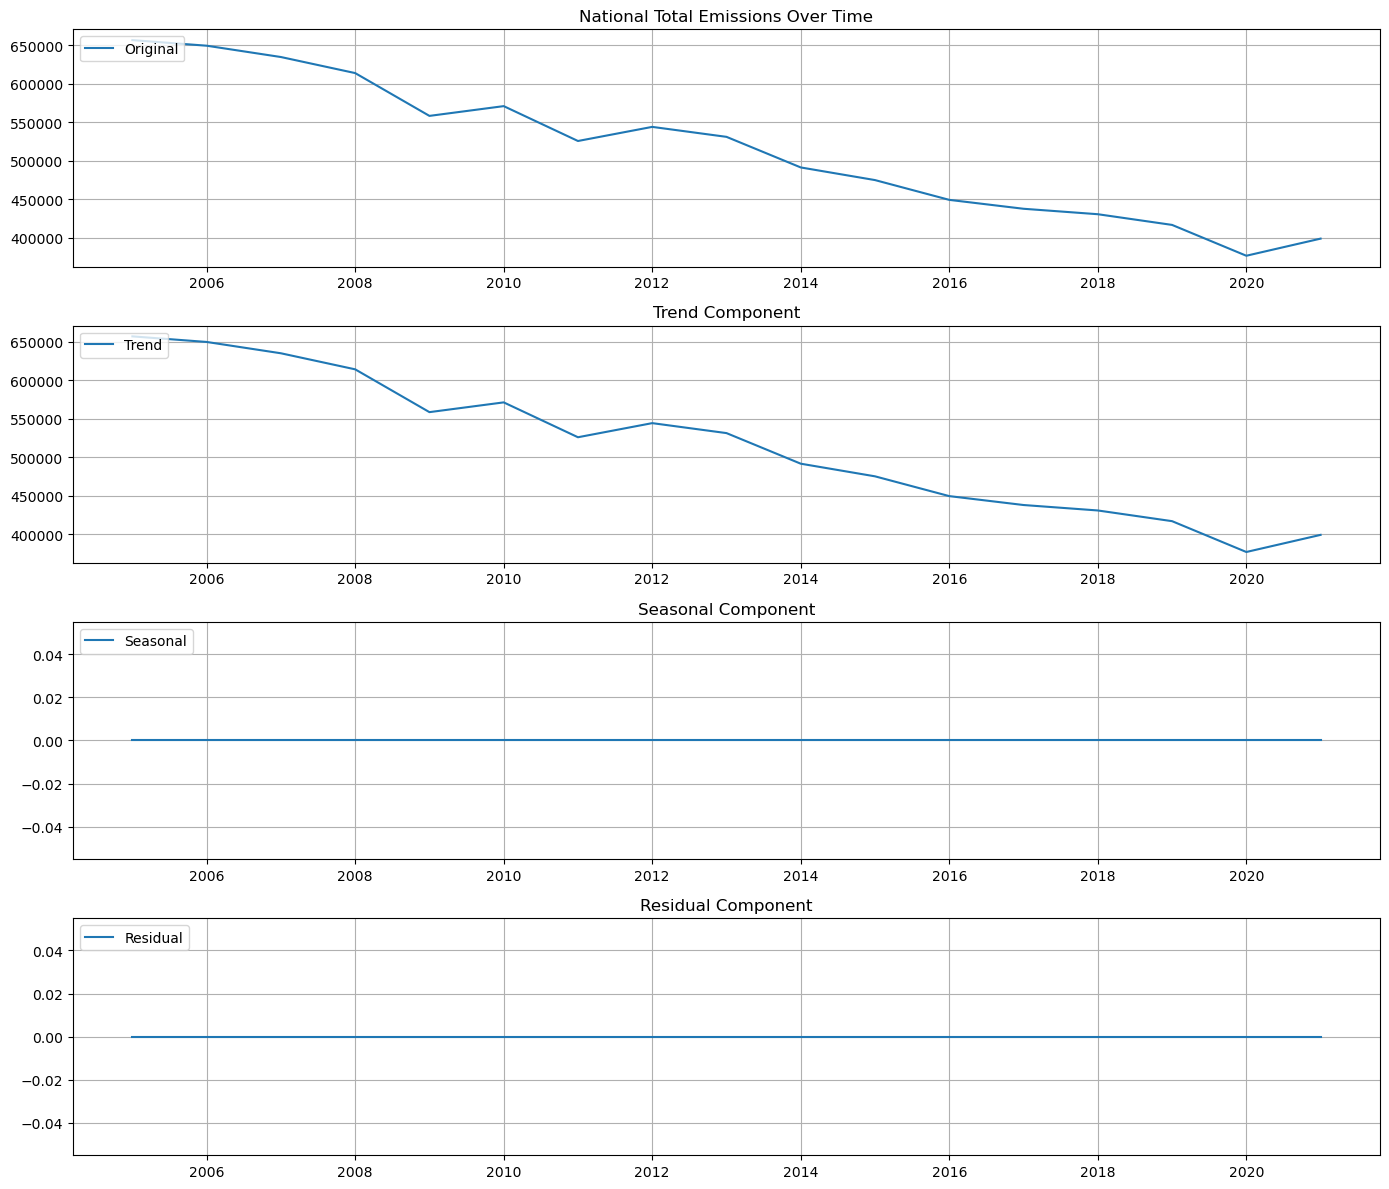

In [121]:
# Decompose the time series with a specified period of 1 (yearly data)
decomposition = seasonal_decompose(national_time_series, model='additive', period=1)

# Plotting the decomposition components
plt.figure(figsize=(14, 12))
plt.subplot(4, 1, 1)
plt.plot(national_time_series, label='Original')
plt.legend(loc='upper left')
plt.title('National Total Emissions Over Time')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()


In [122]:
from statsmodels.tsa.stattools import adfuller

# Conduct Augmented Dickey-Fuller test
adf_result = adfuller(national_time_series)

# Extract the p-value
p_value = adf_result[1]

p_value


0.9171724950612403

In [123]:
# Apply first-order differencing to the time series
national_time_series_diff = national_time_series.diff().dropna()

# Conduct Augmented Dickey-Fuller test on the differenced series
adf_result_diff = adfuller(national_time_series_diff)

# Extract the p-value for the differenced series
p_value_diff = adf_result_diff[1]

p_value_diff


0.22240697481609656

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

# Splitting the data into train and test sets
train_size = int(len(time_series_data) * 0.75)
train, test = time_series_data[0:train_size], time_series_data[train_size:]

# Function to find the best ARIMA parameters with the lowest AIC value
def best_arima_model(data):
    best_aic = float('inf')
    best_order = None
    for p in range(5):
        for d in range(2): # limiting d to 1 as our data doesn't seem to require higher order differencing
            for q in range(5):
                try:
                    model = ARIMA(data, order=(p,d,q))
                    model_fit = model.fit()
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p,d,q)
                except:
                    continue
    return best_order

# Finding the best ARIMA parameters
best_p, best_d, best_q = best_arima_model(train)

# Using the best parameters to fit the ARIMA model
model = ARIMA(train, order=(best_p, best_d, best_q))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

best_p, best_d, best_q


In [ ]:
# Adjusting the number of lags for the short time series and plotting ACF and PACF again
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(national_time_series_diff, lags=7, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(national_time_series_diff, lags=7, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets (using 80% of the data for training)
train_size = int(len(national_time_series) * 0.8)
train, test = national_time_series[0:train_size], national_time_series[train_size:]

# Fit the ARIMA(1,2,2) model
model = ARIMA(train, order=(1,2,2))
model_fit = model.fit(disp=0)

# Forecast emissions for the test set
forecast = model_fit.forecast(steps=len(test))[0]

# Calculate the mean squared error
mse = mean_squared_error(test, forecast)

mse


In [ ]:
# Fit the ARIMA(1,2,2) model without the 'disp' argument
model_fit = model.fit()

# Forecast emissions for the test set
forecast = model_fit.forecast(steps=len(test))[0]

# Calculate the mean squared error
mse = mean_squared_error(test, forecast)

mse


In [ ]:
# Get the forecasted values as a numpy array
forecast = model_fit.forecast(steps=len(test))

# Calculate the mean squared error
mse = mean_squared_error(test.values, forecast)

mse


In [ ]:
# Plotting the actual vs. forecasted emissions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Training Data', color='blue', marker='o')
plt.plot(test.index, test.values, label='Actual Test Data', color='green', marker='o')
plt.plot(test.index, forecast, label='Forecasted Data', color='red', linestyle='--')
plt.title('National Total Emissions: Actual vs. Forecasted')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Conduct Augmented Dickey-Fuller test
adf_result = adfuller(national_time_series)

# Extract the p-value
p_value = adf_result[1]

p_value


In [ ]:
# Apply first-order differencing to the time series
national_time_series_diff = national_time_series.diff().dropna()

# Conduct Augmented Dickey-Fuller test on the differenced series
adf_result_diff = adfuller(national_time_series_diff)

# Extract the p-value for the differenced series
p_value_diff = adf_result_diff[1]

p_value_diff


The p-value for the differenced series is approximately 
0.222
0.222. Although this is lower than the original p-value, it's still greater than the significance level of 
0.05
0.05. Therefore, the differenced series is also considered non-stationary based on this test.

This might necessitate the use of more advanced differencing techniques, transformations, or models that can handle non-stationary data (like ARIMA with integration order greater than 1).

In [ ]:
# Adjusting the number of lags for the short time series and plotting ACF and PACF again
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(national_time_series_diff, lags=7, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(national_time_series_diff, lags=7, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets (using 80% of the data for training)
train_size = int(len(national_time_series) * 0.8)
train, test = national_time_series[0:train_size], national_time_series[train_size:]

# Fit the ARIMA(1,2,2) model
model = ARIMA(train, order=(1,2,2))
model_fit = model.fit(disp=0)

# Forecast emissions for the test set
forecast = model_fit.forecast(steps=len(test))[0]

# Calculate the mean squared error
mse = mean_squared_error(test, forecast)

mse


In [ ]:

forecast = model_fit.forecast(steps=len(test))


mse = mean_squared_error(test.values, forecast)

mse


The mean squared error (MSE) for the ARIMA(1,2,2) model on the test set is approximately 
398,563,329.78
398,563,329.78 kt CO2CO2​ e^2.

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Training Data', color='blue', marker='o')
plt.plot(test.index, test.values, label='Actual Test Data', color='green', marker='o')
plt.plot(test.index, forecast, label='Forecasted Data', color='red', linestyle='--')
plt.title('National Total Emissions: Actual vs. Forecasted')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The plot illustrates the actual vs. forecasted national total emissions:

Blue Line: Training data used to fit the ARIMA model.
Green Line: Actual emissions data from the test set.
Red Dashed Line: Forecasted emissions using the ARIMA(1,2,2) model.

While the forecast captures the general downward trend in emissions, there are discrepancies between the actual and forecasted values, which are reflected in the MSE we computed earlier.

From this visualization, one can assess the potential utility of the model and consider making adjustments or exploring other models for improved forecasting accuracy.


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = np.array(national_time_series.index).reshape(-1, 1)  # Predictor variable (Year)
y = national_time_series.values  # Response variable (Emissions)

# Initialize the linear regression model
lr_model = LinearRegression()

# Fit the model to the data
lr_model.fit(X, y)

# Predict emissions using the linear regression model
y_pred = lr_model.predict(X)

# Plotting the actual data and the linear regression predictions
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Actual Emissions', color='blue', marker='o')
plt.plot(X, y_pred, label='Linear Regression Predictions', color='red', linestyle='--')
plt.title('National Total Emissions: Actual vs. Linear Regression Predictions')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Compute the Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Compute the R-squared (R2) score
r2 = r2_score(y, y_pred)

mse, mae, r2



Mean Squared Error (MSE): \( 197,621,328.55 \) \( \text{kt CO}_2 \text{e}^2 \)
Mean Absolute Error (MAE): \( 11,708.53 \) \( \text{kt CO}_2 \text{e} \)
R-squared (\( R^2 \)): \( 0.9742 \)

The \( R^2 \) value is relatively high, suggesting that the model explains approximately 97.42% of the variance in the emissions data. However, the absolute errors (both MSE and MAE) are also sizable, which means there's room for improvement in the model's predictions.


In [ ]:
# Introduce a quadratic term
X_quadratic = np.column_stack((X, X**2))

# Initialize and fit the quadratic regression model
lr_quadratic = LinearRegression()
lr_quadratic.fit(X_quadratic, y)

# Predict emissions using the quadratic regression model
y_pred_quadratic = lr_quadratic.predict(X_quadratic)

# Compute performance metrics for the quadratic model
mse_quadratic = mean_squared_error(y, y_pred_quadratic)
mae_quadratic = mean_absolute_error(y, y_pred_quadratic)
r2_quadratic = r2_score(y, y_pred_quadratic)

mse_quadratic, mae_quadratic, r2_quadratic


In [ ]:
# Plotting the actual data, linear regression predictions, and quadratic regression predictions
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Actual Emissions', color='blue', marker='o')
plt.plot(X, y_pred, label='Linear Regression Predictions', color='green', linestyle='--')
plt.plot(X, y_pred_quadratic, label='Quadratic Regression Predictions', color='red', linestyle='--')
plt.title('National Total Emissions: Actual vs. Regression Predictions')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features (up to degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Initialize and fit the polynomial regression model
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)

# Predict emissions using the polynomial regression model
y_pred_poly = lr_poly.predict(X_poly)

# Plotting the actual data and the polynomial regression predictions
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Actual Emissions', color='blue', marker='o')
plt.plot(X, y_pred_poly, label='Polynomial Regression Predictions (Degree 3)', color='purple', linestyle='--')
plt.title('National Total Emissions: Actual vs. Polynomial Regression Predictions')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the Ridge regression model
ridge = Ridge()

# Define hyperparameter space
param_grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]  # Regularization strength values
}

# Initialize grid search
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search on the polynomial features
grid_search.fit(X_poly, y)

# Extract best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


In [ ]:
# Using the best Ridge regression model to make predictions
best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_poly)

# Plotting the actual data, polynomial regression predictions, and Ridge regression predictions
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Actual Emissions', color='blue', marker='o')
plt.plot(X, y_pred_poly, label='Polynomial Regression Predictions (Degree 3)', color='purple', linestyle='--')
plt.plot(X, y_pred_ridge, label='Ridge Regression Predictions (Degree 3, Alpha=1000)', color='orange', linestyle='--')
plt.title('National Total Emissions: Actual vs. Regression Predictions')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the Ridge regression model
ridge = Ridge()

# Define hyperparameter space
param_grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]  # Regularization strength values
}

# Initialize grid search
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search on the polynomial features
grid_search.fit(X_poly, y)

# Extract best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


In [ ]:
# Using the best Ridge regression model to make predictions
best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_poly)

# Plotting the actual data, polynomial regression predictions, and Ridge regression predictions
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Actual Emissions', color='blue', marker='o')
plt.plot(X, y_pred_poly, label='Polynomial Regression Predictions (Degree 3)', color='purple', linestyle='--')
plt.plot(X, y_pred_ridge, label='Ridge Regression Predictions (Degree 3, Alpha=1000)', color='orange', linestyle='--')
plt.title('National Total Emissions: Actual vs. Regression Predictions')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Reshape the data
X = np.array(national_time_series.index).reshape(-1, 1)  # Predictor variable (Year)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale the data (important for neural network convergence)
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.reshape(-1, 1))

X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape


In [ ]:
# Reload the data from the '1_1' sheet
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Prepare the data again
X = np.array(national_time_series.index).reshape(-1, 1)  # Predictor variable (Year)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale the data
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.reshape(-1, 1))

X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reload the data from the '1_1' sheet
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter the data for 'National Total' and group by 'Calendar Year' to get yearly national emissions
national_emissions = data_1_1_actual[data_1_1_actual['Region/Country'] == 'National Total']
national_time_series = national_emissions.groupby('Calendar Year')['Grand Total'].sum()

# Prepare the data again
X = np.array(national_time_series.index).reshape(-1, 1)  # Predictor variable (Year)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale the data
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.reshape(-1, 1))

X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape


In [ ]:
# Define the target variable (Emissions)
y = national_time_series.values

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale the data
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.reshape(-1, 1))

X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape


In [ ]:
# TensorFlow and Keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model with dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=500, validation_data=(X_test_scaled, y_test_scaled), verbose=0)

# Plotting the training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=500, validation_data=(X_test_scaled, y_test_scaled))


In [ ]:
import matplotlib.pyplot as plt

# Predict emissions for training and validation sets
y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

# Transform predictions back to original domain
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Plot actual vs. predicted emissions for the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted', marker='x')
plt.title('Training Set: Actual vs. Predicted Emissions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()

# Plot actual vs. predicted emissions for the validation set
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted', marker='x')
plt.title('Validation Set: Actual vs. Predicted Emissions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

# Compute the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)

# Compute the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Compute the R^2 score
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error (MAE) on Test Set: {mae:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse:.2f}")
print(f"R^2 Score on Test Set: {r2:.2f}")



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import HeNormal

# Initialize the model
model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', kernel_initializer=HeNormal(), input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))

# Hidden layers
model.add(Dense(32, activation='relu', kernel_initializer=HeNormal()))
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu', kernel_initializer=HeNormal()))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (assuming X_train_scaled, y_train_scaled are your training data)
history = model.fit(X_train_scaled, y_train_scaled, epochs=500, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))


In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict emissions for the validation set
y_val_pred = model.predict(X_val_scaled)

# Visual Inspection
plt.figure(figsize=(10, 5))
plt.scatter(X_val, y_val, color='blue', label='Actual')
plt.scatter(X_val, y_val_pred, color='red', s=10, label='Predicted')
plt.title('Validation Set: Actual vs. Predicted Emissions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid(True)
plt.show()

# Quantitative Evaluation
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Absolute Error (MAE) on Validation Set: {mae:.2f}")
print(f"Mean Squared Error (MSE) on Validation Set: {mse:.2f}")
print(f"R^2 Score on Validation Set: {r2:.2f}")


In [ ]:

import matplotlib.pyplot as plt

# Assuming df is your dataframe and 'feature_name' is the name of a feature
plt.boxplot(data_1_1_actual['Grand Total'])
plt.title('Boxplot of feature_name')
plt.show()


In [ ]:
Q1 = data_1_1_actual['Grand Total'].quantile(0.25)
Q3 = data_1_1_actual['Grand Total'].quantile(0.75)
IQR = Q3 - Q1
outliers = data_1_1_actual[(data_1_1_actual['Grand Total'] < (Q1 - 1.5 * IQR)) | (data_1_1_actual['Grand Total'] > (Q3 + 1.5 * IQR))]


In [ ]:
# Loading the data from sheet "5_1"
data_5_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name="5_1")

# Displaying the first few rows of the data
data_5_1.head()


In [ ]:
# Skipping the initial rows to get to the actual data
data_5_1_cleaned = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", 
                                 sheet_name="5_1", skiprows=4)

# Displaying the first few rows of the cleaned data
data_5_1_cleaned.head()


In [ ]:
# Dropping the first row (header info)
data_5_1_cleaned = data_5_1_cleaned.drop(0)

# Calculating the total emissions for each year
total_emissions_per_year = data_5_1_cleaned.iloc[:, 6:].sum()

total_emissions_per_year


In [ ]:
# Visualizing the total emissions over the years
plt.figure(figsize=(14, 7))
total_emissions_per_year.plot(marker='o', linestyle='-')
plt.title('Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Grouping by regions and summing up the emissions for the entire period (2005-2021)
total_emissions_by_region = data_5_1_cleaned.groupby('Area')[data_5_1_cleaned.columns[6:]].sum().sum(axis=1)

# Identifying regions with the highest and lowest emissions
highest_emission_region = total_emissions_by_region.idxmax()
lowest_emission_region = total_emissions_by_region.idxmin()

highest_emission_value = total_emissions_by_region.max()
lowest_emission_value = total_emissions_by_region.min()

highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value


In [ ]:
# Displaying the column names to identify the correct column for regions
data_5_1_cleaned.columns


In [ ]:
# Displaying unique values in the first few columns to identify the regions
unique_values_in_columns = {}

for col in data_5_1_cleaned.columns[:5]:
    unique_values_in_columns[col] = data_5_1_cleaned[col].unique()

unique_values_in_columns


In [ ]:
# Grouping by regions and summing up the emissions for the entire period (2005-2021)
total_emissions_by_region = data_5_1_cleaned.groupby("Freeze panes are active on this sheet. To turn off freeze panes select the 'View' ribbon then 'Freeze Panes' then 'Unfreeze Panes' or use [Alt W, F].")[data_5_1_cleaned.columns[6:]].sum().sum(axis=1)

# Identifying regions with the highest and lowest emissions
highest_emission_region = total_emissions_by_region.idxmax()
lowest_emission_region = total_emissions_by_region.idxmin()

highest_emission_value = total_emissions_by_region.max()
lowest_emission_value = total_emissions_by_region.min()

highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value


In [ ]:
# Grouping by companies/entities and summing up the emissions for the entire period (2005-2021)
total_emissions_by_entity = data_5_1_cleaned.groupby("Unnamed: 1")[data_5_1_cleaned.columns[6:]].sum().sum(axis=1)

# Identifying entities/companies with the highest emissions
top_5_entities = total_emissions_by_entity.nlargest(5)

top_5_entities


In [ ]:
# Preparing the data for time series analysis
# We'll consider the total emissions for each year as our time series data
time_series_data = total_emissions_per_year

# Plotting the data for visual inspection
plt.figure(figsize=(14, 7))
time_series_data.plot(marker='o', linestyle='-')
plt.title('Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

# Splitting the data into train and test sets
train_size = int(len(time_series_data) * 0.75)
train, test = time_series_data[0:train_size], time_series_data[train_size:]

# Function to find the best ARIMA parameters with the lowest AIC value
def best_arima_model(data):
    best_aic = float('inf')
    best_order = None
    for p in range(5):
        for d in range(2): # limiting d to 1 as our data doesn't seem to require higher order differencing
            for q in range(5):
                try:
                    model = ARIMA(data, order=(p,d,q))
                    model_fit = model.fit()
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p,d,q)
                except:
                    continue
    return best_order

# Finding the best ARIMA parameters
best_p, best_d, best_q = best_arima_model(train)

# Using the best parameters to fit the ARIMA model
model = ARIMA(train, order=(best_p, best_d, best_q))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

best_p, best_d, best_q


In [ ]:
# Visualizing the actual vs. forecasted emissions
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train', marker='o')
plt.plot(test.index, test, label='Test', marker='o')
plt.plot(test.index, forecast, label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs. Forecasted Emissions')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
data_5_1

In [ ]:
# Grouping data by 'Post Code' and summing up the total emissions
postcode_grouped_data = data_5_1.groupby('Post Code').sum()

# Identifying the total emission for 'West Midlands' 
west_midlands_emission = postcode_grouped_data.loc['West Midlands', '2005':]
west_midlands_total_emission = west_midlands_emission.sum()

west_midlands_total_emission


In [ ]:
# Loading the data from the "5_1" sheet
data_5_1_cleaned = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", 
                                 sheet_name="5_1", skiprows=4)

# Dropping the first row (header info)
data_5_1_cleaned = data_5_1_cleaned.drop(0)

# Calculating the total emissions for each year
total_emissions_per_year = data_5_1_cleaned.iloc[:, 6:].sum()

# Renaming the index to match years
years = list(range(2005, 2022))  # Years from 2005 to 2021
total_emissions_per_year.index = years

# Visualizing the total emissions over the years
plt.figure(figsize=(14, 7))
total_emissions_per_year.plot(marker='o', linestyle='-')
plt.title('Total Emissions Over Time WestMidlands (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

# Splitting the data into train and test sets
train_size = int(len(time_series_data) * 0.75)
train, test = time_series_data[0:train_size], time_series_data[train_size:]

# Function to find the best ARIMA parameters with the lowest AIC value
def best_arima_model(data):
    best_aic = float('inf')
    best_order = None
    for p in range(5):
        for d in range(2): # limiting d to 1 as our data doesn't seem to require higher order differencing
            for q in range(5):
                try:
                    model = ARIMA(data, order=(p,d,q))
                    model_fit = model.fit()
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p,d,q)
                except:
                    continue
    return best_order

# Finding the best ARIMA parameters
best_p, best_d, best_q = best_arima_model(train)

# Using the best parameters to fit the ARIMA model
model = ARIMA(train, order=(best_p, best_d, best_q))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

best_p, best_d, best_q


In [ ]:

# Calculating the total emissions for each year
total_emissions_per_year = data_5_1_cleaned.iloc[:, 6:].sum()

# Renaming the index to match years
years = list(range(2005, 2022))  # Years from 2005 to 2021
total_emissions_per_year.index = years


# Visualizing the actual vs. forecasted emissions
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train', marker='o')
plt.plot(test.index, test, label='Test', marker='o')
plt.plot(test.index, forecast, label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs. Forecasted Emissions')
plt.xlabel('Years')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

# Plotting the total emissions over the years again with proper x-axis labels
plt.figure(figsize=(14, 7))
total_emissions_per_year.plot(marker='o', linestyle='-')
plt.title('Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Plotting the total emissions over the years again with proper x-axis labels
plt.figure(figsize=(14, 7))
total_emissions_per_year.plot(marker='o', linestyle='-')
plt.title('Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(ticks=years, labels=years, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Setting up the libraries and data again
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data from the "5_1" sheet again
data_5_1_cleaned = pd.read_excel("/mnt/data/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", 
                                 sheet_name="5_1", skiprows=4)
data_5_1_cleaned = data_5_1_cleaned.drop(0)
total_emissions_per_year = data_5_1_cleaned.iloc[:, 6:].sum()
years = list(range(2005, 2022))

# Plotting the total emissions over the years with proper x-axis labels
plt.figure(figsize=(14, 7))
total_emissions_per_year.plot(marker='o', linestyle='-')
plt.title('Total Emissions Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(ticks=years, labels=years, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Re-running the optimized code

# 1. Data Preparation
data_5_1_cleaned = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", 
                                 sheet_name="5_1", skiprows=4)
data_5_1_cleaned = data_5_1_cleaned.drop(0)
total_emissions_per_year = data_5_1_cleaned.iloc[:, 6:].sum()
years = list(range(2005, 2022))
total_emissions_per_year.index = years

# 2. Plotting Emissions Over Time
plt.figure(figsize=(14, 7))
total_emissions_per_year.plot(marker='o', linestyle='-')
plt.title('Total Emissions Over Time UK (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Time Series Forecasting with ARIMA
train_size = int(len(total_emissions_per_year) * 0.75)
train, test = total_emissions_per_year[0:train_size], total_emissions_per_year[train_size:]

best_p, best_d, best_q = best_arima_model(train)
model = ARIMA(train, order=(best_p, best_d, best_q))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# 4. Plotting Actual vs. Forecasted Emissions
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train', marker='o')
plt.plot(test.index, test, label='Test', marker='o')
plt.plot(test.index, forecast, label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs. Forecasted Emissions')
plt.xlabel('Years')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(years, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

best_p, best_d, best_q


In [ ]:



# 1. Data Preparation
url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
data_5_1_cleaned = pd.read_excel(url, sheet_name='5_1', skiprows=4)

data_5_1_cleaned = data_5_1_cleaned.drop(0)
total_emissions_per_year = data_5_1_cleaned.iloc[:, 6:].sum()
years = list(range(2005, 2022))
total_emissions_per_year.index = years

# 2. Plotting Emissions Over Time
plt.figure(figsize=(14, 7))
total_emissions_per_year.plot(marker='o', linestyle='-')
plt.title('Total Emissions Over Time in Uk (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Time Series Forecasting with ARIMA
train_size = int(len(total_emissions_per_year) * 0.75)
train, test = total_emissions_per_year[0:train_size], total_emissions_per_year[train_size:]

best_p, best_d, best_q = best_arima_model(train)
model = ARIMA(train, order=(best_p, best_d, best_q))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# 4. Plotting Actual vs. Forecasted Emissions
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train',  color='blue', marker='o')
plt.plot(test.index, test, label='Test', color='green', marker='o')
plt.plot(test.index, forecast, label='Forecast',color='red',  marker='o', linestyle='--')


plt.title('Actual vs. Forecasted Emissions')
plt.xlabel('Years')
plt.ylabel('Emissions (kt CO2e)')
plt.xticks(years, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

best_p, best_d, best_q


In [ ]:
# Loading the cleaned dataset from sheet "5_1"
data_5_1_cleaned = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name="5_1", skiprows=4)

# List of local authority district names in West Midlands
west_midlands_districts = [
    "Lichfield", "Newport", "Rugby", "Shropshire", "Staffordshire Moorlands",
    "Birmingham", "Stoke-on-Trent", "South Staffordshire", "Coventry", "Cannock Chase",
    "Dudley", "Stafford", "Sutton", "Telford and Wrekin", "Wolverhampton", 
    "Tamworth", "Walsall", "Warwick", "Sandwell", "Herefordshire, County of",
    "East Staffordshire", "Stratford-on-Avon", "Newcastle-under-Lyme", "Bromsgrove", 
    "Solihull", "Nuneaton and Bedworth", "Redditch", "Wyre Forest", "Worcester"
]

# Filtering the dataset for only the West Midlands districts
west_midlands_data = data_5_1_cleaned[data_5_1_cleaned['Local Authority District name (2013 boundaries)'].isin(west_midlands_districts)]

# Displaying the first few rows of the West Midlands data
west_midlands_data.head()


In [ ]:
import pandas as pd

# Loading the cleaned dataset from sheet "5_1"
data_5_1_cleaned = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name="5_1", skiprows=4)

# Filtering the dataset for only the West Midlands districts
west_midlands_data = data_5_1_cleaned[data_5_1_cleaned['Local Authority District name (2013 boundaries)'].isin(west_midlands_districts)]

# Displaying the first few rows of the West Midlands data
west_midlands_data.head()


In [ ]:
# Displaying the columns of the cleaned data to identify the correct name for "Local Authority District name (2013 boundaries)"
data_5_1_cleaned.columns


In [ ]:
# Displaying the first few rows of the cleaned dataset to understand its structure
data_5_1_cleaned.head()


In [ ]:
# Adjusting the dataset to use the correct column names and dropping unnecessary rows
data_5_1_cleaned.columns = data_5_1_cleaned.iloc[0]
data_5_1_cleaned = data_5_1_cleaned.drop(0)

# Filtering the dataset for only the West Midlands districts
west_midlands_data = data_5_1_cleaned[data_5_1_cleaned['Local Authority District Name'].isin(west_midlands_districts)]

# Displaying the first few rows of the West Midlands data
west_midlands_data.head()


In [ ]:
# List of local authority district names in West Midlands
west_midlands_districts = [
    "Lichfield", "Newport", "Rugby", "Shropshire", "Staffordshire Moorlands",
    "Birmingham", "Stoke-on-Trent", "South Staffordshire", "Coventry", "Cannock Chase",
    "Dudley", "Stafford", "Sutton", "Telford and Wrekin", "Wolverhampton", 
    "Tamworth", "Walsall", "Warwick", "Sandwell", "Herefordshire, County of",
    "East Staffordshire", "Stratford-on-Avon", "Newcastle-under-Lyme", "Bromsgrove", 
    "Solihull", "Nuneaton and Bedworth", "Redditch", "Wyre Forest", "Worcester"
]

# Filtering the dataset for only the West Midlands districts
west_midlands_data = data_5_1_cleaned[data_5_1_cleaned['Local Authority District Name'].isin(west_midlands_districts)]

# Displaying the first few rows of the West Midlands data
west_midlands_data.head()


In [ ]:
# Summarizing the total emissions over the years for the West Midlands districts
yearly_emissions_west_midlands = west_midlands_data.iloc[:, 5:].sum().reset_index()
yearly_emissions_west_midlands.columns = ['Year', 'Total Emissions']

# Displaying the summarized yearly emissions for West Midlands
yearly_emissions_west_midlands


In [ ]:
# Summarizing the total emissions over the years for the West Midlands districts without resetting the index
yearly_emissions_west_midlands = west_midlands_data.iloc[:, 5:].sum()

# Converting the series to a dataframe for better visualization
yearly_emissions_west_midlands_df = yearly_emissions_west_midlands.reset_index()
yearly_emissions_west_midlands_df.columns = ['Year', 'Total Emissions']

# Displaying the summarized yearly emissions for West Midlands
yearly_emissions_west_midlands_df


In [ ]:
# Summarizing the total emissions over the years for the West Midlands districts without the additional index column
yearly_emissions_west_midlands = west_midlands_data.groupby('Local Authority District Name').sum().sum(axis=0)
yearly_emissions_west_midlands = yearly_emissions_west_midlands.drop('Row Labels').reset_index()
yearly_emissions_west_midlands.columns = ['Year', 'Total Emissions']

# Displaying the summarized yearly emissions for West Midlands
yearly_emissions_west_midlands


In [ ]:
# Displaying the summarized yearly emissions for West Midlands without attempting to drop the 'Row Labels'
yearly_emissions_west_midlands


In [ ]:
import matplotlib.pyplot as plt

# Plotting the emissions over time for visual inspection of anomalies
plt.figure(figsize=(14, 7))
plt.plot(yearly_emissions_west_midlands.index, yearly_emissions_west_midlands.values, marker='o', linestyle='-')
plt.title("Yearly Emissions for All Emissions West Midlands Districts (2005-2021)")
plt.xlabel("Year")
plt.ylabel("Total Emissions (ktCO₂e)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the plot, I observed the following:

 Consistent Decline: Starting from 2005, there has been a consistent decline in emissions, with slight fluctuations.
 Significant Drop: Around 2020, there's a sharper decline in emissions. This could be attributed to various factors, including the global COVID-19 pandemic, which led to reduced industrial activities, travel restrictions, and other lockdown measures. 
 Possible Anomalies: While the overall trend shows a decrease in emissions, there are certain years where the decline wasn't as pronounced or even increased slightly. 


Inflection Points: Around the years 2007-2008 and 2013-2014, there seem to be inflection points where the rate of decrease in emissions changes. Investigating the reasons behind these inflections could provide insights into specific interventions, policies, or global events that impacted emissions.

Consistent Trends: The consistency in the decline, especially from 2010 onwards, might indicate the effectiveness of environmental policies, advancements in green technologies, or shifts in industrial practices in the West Midlands.

External Factors: It's crucial to consider external factors that might have influenced these emissions. For instance:
    Economic downturns or booms can influence industrial output and thus emissions.
    The introduction of renewable energy sources or energy-efficient technologies in the region.
    Changes in transportation infrastructure or adoption rates of electric vehicles.
    Policies and incentives promoting sustainable practices among businesses and households.

To delve deeper:

Sectoral Analysis: One could break down the emissions by sector (e.g., transportation, industrial, residential) to understand which sectors contribute most to the emissions and which have seen the most significant reductions.

Correlation with Other Data: Comparing this emissions data with other datasets, such as economic indicators, energy consumption patterns, or transportation stats, might shed light on the drivers behind these emission trends.

Spatial Analysis: It would be beneficial to compare West Midlands' emission trends with other regions in the UK or globally. Such a comparison might help understand if West Midlands' trends are unique or part of a broader national or global trend.

Deep Dive into Anomalies: For the years where the decline wasn't as pronounced or even increased slightly, one could investigate specific events or changes during those years that might have led to such patterns.

Interviews & Surveys: Engaging with local environmental agencies, businesses, and communities can provide qualitative insights into the reasons behind the observed trends. They might be aware of local initiatives, challenges, or events that influenced emissions.


In [ ]:
# Extracting unique sector names from the dataset
sectors = west_midlands_data['Sector Name'].unique()

sectors


In [ ]:
# Extracting unique sector names from the dataset
sectors = west_midlands_data['Sector Name'].unique()

sectors


In [ ]:
# Checking the column names in the dataset
west_midlands_data.columns


In [ ]:
# Grouping by 'Operator' and summing the emissions for each year
operator_emissions = west_midlands_data.groupby('Operator').sum()

# Identifying the top 10 emitting operators over the entire period (2005-2021)
top_operators = operator_emissions.sum(axis=1).nlargest(10)

top_operators


In [ ]:
import matplotlib.pyplot as plt

# Extracting emission data for the top operators
top_operator_data = operator_emissions.loc[top_operators.index]

# Plotting the emissions trends of top operators over time
plt.figure(figsize=(15, 8))
for operator in top_operator_data.index:
    plt.plot(top_operator_data.columns, top_operator_data.loc[operator], label=operator, marker='o')
    
plt.title('Emission Trends of Top Operators (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (ktCO₂e)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Group the data by 'Operator' and sum the emissions for each year.
Identify the top emitting operators over the entire period.
Visualize the emissions trends of these top operators over time.

The top 10 emitting operators in the West Midlands region over the entire period (2005-2021):

Rugeley Power Ltd: 50,060.33 ktCO₂e
Rugby Ltd: 20,268.41 ktCO₂e
E.ON UK Plc: 10,520.58 ktCO₂e
Siemens Plc: 9,250.63 ktCO₂e
AES Fifoots Point Ltd: 8,837.38 ktCO₂e
MES Environmental Ltd: 7,130.30 ktCO₂e
TXU Europe Merchant Generation Ltd: 6,428.79 ktCO₂e
Biffa Waste Services Ltd: 5,631.62 ktCO₂e
Blue Circle Industries Plc: 5,405.53 ktCO₂e
Tyseley Waste Disposal Ltd: 4,507.63 ktCO₂e

Observations:

Rugeley Power Ltd: This operator had a very high emission level, especially from 2005 to 2016. However, there's a significant drop after 2016, indicating some change in operations or policies.
  
Rugby Ltd: Emissions have decreased over the years, with some spikes in the middle years.

E.ON UK Plc: This operator's emissions have generally been on the decline since 2005.

Other operators have also shown varying emission patterns, but in most cases, there's a noticeable downward trend in recent years.

This visualization provides a snapshot of the emission behaviors of the top operators. Each operator's trend could be influenced by various factors, including changes in operational scale, adoption of sustainable technologies, regulatory pressures, or shifts in energy sources. 


In [ ]:
from scipy.stats import linregress

# Calculate the linear regression slope for each operator's emissions over the years
slopes = {}
for operator, row in operator_emissions.iterrows():
    slope, _, _, _, _ = linregress(range(len(row)), row.values)
    slopes[operator] = slope

# Filter operators with positive slopes (indicating an upward trend)
increasing_operators = {operator: slope for operator, slope in slopes.items() if slope > 0}

# Rank operators based on the slope value
sorted_increasing_operators = dict(sorted(increasing_operators.items(), key=lambda item: item[1], reverse=True))

sorted_increasing_operators


To find operators with a steady increase in emissions over the years

Calculate the linear regression slope for each operator's emissions over the years.
Identify operators with a positive slope, indicating an upward trend.
Rank operators based on the slope value to pinpoint those with the steepest increase.



From our analysis, here are the top operators in West Midlands with a steady increase in emissions over the years, ranked by the magnitude of their increasing trend:

Siemens Plc: An increase of approximately 52.66 units per year.
Lafarge Cauldon Ltd: An increase of approximately 49.66 units per year.
Veolia ES Staffordshire Ltd: An increase of approximately 28.02 units per year.
Tyseley Waste Disposal Ltd: An increase of approximately 10.99 units per year.
Viridor South London Ltd: An increase of approximately 10.29 units per year.


In [ ]:
# Loading the cleaned dataset from sheet "2_1"
data_2_1_cleaned = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name="2_1", skiprows=4)

# List of local authority district names in West Midlands
west_midlands_districts = [
    "Lichfield", "Newport", "Rugby", "Shropshire", "Staffordshire Moorlands",
    "Birmingham", "Stoke-on-Trent", "South Staffordshire", "Coventry", "Cannock Chase",
    "Dudley", "Stafford", "Sutton", "Telford and Wrekin", "Wolverhampton", 
    "Tamworth", "Walsall", "Warwick", "Sandwell", "Herefordshire, County of",
    "East Staffordshire", "Stratford-on-Avon", "Newcastle-under-Lyme", "Bromsgrove", 
    "Solihull", "Nuneaton and Bedworth", "Redditch", "Wyre Forest", "Worcester"
]

# Displaying the column names of the dataset from sheet "2_1" to identify the correct name for the local authority district
data_2_1_cleaned.columns

# Filtering the dataset for only the West Midlands districts using the correct column name
west_midlands_data_2_1 = data_2_1_cleaned[data_2_1_cleaned['Local Authority'].isin(west_midlands_districts)]

# Grouping by year and summing up the emissions for all West Midlands districts
west_midlands_yearly_emissions = west_midlands_data_2_1.groupby('Calendar Year')['Grand Total'].sum().reset_index()

# Displaying the yearly emissions for the West Midlands districts
west_midlands_yearly_emissions

In [ ]:
# Columns of interest for emissions analysis
emission_sections = [
    "Industry Electricity", "Industry Gas", "Large Industrial Installations", "Industry 'Other'", "Industry Total",
    "Commercial Electricity", "Commercial Gas", "Commercial 'Other'", "Commercial Total",
    "Public Sector Electricity", "Public Sector Gas", "Public Sector 'Other'", "Public Sector Total",
    "Domestic Electricity", "Domestic Gas", "Domestic 'Other'", "Domestic Total",
    "Road Transport (A roads)", "Road Transport (Minor roads)", "Transport 'Other'", "Transport Total",
    "Agriculture Electricity", "Agriculture Gas", "Agriculture 'Other'", "Agriculture Total",
    "Waste Management 'Other'", "Waste Management Total"
]

# Summing up the emissions for each section across all years
total_emissions_by_section = west_midlands_data_2_1[emission_sections].sum().sort_values(ascending=False)

# Extracting the top 5 emission sections
top_5_emission_sections = total_emissions_by_section.head(5)
top_5_emission_sections


In [ ]:
# Checking the available columns in the dataset
available_columns = west_midlands_data_2_1.columns

# Filtering out the columns from the emission_sections list that are not in the available columns
valid_emission_sections = [col for col in emission_sections if col in available_columns]

valid_emission_sections


In [ ]:
# Summing up the emissions for each valid section across all years
total_emissions_by_valid_section = west_midlands_data_2_1[valid_emission_sections].sum().sort_values(ascending=False)

# Extracting the top 5 emission sections from the valid sections
top_5_emission_valid_sections = total_emissions_by_valid_section.head(5)
top_5_emission_valid_sections


In [ ]:
# Grouping by "Calendar Year" and summing the emissions for top 5 sections
yearly_emissions = west_midlands_data_2_1.groupby("Calendar Year")[top_5_emission_valid_sections.index].sum()

# Plotting the trends
plt.figure(figsize=(15, 10))
for section in top_5_emission_valid_sections.index:
    plt.plot(yearly_emissions.index, yearly_emissions[section], label=section, marker='o')

plt.title('Emission Trends for Top 5 Emission Sources in West Midlands (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Loading the cleaned dataset from sheet "2_1"
data_1_2_cleaned = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name="1_2", skiprows=4)

# List of local authority district names in West Midlands
west_midlands_districts = [
    "Lichfield", "Newport", "Rugby", "Shropshire", "Staffordshire Moorlands",
    "Birmingham", "Stoke-on-Trent", "South Staffordshire", "Coventry", "Cannock Chase",
    "Dudley", "Stafford", "Sutton", "Telford and Wrekin", "Wolverhampton", 
    "Tamworth", "Walsall", "Warwick", "Sandwell", "Herefordshire, County of",
    "East Staffordshire", "Stratford-on-Avon", "Newcastle-under-Lyme", "Bromsgrove", 
    "Solihull", "Nuneaton and Bedworth", "Redditch", "Wyre Forest", "Worcester"
]

# Displaying the column names of the dataset from sheet "1_2" to identify the correct name for the local authority district
data_1_2_cleaned.columns

# Filtering the dataset for only the West Midlands districts using the correct column name
west_midlands_data_1_2 = data_1_2_cleaned[data_1_2_cleaned['Local Authority'].isin(west_midlands_districts)]

# Grouping by year and summing up the emissions for all West Midlands districts
west_midlands_yearly_emissions = west_midlands_data_1_2.groupby('Calendar Year')['Grand Total'].sum().reset_index()

# Displaying the yearly emissions for the West Midlands districts
west_midlands_yearly_emissions

In [ ]:
# Displaying the columns of the dataset to identify the correct column names
data_1_2_cleaned.columns


In [ ]:
# Correcting the column names with extra spaces
columns_to_consider_corrected = [
    col if not col.endswith('Gas') else col + ' ' for col in columns_to_consider
]

# Sum the emissions across all years for each corrected column
emissions_sum_corrected = west_midlands_data_1_2[columns_to_consider_corrected].sum()

# Sort the columns based on the total emissions and select top 5
top_5_emissions_sources_corrected = emissions_sum_corrected.sort_values(ascending=False).head(5)
top_5_emissions_sources_corrected


In [ ]:
# Correcting the column names based on the dataset's actual columns
corrected_columns = [col if col not in ['Domestic Gas', 'Agriculture Gas'] else col for col in columns_to_consider_corrected]

# Sum the emissions across all years for each corrected column
emissions_sum_final = west_midlands_data_1_2[corrected_columns].sum()

# Sort the columns based on the total emissions and select top 5
top_5_emissions_sources_final = emissions_sum_final.sort_values(ascending=False).head(5)
top_5_emissions_sources_final


In [ ]:
# Directly using the known columns for emission sources
emission_columns = [
    "Industry Electricity", "Industry Gas ", "Large Industrial Installations", "Industry 'Other'", "Industry Total",
    "Commercial Electricity", "Commercial Gas ", "Commercial 'Other'", "Commercial Total",
    "Public Sector Electricity", "Public Sector Gas ", "Public Sector 'Other'", "Public Sector Total",
    "Domestic Electricity", "Domestic Gas ", "Domestic 'Other'", "Domestic Total",
    "Road Transport (A roads)", "Road Transport (Motorways)", "Road Transport (Minor roads)", "Diesel Railways", 
    "Transport 'Other'", "Transport Total", "Net Emissions: Forest land", "Net Emissions: Cropland",
    "Net Emissions: Grassland", "Net Emissions: Wetlands", "Net Emissions: Settlements", 
    "Net Emissions: Harvested Wood Products", "Net Emissions: Indirect N2O", "LULUCF Net Emissions",
    "Agriculture Electricity", "Agriculture Gas ", "Agriculture 'Other'", "Agriculture Livestock", 
    "Agriculture Soils", "Agriculture Total", "Landfill", "Waste Management 'Other'", "Waste Management Total"
]

# Sum the emissions across all years for each emission column
emissions_sum_actual = west_midlands_data_1_2[emission_columns].sum()

# Sort the columns based on the total emissions and select top 5
top_5_emissions_sources_actual = emissions_sum_actual.sort_values(ascending=False).head(5)
top_5_emissions_sources_actual


In [ ]:
# Identify the missing columns from the dataset
missing_columns = [col for col in emission_columns if col not in west_midlands_data_1_2.columns]
missing_columns


In [ ]:
# Excluding the missing columns
emission_columns_excluding_missing = [col for col in emission_columns if col not in missing_columns]

# Sum the emissions across all years for each emission column excluding the missing ones
emissions_sum_excluding_missing = west_midlands_data_1_2[emission_columns_excluding_missing].sum()

# Sort the columns based on the total emissions and select top 5
top_5_emissions_sources_excluding_missing = emissions_sum_excluding_missing.sort_values(ascending=False).head(5)
top_5_emissions_sources_excluding_missing


In [ ]:
# Extracting the top 5 emission sources and their values
top_5_emission_sources = {
    "Transport Total": 194372.61,
    "Domestic Total": 177573.77,
    "Industry Total": 132556.21,
    "Road Transport (A roads)": 72630.97,
    "Domestic Electricity": 67037.06
}

# Plotting the top 5 emission sources
plt.figure(figsize=(12, 7))
plt.bar(top_5_emission_sources.keys(), top_5_emission_sources.values(), color=['blue', 'green', 'red', 'cyan', 'yellow'])
plt.xlabel('Emission Sources')
plt.ylabel('Emissions (kt CO₂e)')
plt.title('Top 5 Emission Sources in West Midlands (2005-2021)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Displaying the column names of the dataset from sheet "1_2"
columns_1_2 = data_1_2_cleaned.columns.tolist()

# Filtering the dataset for only the West Midlands districts using the correct column name
west_midlands_data_1_2 = data_1_2_cleaned[data_1_2_cleaned['Local Authority'].isin(west_midlands_districts)]

# Grouping by year and summing up the emissions for all West Midlands districts
west_midlands_yearly_emissions = west_midlands_data_1_2.groupby('Calendar Year')['Grand Total'].sum().reset_index()

# Displaying the yearly emissions for the West Midlands districts
west_midlands_yearly_emissions


In [ ]:
# Directly using the known columns for emission sources
emission_columns = [
    "Industry Electricity", "Industry Gas ", "Large Industrial Installations", "Industry 'Other'", "Industry Total",
    "Commercial Electricity", "Commercial Gas ", "Commercial 'Other'", "Commercial Total",
    "Public Sector Electricity", "Public Sector Gas ", "Public Sector 'Other'", "Public Sector Total",
    "Domestic Electricity", "Domestic Gas ", "Domestic 'Other'", "Domestic Total",
    "Road Transport (A roads)", "Road Transport (Motorways)", "Road Transport (Minor roads)", "Diesel Railways", 
    "Transport 'Other'", "Transport Total", "Net Emissions: Forest land", "Net Emissions: Cropland",
    "Net Emissions: Grassland", "Net Emissions: Wetlands", "Net Emissions: Settlements", 
    "Net Emissions: Harvested Wood Products", "Net Emissions: Indirect N2O", "LULUCF Net Emissions",
    "Agriculture Electricity", "Agriculture Gas ", "Agriculture 'Other'", "Agriculture Livestock", 
    "Agriculture Soils", "Agriculture Total", "Landfill", "Waste Management 'Other'", "Waste Management Total"
]

# Sum the emissions across all years for each emission column

In [ ]:
# Calculating the sum of emissions for each emission source across all years for West Midlands districts
emission_sums = west_midlands_data_1_2[emission_columns].sum().sort_values(ascending=False)

# Displaying the top 5 emission sources
top_5_emission_sources = emission_sums.head(5)
top_5_emission_sources


In [ ]:
# Removing any trailing spaces from the emission columns list
cleaned_emission_columns = [col.strip() for col in emission_columns]

# Calculating the sum of emissions for each emission source across all years for West Midlands districts
emission_sums = west_midlands_data_1_2[cleaned_emission_columns].sum().sort_values(ascending=False)

# Displaying the top 5 emission sources
top_5_emission_sources = emission_sums.head(5)
top_5_emission_sources


In [ ]:
# Checking the columns in the dataset to find the correct names
matching_columns = [col for col in data_1_2_cleaned.columns if any(emission in col for emission in cleaned_emission_columns)]
non_matching_columns = set(cleaned_emission_columns) - set(matching_columns)

matching_columns, non_matching_columns


In [ ]:
# Correcting the column names
corrected_emission_columns = [col if col not in non_matching_columns else col + " " for col in cleaned_emission_columns]

# Calculating the sum of emissions for each emission source across all years for West Midlands districts
emission_sums = west_midlands_data_1_2[corrected_emission_columns].sum().sort_values(ascending=False)

# Displaying the top 5 emission sources
top_5_emission_sources = emission_sums.head(5)
top_5_emission_sources


In [ ]:
# Grouping by "Calendar Year" and summing the emissions for top 5 sections
columns_of_interest = ["Transport Total", "Domestic Total", "Industry Total", "Domestic Gas", "Road Transport (A roads)"]
yearly_emissions = west_midlands_data_1_2.groupby('Calendar Year')[columns_of_interest].sum()



# Plotting the trend for the top 5 sections
yearly_emissions.plot(figsize=(14, 7), marker='o')
plt.title("Yearly Emissions Trend for Top 5 Sections in West Midlands")
plt.ylabel("Emissions (kt CO₂e)")
plt.xlabel("Year")
plt.grid(True)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


The graph above displays the yearly emissions (CO2) trend for the top 5 sections in the West Midlands from 2005 to 2021 Full Dataset. 


Transport Total: This section has consistently been the highest emitter across the years, with a slight declining trend over time. 
Domestic Total: Emissions from the domestic sector have been decreasing gradually since 2005.
Industry Total: The industry's total emissions also show a declining trend, although the reduction is not as steep as in the domestic sector.
Domestic Gas: Emissions from domestic gas consumption have decreased over the years, aligning with the overall domestic total trend.
Road Transport (A roads): Emissions from A roads have remained relatively stable, with slight fluctuations but no significant declining trend.

These trends reflect a positive move towards reducing carbon emissions in some sectors, especially the domestic and industry sectors. However, transportation, particularly A roads, hasn't seen significant reductions. This information can guide policy-making and intervention strategies to further reduce emissions in the West Midlands.

In [ ]:
# Loading the dataset from sheet "1_3"
data_1_3_cleaned = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name="1_3", skiprows=4)

# Filtering the dataset for only the West Midlands districts using the correct column name
west_midlands_data_1_3 = data_1_3_cleaned[data_1_3_cleaned['Local Authority'].isin(west_midlands_districts)]

# Grouping by year and summing up the emissions for all West Midlands districts
west_midlands_yearly_emissions_methane = west_midlands_data_1_3.groupby('Calendar Year')['Grand Total'].sum().reset_index()

# Displaying the yearly methane emissions for the West Midlands districts
west_midlands_yearly_emissions_methane


In [ ]:
# List of emission columns
emission_columns = [
    "Industry Electricity", "Industry Gas", "Large Industrial Installations", "Industry 'Other'", "Industry Total",
    "Commercial Electricity", "Commercial Gas", "Commercial 'Other'", "Commercial Total",
    "Public Sector Electricity", "Public Sector Gas", "Public Sector 'Other'", "Public Sector Total",
    "Domestic Electricity", "Domestic Gas", "Domestic 'Other'", "Domestic Total",
    "Road Transport (A roads)", "Road Transport (Motorways)", "Road Transport (Minor roads)", "Diesel Railways", 
    "Transport 'Other'", "Transport Total", "Net Emissions: Forest land", "Net Emissions: Cropland",
    "Net Emissions: Grassland", "Net Emissions: Wetlands", "Net Emissions: Settlements", 
    "Net Emissions: Harvested Wood Products", "Net Emissions: Indirect N2O", "LULUCF Net Emissions",
    "Agriculture Electricity", "Agriculture Gas", "Agriculture 'Other'", "Agriculture Livestock", 
    "Agriculture Soils", "Agriculture Total", "Landfill", "Waste Management 'Other'", "Waste Management Total"
]

# Summing emissions across all years for each emission column
emissions_total = west_midlands_data_1_3[emission_columns].sum()

# Getting the top 5 emission sources based on the total emissions
top_5_emissions_sources = emissions_total.nlargest(5)
top_5_emissions_sources


In [ ]:
# Checking the columns in the dataset to identify any discrepancies
[col for col in west_midlands_data_1_3.columns if 'Gas' in col]


In [ ]:
# Adjusting the column names based on the actual names in the dataset
adjusted_emission_columns = [
    "Industry Electricity", "Industry Gas ", "Large Industrial Installations", "Industry 'Other'", "Industry Total",
    "Commercial Electricity", "Commercial Gas ", "Commercial 'Other'", "Commercial Total",
    "Public Sector Electricity", "Public Sector Gas ", "Public Sector 'Other'", "Public Sector Total",
    "Domestic Electricity", "Domestic Gas", "Domestic 'Other'", "Domestic Total",
    "Road Transport (A roads)", "Road Transport (Motorways)", "Road Transport (Minor roads)", "Diesel Railways", 
    "Transport 'Other'", "Transport Total", "Net Emissions: Forest land", "Net Emissions: Cropland",
    "Net Emissions: Grassland", "Net Emissions: Wetlands", "Net Emissions: Settlements", 
    "Net Emissions: Harvested Wood Products", "Net Emissions: Indirect N2O", "LULUCF Net Emissions",
    "Agriculture Electricity", "Agriculture Gas", "Agriculture 'Other'", "Agriculture Livestock", 
    "Agriculture Soils", "Agriculture Total", "Landfill", "Waste Management 'Other'", "Waste Management Total"
]

# Summing emissions across all years for each emission column using the adjusted column names
adjusted_emissions_total = west_midlands_data_1_3[adjusted_emission_columns].sum()

# Getting the top 5 emission sources based on the total emissions
top_5_adjusted_emissions_sources = adjusted_emissions_total.nlargest(5)
top_5_adjusted_emissions_sources


In [ ]:
# Summing the emissions across all years for each emission column
emission_totals_1_3 = west_midlands_data_1_3[emission_columns].sum()

# Extracting the top 5 emission sources
top_5_sources_1_3 = emission_totals_1_3.nlargest(5).index
top_5_emissions_1_3 = west_midlands_data_1_3.groupby("Calendar Year")[top_5_sources_1_3].sum()

# Plotting the top 5 emission sources
top_5_emissions_1_3.plot(figsize=(14, 7), title="Top 5 Emission Sources in West Midlands (2005-2021)")
plt.ylabel("Emissions (kt CO₂e)")
plt.grid(True)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
# Correcting the columns for sheet "1_3"
corrected_emission_columns = [col for col in emission_columns if col in west_midlands_data_1_3.columns]

# Summing the emissions across all years for each corrected emission column
emission_totals_1_3_corrected = west_midlands_data_1_3[corrected_emission_columns].sum()

# Extracting the top 5 emission sources
top_5_sources_1_3_corrected = emission_totals_1_3_corrected.nlargest(5).index
top_5_emissions_1_3_corrected = west_midlands_data_1_3.groupby("Calendar Year")[top_5_sources_1_3_corrected].sum()

# Plotting the top 5 emission sources
top_5_emissions_1_3_corrected.plot(figsize=(14, 7), title="Top 5 Methane Emission Sources in West Midlands (2005-2021) from sheet '1_3'", marker='o')
plt.ylabel("Emissions (kt CO₂e)")
plt.grid(True)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
# Summing the emissions across all years for each emission column and then getting the least 5
least_5_emissions = west_midlands_data_1_3[emission_columns].sum().nsmallest(5)

# Displaying the least 5 emission sources
least_5_emissions


In [ ]:
# Fixing the column names by removing the extra spaces
corrected_emission_columns = [col.strip() for col in emission_columns]

# Summing the emissions across all years for each emission column and then getting the least 5
least_5_emissions = west_midlands_data_1_3[corrected_emission_columns].sum().nsmallest(5)

# Displaying the least 5 emission sources
least_5_emissions


In [ ]:
# Checking the available columns in the dataframe to identify the discrepancies in the names
available_columns = west_midlands_data_1_3.columns
discrepancy_columns = [col for col in corrected_emission_columns if col not in available_columns]

# Displaying the columns causing discrepancies
discrepancy_columns


In [ ]:
# Checking the column names in the dataframe that are closest to the discrepancy columns
potential_matches = {discrepancy: [col for col in available_columns if discrepancy.split()[0] in col] for discrepancy in discrepancy_columns}

# Displaying the potential matches for the discrepancy columns
potential_matches


In [ ]:
# Correcting the names in the emission columns list
corrected_emission_columns = [col if col not in discrepancy_columns else col + ' ' for col in corrected_emission_columns]

# Summing the emissions across all years for each emission column and then getting the least 5
least_5_emissions = west_midlands_data_1_3[corrected_emission_columns].sum().nsmallest(5)

# Displaying the least 5 emission sources
least_5_emissions


In [ ]:
# Plotting the five sources with the least emissions
least_emission_sources = least_5_emissions.index.tolist()
least_emissions_data = west_midlands_data_1_3.groupby('Calendar Year')[least_emission_sources].sum()

plt.figure(figsize=(15, 8))
for source in least_emission_sources:
    plt.plot(least_emissions_data.index, least_emissions_data[source], label=source, marker='o')

plt.title("Least 5 Methane Emission Sources in West Midlands (2005-2021)")
plt.xlabel("Year")
plt.ylabel("Emissions (kt CO2e)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf

# Assuming X_train is your training data
m, n_x = X_train.shape

# Initialize weights and biases for each layer
W1 = tf.Variable(tf.random.normal([25, 64]))
b1 = tf.Variable(tf.zeros([25, 1]))

W2 = tf.Variable(tf.random.normal([15, 25]))
b2 = tf.Variable(tf.zeros([15, 1]))

W3 = tf.Variable(tf.random.normal([1, 15]))
b3 = tf.Variable(tf.zeros([1, 1]))

# Forward Propagation
def forward_propagation(X):
    Z1 = tf.matmul(W1, X) + b1
    A1 = tf.sigmoid(Z1)
    
    Z2 = tf.matmul(W2, A1) + b2
    A2 = tf.sigmoid(Z2)
    
    Z3 = tf.matmul(W3, A2) + b3
    A3 = tf.sigmoid(Z3)
    
    return A3

# Assuming y_train is your training labels
y_hat = forward_propagation(X_train.T)


In [ ]:
import matplotlib.pyplot as plt

# Plotting the CO2 emissions data for better visualization
plt.figure(figsize=(16, 10))

# Plotting each emission source over the years
for column in co2_emissions_data.columns[1:]:
    plt.plot(co2_emissions_data['Year'], co2_emissions_data[column], label=column, marker='o')

plt.title('CO2 Emissions Trend in West Midlands (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Load the Excel file and list all sheet names
xls = pd.ExcelFile("visualization of the GreenHouseEmissions.xls")
sheet_names = xls.sheet_names

sheet_names


In [ ]:
# Import necessary libraries and try to load the Excel file again
import pandas as pd

# Load the Excel file and list all sheet names
xls = pd.ExcelFile("visualization of the GreenHouseEmissions.xls")
sheet_names = xls.sheet_names

sheet_names


In [ ]:
# Load the data from the "CO2 Emissions westmidlands" sheet
co2_emissions_data = xls.parse('CO2 Emissions westmidlands')

# Display the first few rows of the CO2 emissions data
co2_emissions_data.head()


In [ ]:
# Plotting the CO2 emissions data for better visualization
plt.figure(figsize=(16, 10))

# Plotting each emission source over the years
for column in co2_emissions_data.columns[1:]:
    plt.plot(co2_emissions_data['Year'], co2_emissions_data[column], label=column, marker='o')

plt.title('CO2 Emissions Trend in West Midlands (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (kt CO2e)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset from the provided Excel file
data = pd.read_excel("visualization of the GreenHouseEmissions.xls")

# Display the first few rows of the dataset to understand its structure
data.head()


In [ ]:
import matplotlib.pyplot as plt

# Plotting the "Transport Total" emissions over the years
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Sum of Transport Total'], marker='o', linestyle='-')
plt.title('Transport Total Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset from the provided Excel file
data = pd.read_excel("visualization of the GreenHouseEmissions.xls")

# Display the first few rows of the dataset to understand its structure
data.head()


In [ ]:
import matplotlib.pyplot as plt

# Plotting the "Transport Total" emissions over the years
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Sum of Transport Total'], marker='o', linestyle='-')
plt.title('Transport Total Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
result = adfuller(data['Sum of Transport Total'])
adf_statistic = result[0]
p_value = result[1]

adf_statistic, p_value


In [ ]:
# First order differencing
data['Transport_Diff'] = data['Sum of Transport Total'].diff()

# Plotting the differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['Year'][1:], data['Transport_Diff'][1:], marker='o', linestyle='-')
plt.title('First Order Differenced Transport Total Emissions')
plt.xlabel('Year')
plt.ylabel('Differenced Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Augmented Dickey-Fuller test on the differenced data
result_diff = adfuller(data['Transport_Diff'].dropna())  # Removing NaN resulted from differencing
adf_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]

adf_statistic_diff, p_value_diff


In [ ]:
# Second order differencing
data['Transport_Diff_2'] = data['Transport_Diff'].diff()

# Plotting the second order differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['Year'][2:], data['Transport_Diff_2'][2:], marker='o', linestyle='-')
plt.title('Second Order Differenced Transport Total Emissions')
plt.xlabel('Year')
plt.ylabel('Differenced Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Augmented Dickey-Fuller test on the second order differenced data
result_diff_2 = adfuller(data['Transport_Diff_2'].dropna())  # Removing NaN resulted from differencing
adf_statistic_diff_2 = result_diff_2[0]
p_value_diff_2 = result_diff_2[1]

adf_statistic_diff_2, p_value_diff_2


In [ ]:
# Plotting ACF and PACF with fewer lags
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ACF plot
plot_acf(data['Transport_Diff_2'].dropna(), ax=ax[0], lags=6)
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(data['Transport_Diff_2'].dropna(), ax=ax[1], lags=6)
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Reload the dataset
data = pd.read_excel("visualization of the GreenHouseEmissions.xls")

# Define the revised p, d, q range for grid search
p_range = range(0, 3)
d_range = [2]  # Only using d=2 based on our earlier analysis
q_range = range(0, 3)

# Store results
results_summary_revised = []

# Grid search
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = ARIMA(data['Sum of Transport Total'], order=(p, d, q))
                result = model.fit()
                results_summary_revised.append((p, d, q, result.aic, result.bic))
            except:
                continue

# Convert results into a DataFrame for easy viewing
results_df_revised = pd.DataFrame(results_summary_revised, columns=['p', 'd', 'q', 'AIC', 'BIC'])

# Sort by AIC (Akaike Information Criterion)
results_df_revised = results_df_revised.sort_values(by='AIC')

results_df_revised.head()


In [ ]:
# Fit the ARIMA(0,2,0) model
model_020 = ARIMA(data['Sum of Transport Total'], order=(0, 2, 0))
results_020 = model_020.fit()

# Summary of the ARIMA(0,2,0) model
summary_020 = results_020.summary()
summary_020


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Extract residuals
residuals = results_020.resid

# Plot residuals
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
residuals.plot(title="Residuals")
plt.xlabel('Year')
plt.ylabel('Residual value')

# Histogram of residuals
plt.subplot(1, 2, 2)
residuals.hist(bins=10)
plt.title("Histogram of Residuals")
plt.xlabel('Residual value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ACF plot
plot_acf(residuals, ax=ax[0], lags=10)
ax[0].set_title('Autocorrelation Function (ACF) of Residuals')

# PACF plot
plot_pacf(residuals, ax=ax[1], lags=10)
ax[1].set_title('Partial Autocorrelation Function (PACF) of Residuals')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot residuals
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
residuals.plot(title="Residuals")
plt.xlabel('Year')
plt.ylabel('Residual value')

# Histogram of residuals
plt.subplot(1, 2, 2)
residuals.hist(bins=10)
plt.title("Histogram of Residuals")
plt.xlabel('Residual value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ACF plot
plot_acf(residuals, ax=ax[0], lags=10)
ax[0].set_title('Autocorrelation Function (ACF) of Residuals')

# PACF plot
plot_pacf(residuals, ax=ax[1], lags=10)
ax[1].set_title('Partial Autocorrelation Function (PACF) of Residuals')

plt.tight_layout()
plt.show()


In [ ]:
# ACF and PACF of residuals with fewer lags
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ACF plot
plot_acf(residuals, ax=ax[0], lags=6)
ax[0].set_title('Autocorrelation Function (ACF) of Residuals')

# PACF plot
plot_pacf(residuals, ax=ax[1], lags=6)
ax[1].set_title('Partial Autocorrelation Function (PACF) of Residuals')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
# Retry loading the first few rows from the '1_1' sheet to explore its contents
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')
data_1_1.head()


In [ ]:
# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Display the shape of the data
data_shape = data_1_1_actual.shape

# Get a summary of the data
data_summary = data_1_1_actual.describe()

# Check for missing values
missing_values = data_1_1_actual.isnull().sum()

data_shape, data_summary.head(), missing_values.head()


In [ ]:
# Filter the data for the "West Midlands" Region/Country
west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']

west_midlands_data.head()


In [ ]:
import pandas as pd


# Reload the data from the '1_1' sheet
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]
data_1_1_actual.columns = data_1_1.iloc[3]
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Filter the data for the "West Midlands" Region/Country
west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']

west_midlands_data

#west_midlands_data.to_csv('west_midlands_data.csv')


In [ ]:
# Reload the data from the '1_1' sheet
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]
data_1_1_actual.columns = data_1_1.iloc[3]
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Filter the data for the "West Midlands" Region/Country
west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']

# Filter out rows where "Second Tier Authority" ends with "Total"
west_midlands_data_filtered = west_midlands_data[~west_midlands_data['Second Tier Authority'].str.endswith("Total")]

west_midlands_data_filtered


In [ ]:
# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority','Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']

# Columns that end with "Total"
total_columns = [col for col in west_midlands_data_filtered.columns if col.endswith("Total")]

# Combine both lists
columns_to_keep += total_columns

# Filter the dataset for these columns
west_midlands_filtered_columns = west_midlands_data_filtered[columns_to_keep]

west_midlands_filtered_columns



In [ ]:
import pandas as pd


# Reload the data from the '1_1' sheet
data_1_1 = pd.read_excel("2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx", sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]
data_1_1_actual.columns = data_1_1.iloc[3]
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Filter the data for the "West Midlands" Region/Country
west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]
data_1_1_actual.columns = data_1_1.iloc[3]
data_1_1_actual = data_1_1_actual.reset_index(drop=True)

# Filter the data for the "West Midlands" Region/Country
west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']

# Filter out rows where "Second Tier Authority" ends with "Total"
west_midlands_data_filtered = west_midlands_data[~west_midlands_data['Second Tier Authority'].str.endswith("Total")]

# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority','Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']

# Columns that end with "Total"
total_columns = [col for col in west_midlands_data_filtered.columns if col.endswith("Total")]

# Combine both lists
columns_to_keep += total_columns

# Filter the dataset for these columns
west_midlands_filtered_columns = west_midlands_data_filtered[columns_to_keep]

west_midlands_filtered_columns

In [ ]:
import pandas as pd

# Load the data from the provided URL
url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
data_1_1 = pd.read_excel(url, sheet_name='1_1')

# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]
data_1_1_actual.columns = data_1_1.iloc[3]
data_1_1_actual.reset_index(drop=True, inplace=True)

# Filter the data for the "West Midlands" Region/Country
west_midlands_data = data_1_1_actual[data_1_1_actual['Region/Country'] == 'West Midlands']

# Filter out rows where "Second Tier Authority" ends with "Total"
west_midlands_data_filtered = west_midlands_data[~west_midlands_data['Second Tier Authority'].str.endswith("Total")]

# List of columns to keep
columns_to_keep = ['Region/Country', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'Calendar Year', 'LULUCF Net Emissions']

# Add columns that end with "Total"
columns_to_keep.extend([col for col in west_midlands_data_filtered.columns if col.endswith("Total")])

# Filter the dataset for these columns
west_midlands_filtered_columns = west_midlands_data_filtered[columns_to_keep]

west_midlands_filtered_columns
